<p style="background-color:#FF3355;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid red;">Super Store Analysis🏪 (2014 - 2018)<hr></p>

<center><img src= "https://raw.githubusercontent.com/ashwinshetgaonkar/kaggle-kernel-images/main/trends.png" alt ="trends" style='width:600px;'></center><br>


# <b> </b> <b style='color:red'>Contents</b><hr>
[**1.Importing Libraries**](#import-libraries)

[**2.Importing Data**](#import-data)

[**3.Basic EDA**](#basic-eda)

[**4.Distribution of Numerical Columns**](#dist-num-cols)

[**5.Distribution of Categorical Columns**](#dist-cat-cols)

[**6.Sales with respect to Geographical features**](#sales-geo)

[**7.Sales with respect to to Product based Features**](#sales-pro)

[**8.Sales with respect to Service feature**](#sales-service)

[**9.Sales with respect to Customer Segment**](#sales-segment)

[**10.Profit with respect to Geographical features**](#profit-geo)

[**11.Profit with respect to to Product based Features**](#profit-pro)

[**12.Profit with respect to Service feature**](#profit-service)

[**13.Profit with respect to Customer Segment**](#profit-segment)

[**14.Number of Products sold with respect to Geographical features**](#quan-geo)

[**15.Number of Products sold with respect to to Product based Features**](#quan-pro)

[**16.Number of Products sold with respect to Service feature**](#quan-service)

[**17.Number of Products sold with respect to Customer Segment**](#quan-segment)

[**18.Time Series Analysis of Sales, Profit, Quantity sold**](#t-s)

[**19.Profit vs Sales (scatter plot)**](#p-vs-s)

[**20.Profit vs Sales Across various Features(scatter plot)**](#p-vs-s-f)

[**21.Sales Distribution Across various Features**](#sales-d)

[**22.Profit Distribution Across various Features**](#profit-d)









## <b id="import-libraries">Importing </b> <b style='color:red'>Libraries</b><hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook',font_scale=1.2)
pd.set_option('display.max_columns',None)
from IPython.core.display import HTML,display

## <b id='import-data'>Importing </b> <b style='color:red'>Data</b><hr>

In [2]:
df=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

# <b id='basic-eda'>Basic </b> <b style='color:red'>EDA</b><hr>

In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# <b id='dist-num-cols'>Distribution of </b> <b style='color:red'> Numerical columns</b><hr>

<h2 style='color:red'><b> Histplot:<b></h2>
<h2> A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins. </h2>


<h2 style='color:red'><b> Boxplot:<b></h2>
<h2> A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. </h2>

<h2 style='color:red'><b> Kdeplot:<b></h2>
<h2>A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
 </h2>

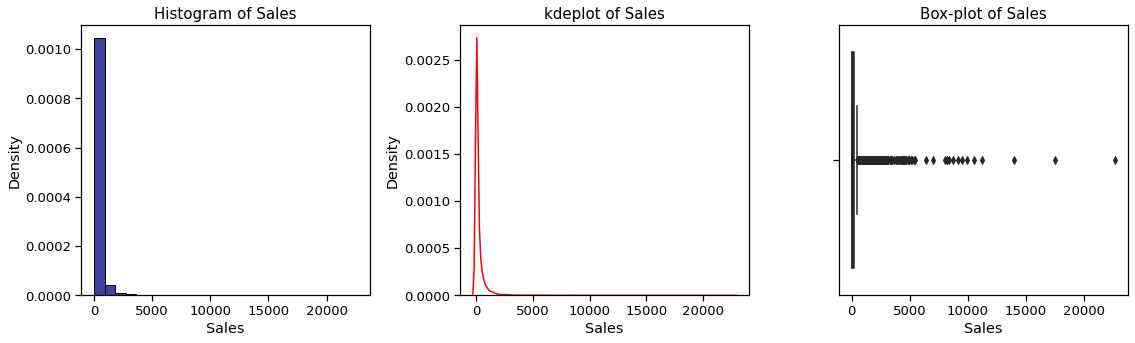

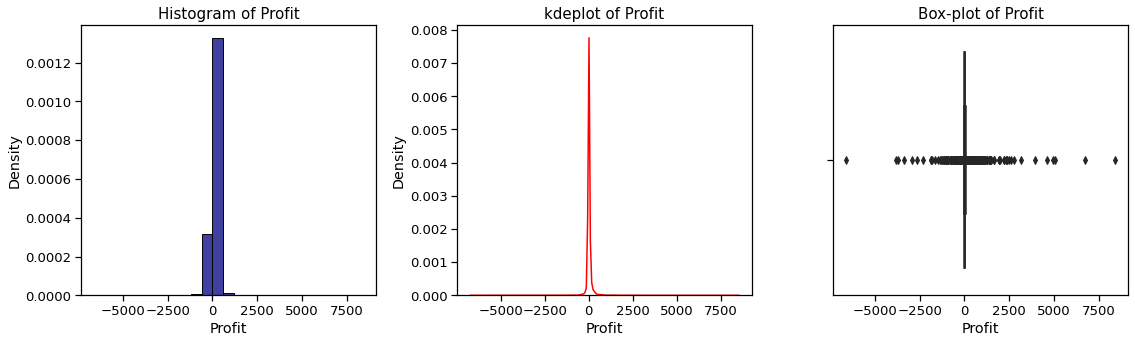

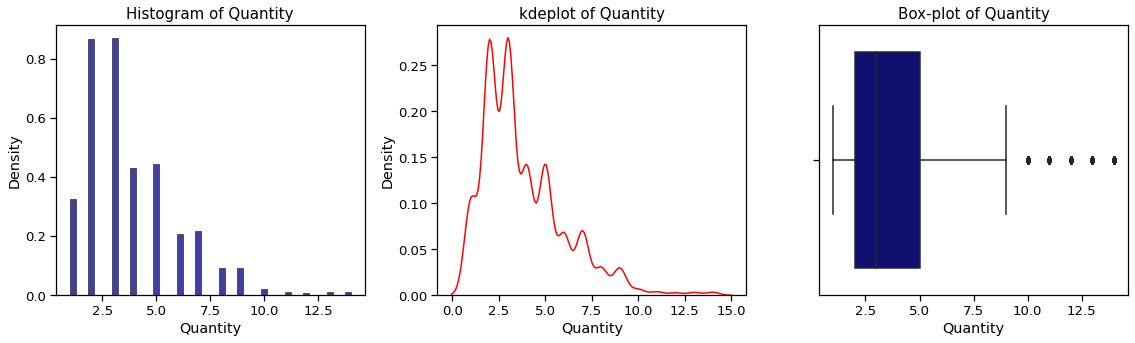

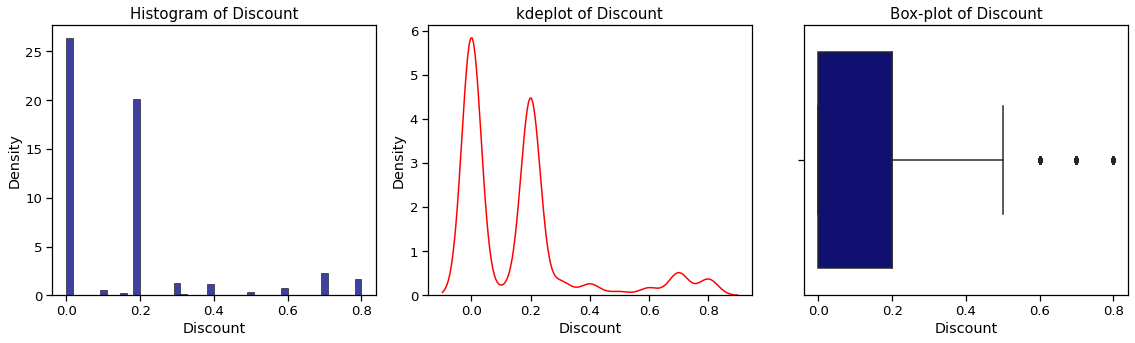

In [6]:
imp_numerical_cols=['Sales','Profit','Quantity','Discount']
for i,col in enumerate(imp_numerical_cols):
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:red'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data=df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data=df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

# <b id='dist-cat-cols'>Distribution of </b> <b style='color:red'> Categorical columns</b><hr>

<h2 style='color:red'><b> Count plot:<b></h2>
<h2>A countplot is kind of likea histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.
 </h2>

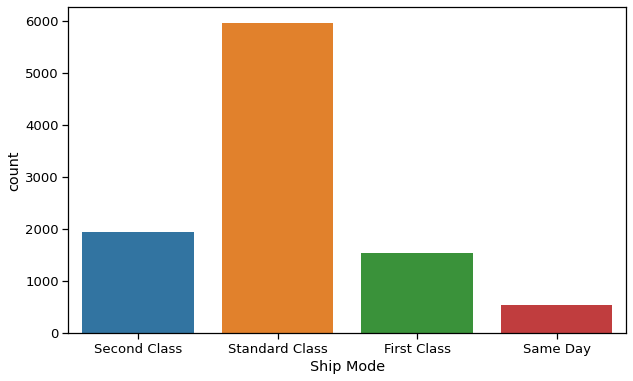

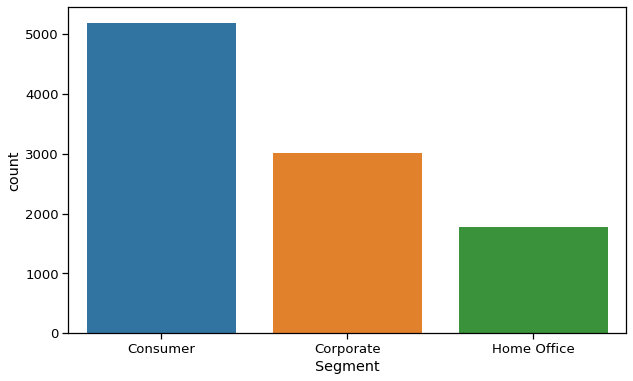

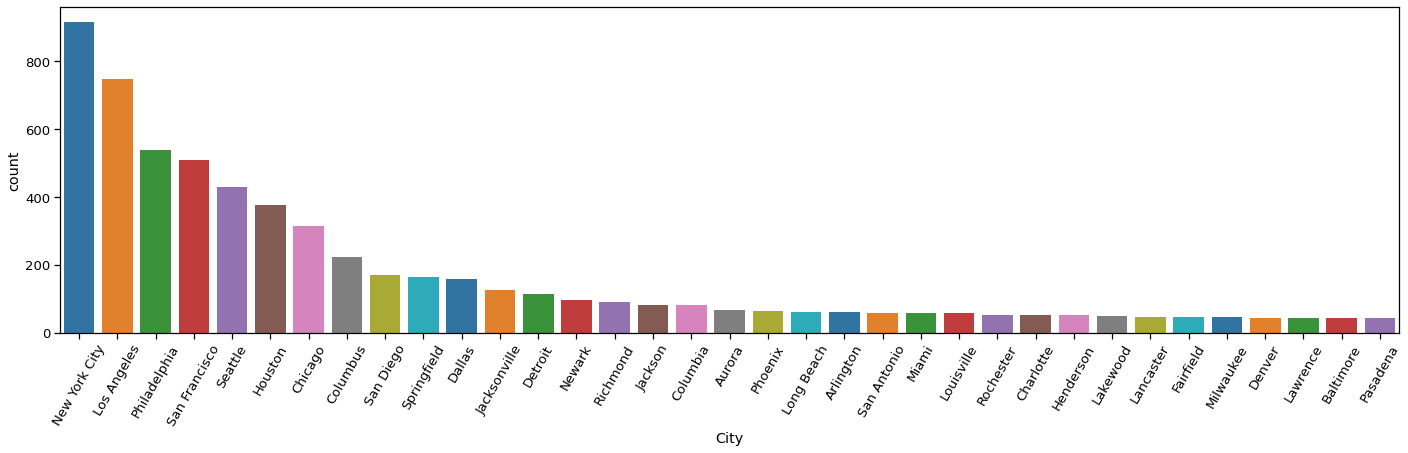

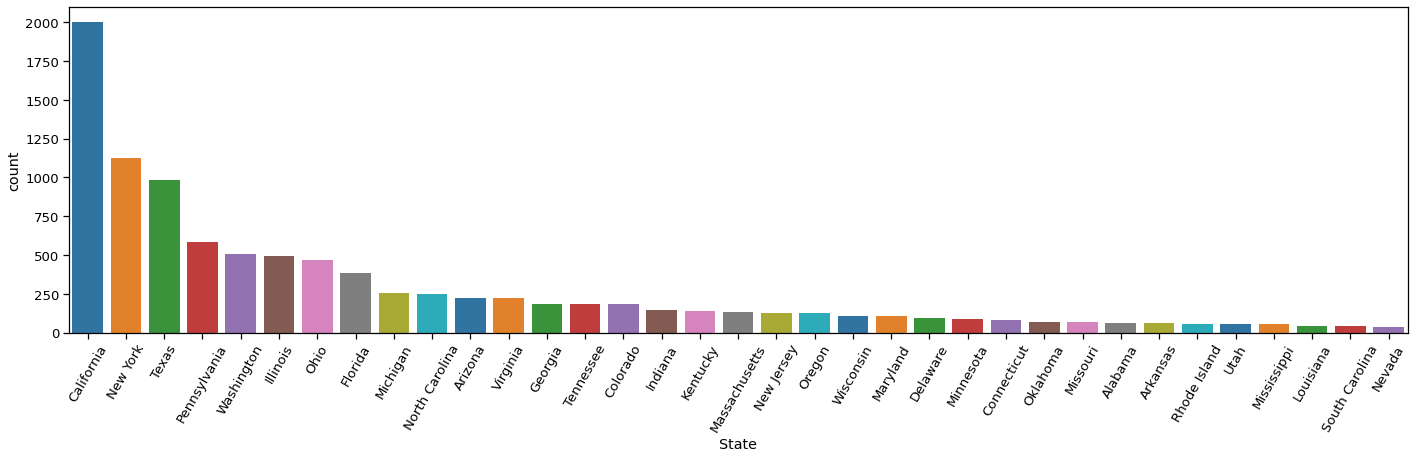

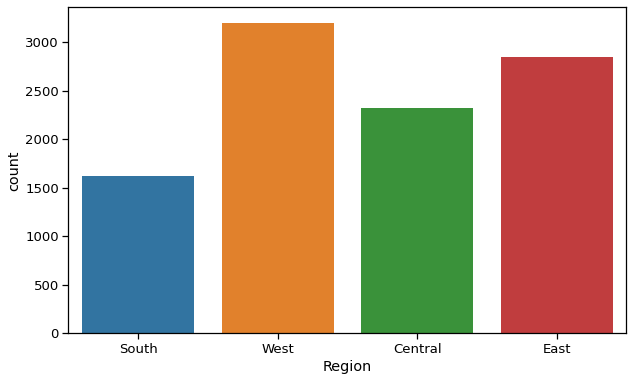

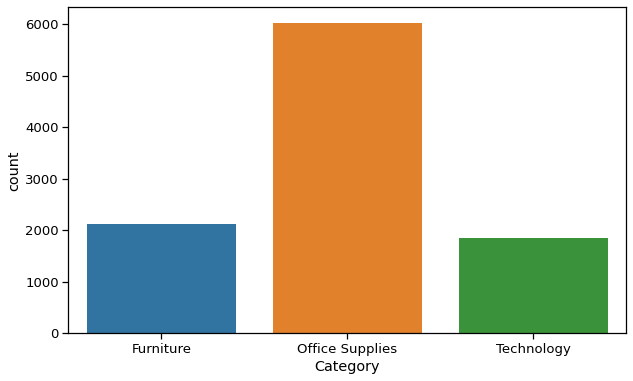

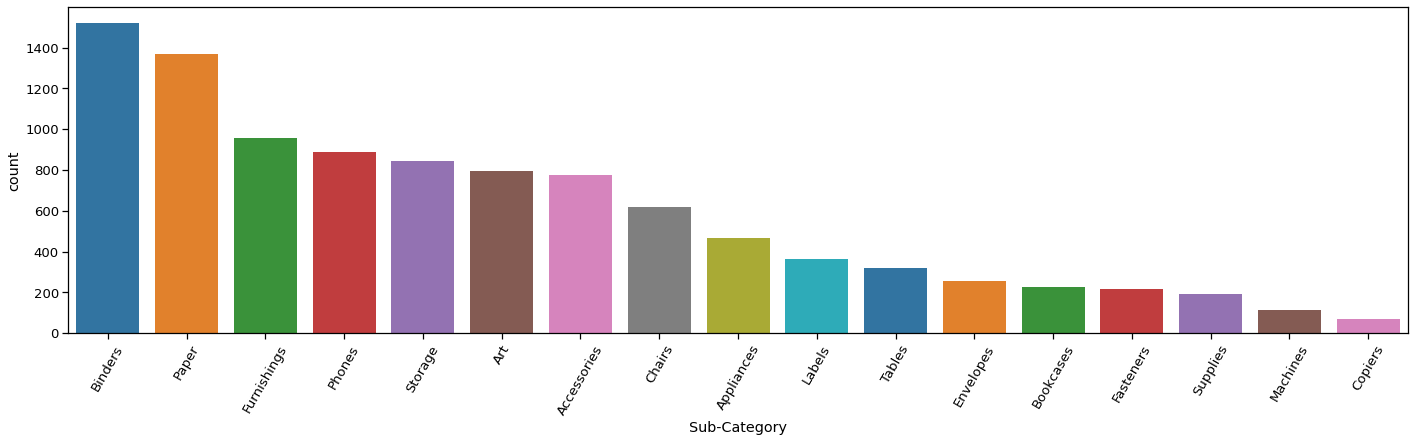

In [7]:
imp_categotical_features=['Ship Mode','Segment', 'City', 'State','Region', 'Category', 'Sub-Category']

for col in imp_categotical_features:
    width=10
    n=len(df[col].unique())
    if n > 15:
        width=24
        plt.figure(figsize=(width,6))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        text="<center><h3 ><b style='color:black'>" + f"Distribution of</b> <b style='color:red'> {col}"+ "</b></h3><hr></center>"
        display(HTML(text))
        sns.barplot(data=temp,x=temp.index,y=col,palette='tab10')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,6))
        sns.countplot(data=df,x=col,palette='tab10')
        text="<h3 ><b style='color:black'>" + f"Distribution of</b> <b style='color:red'> {col}"+ "</b></h3><hr>"
        display(HTML(text))
    plt.show()
           

In [8]:
geographic_feature_cols=['Region','City','State']
product_based_feature_cols=['Category', 'Sub-Category']
service_based_col=['Ship Mode']
customer_segment_col=['Segment']

# <b id='sales-geo'>Sales with respect to</b> <b style='color:red'> Geographical features</b><hr>

<h2 style='color:red'><b> bar plot:<b></h2>
<h2>A bar plot is a plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.
 </h2>


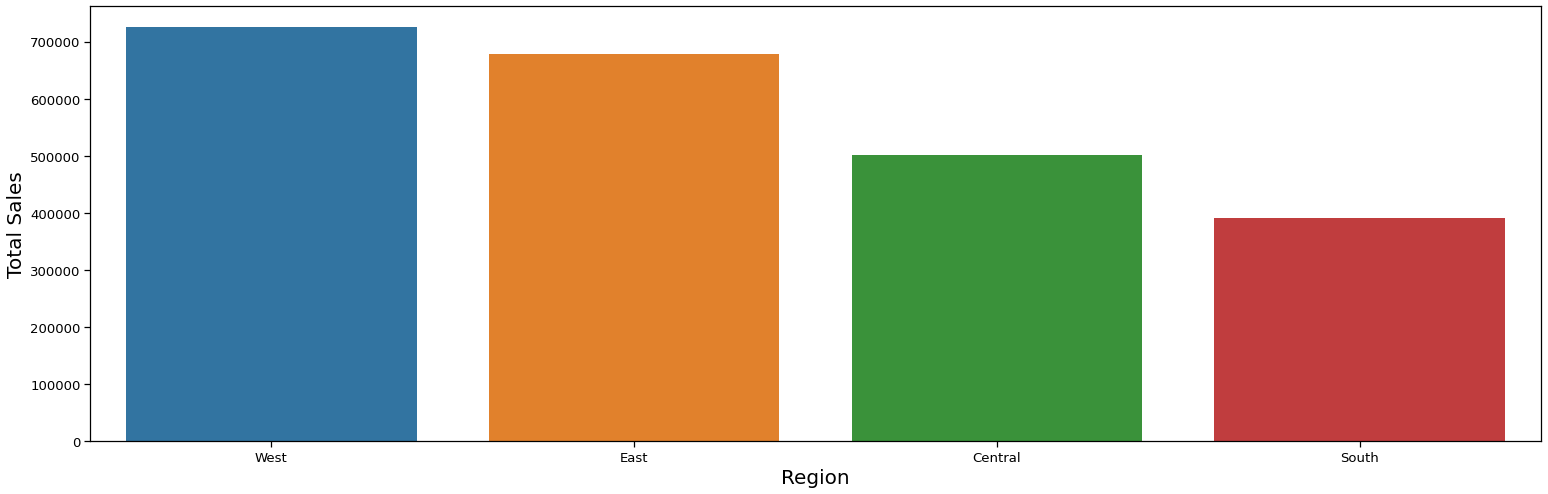

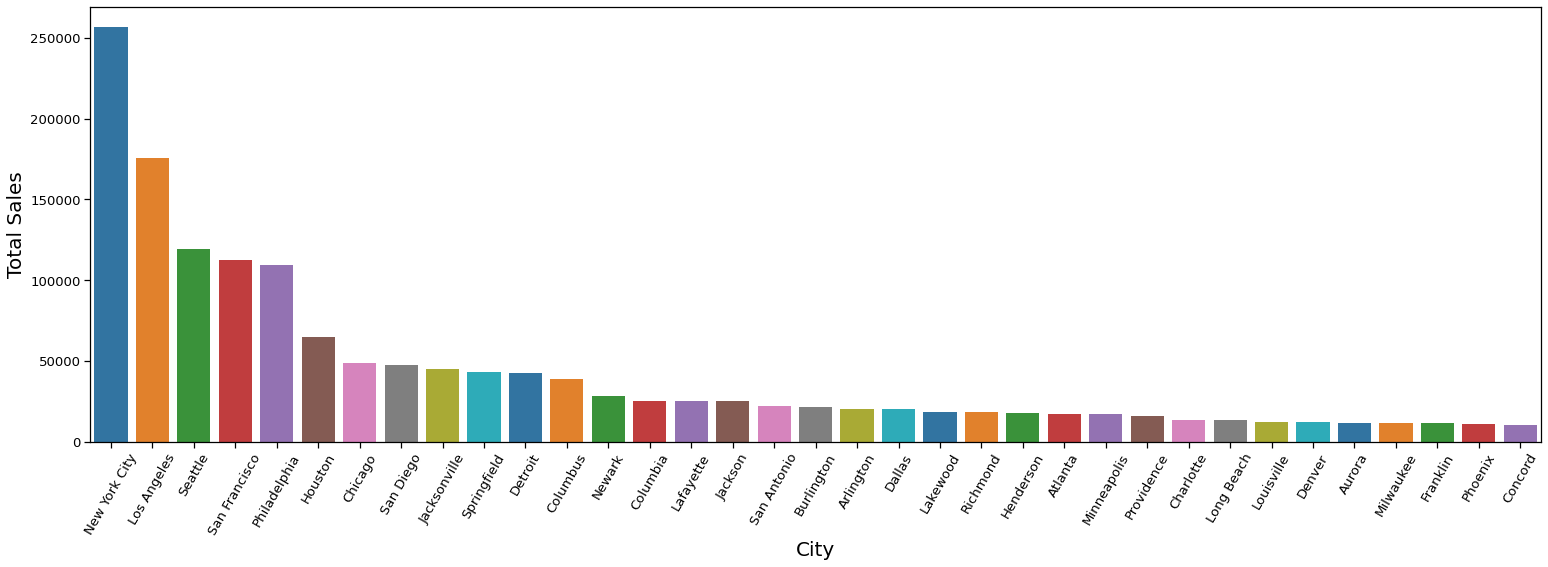

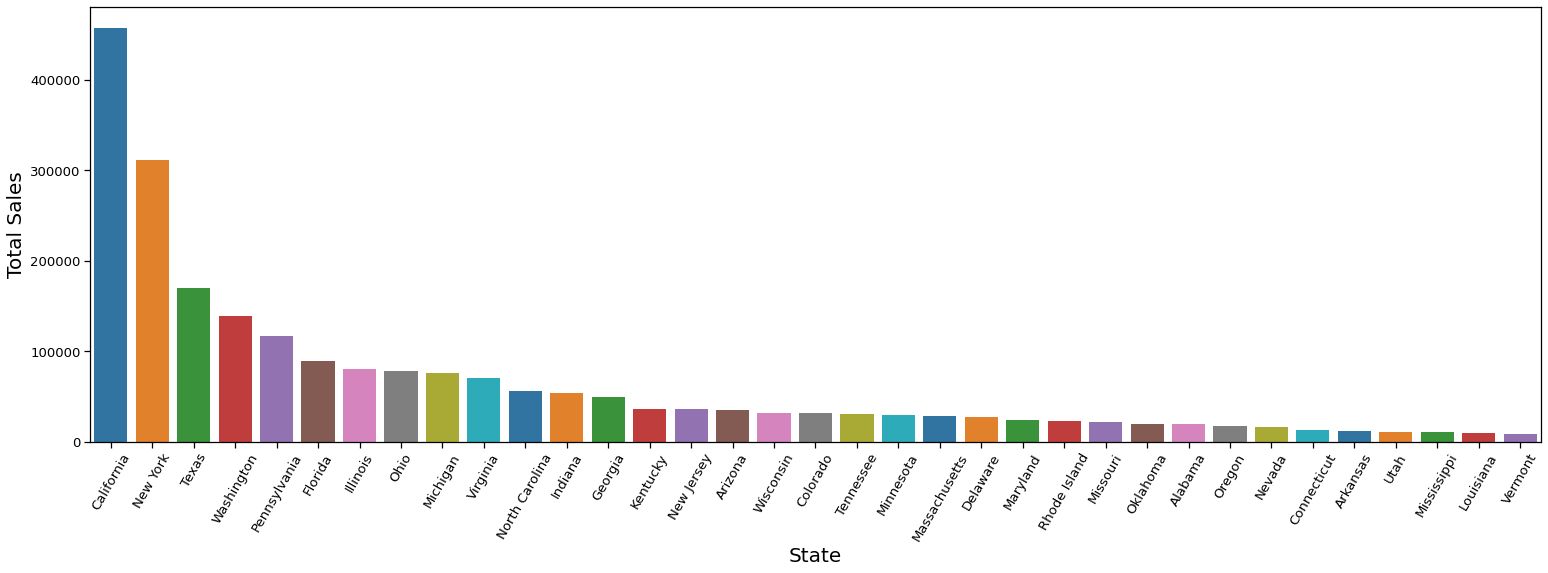

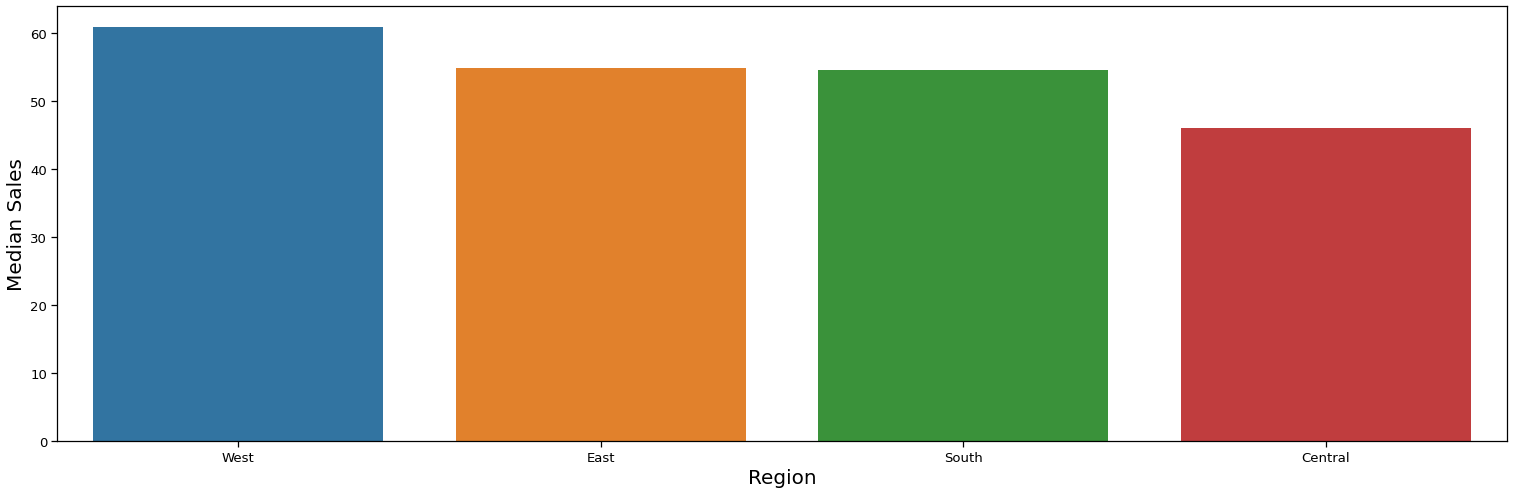

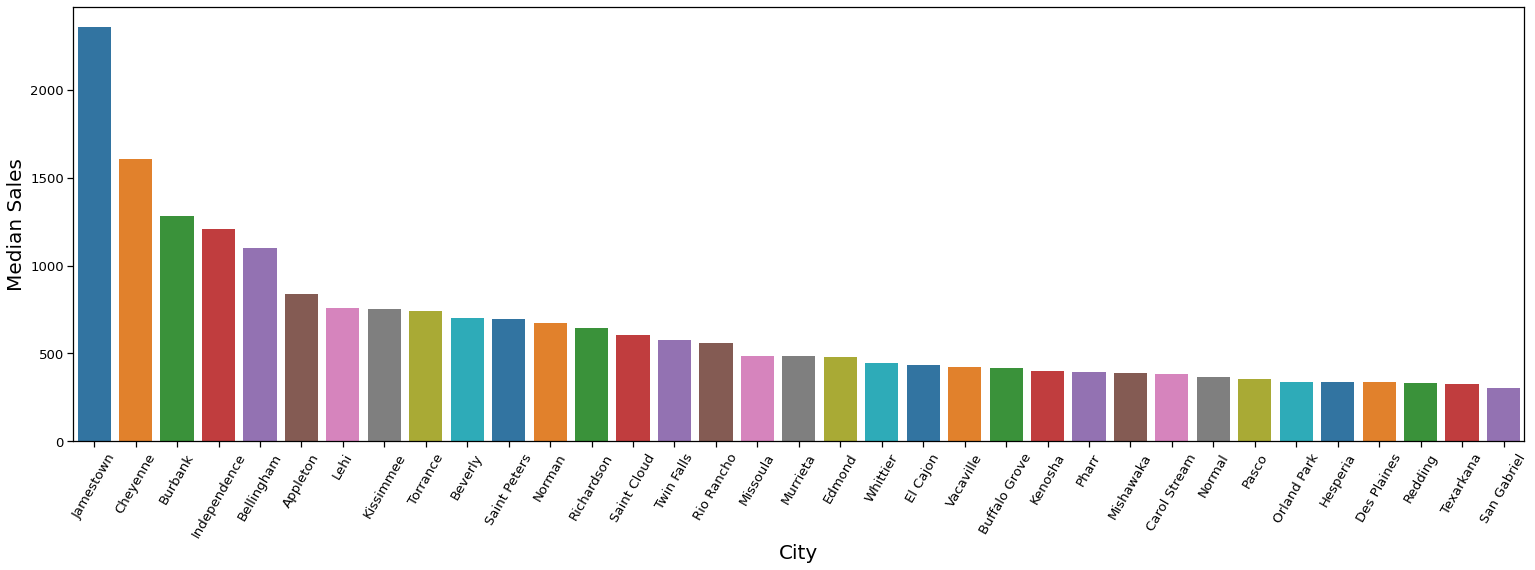

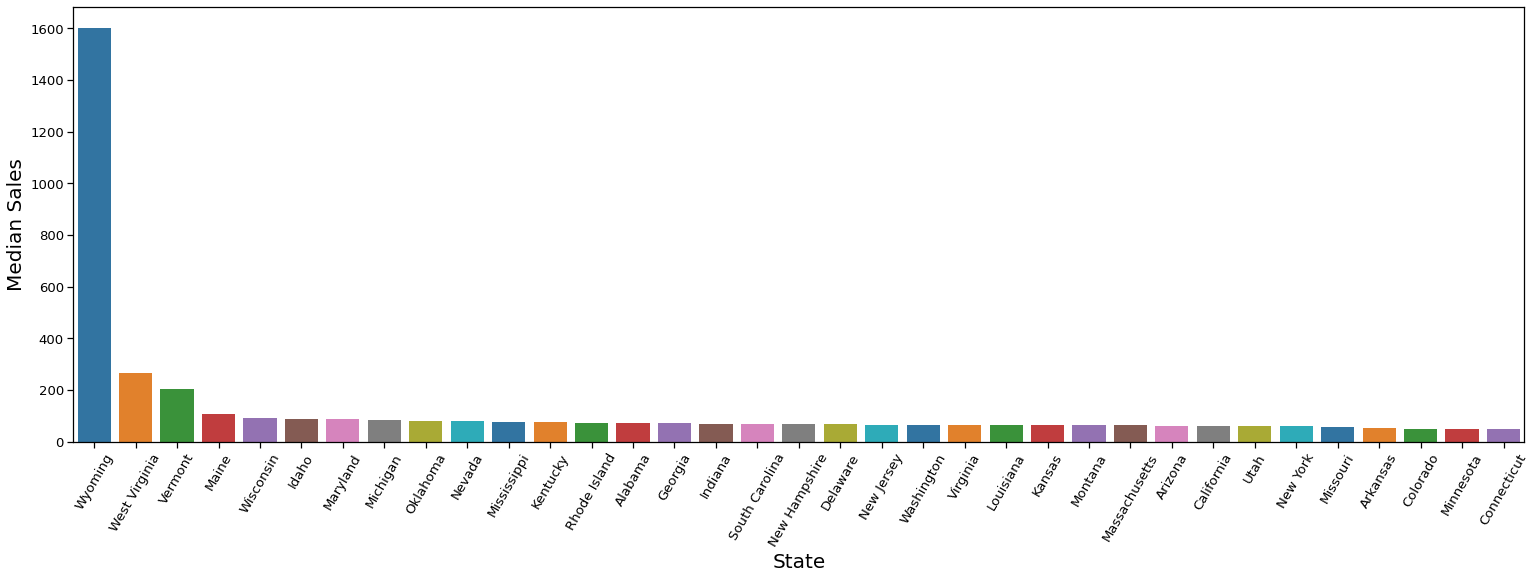

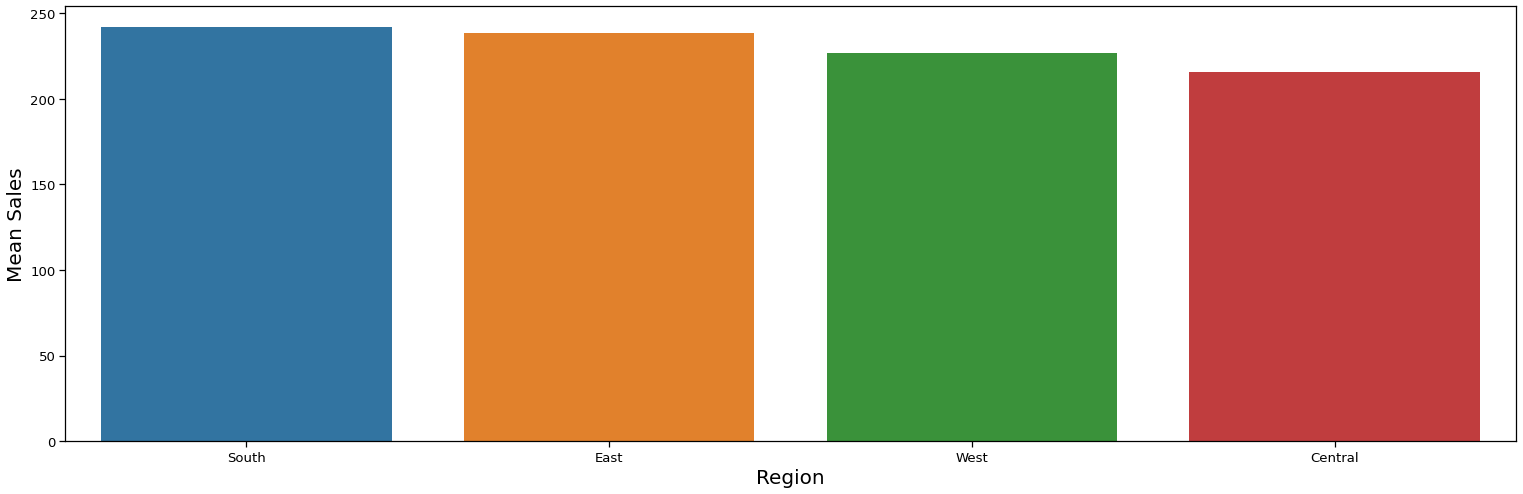

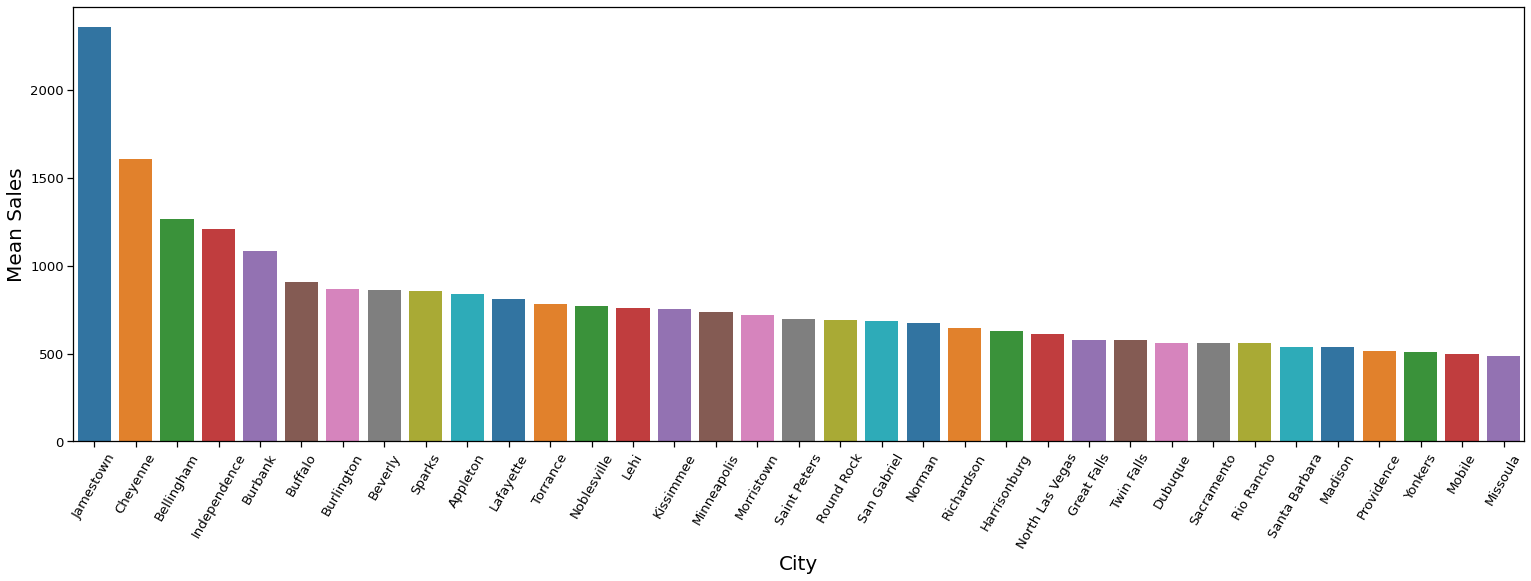

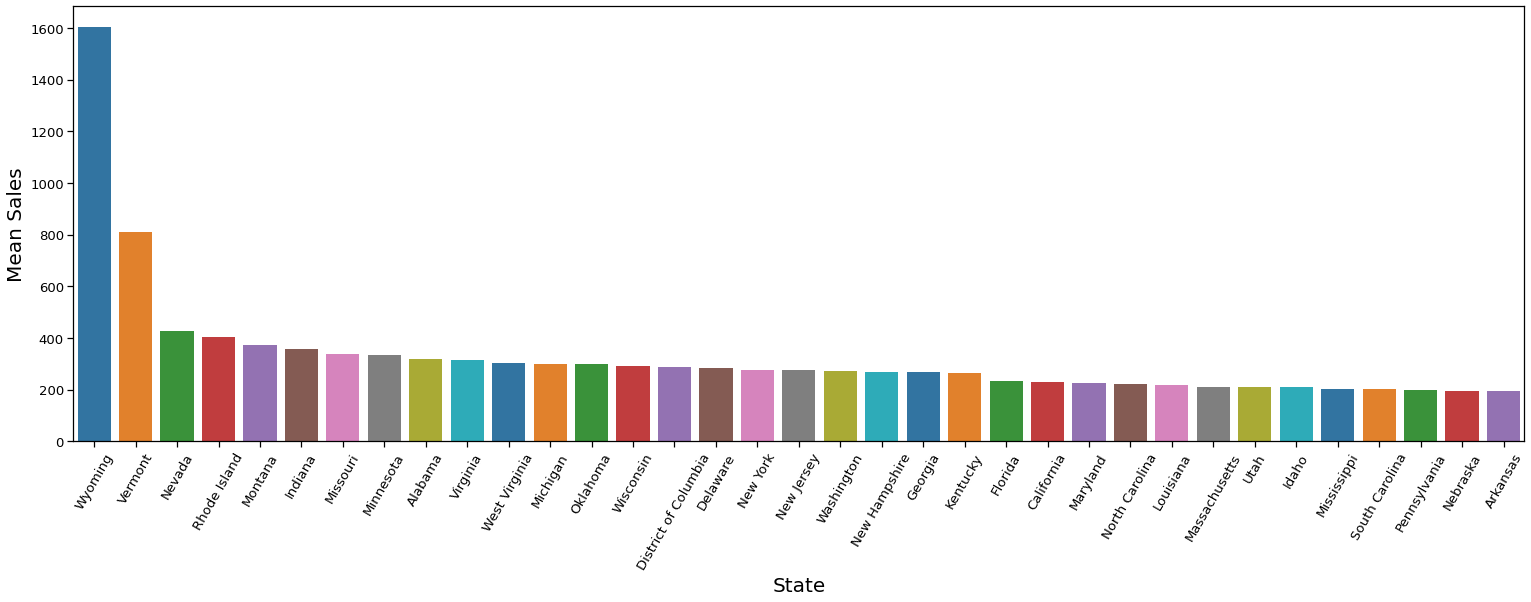

In [9]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Sales"+"</b></h2><hr>"
    display(HTML(text))    
    for col in geographic_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Sales'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Sales'].median().reset_index()
        else:
            temp=df.groupby(col)['Sales'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Sales']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Sales with respect to </b> <b style='color:red'>{col} (Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Sales with respect to </b> <b style='color:red'>{col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Sales',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Sales',size=20)
        plt.xlabel(col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='sales-pro'>Sales with respect to</b> <b style='color:red'> to Product based Features</b><hr>

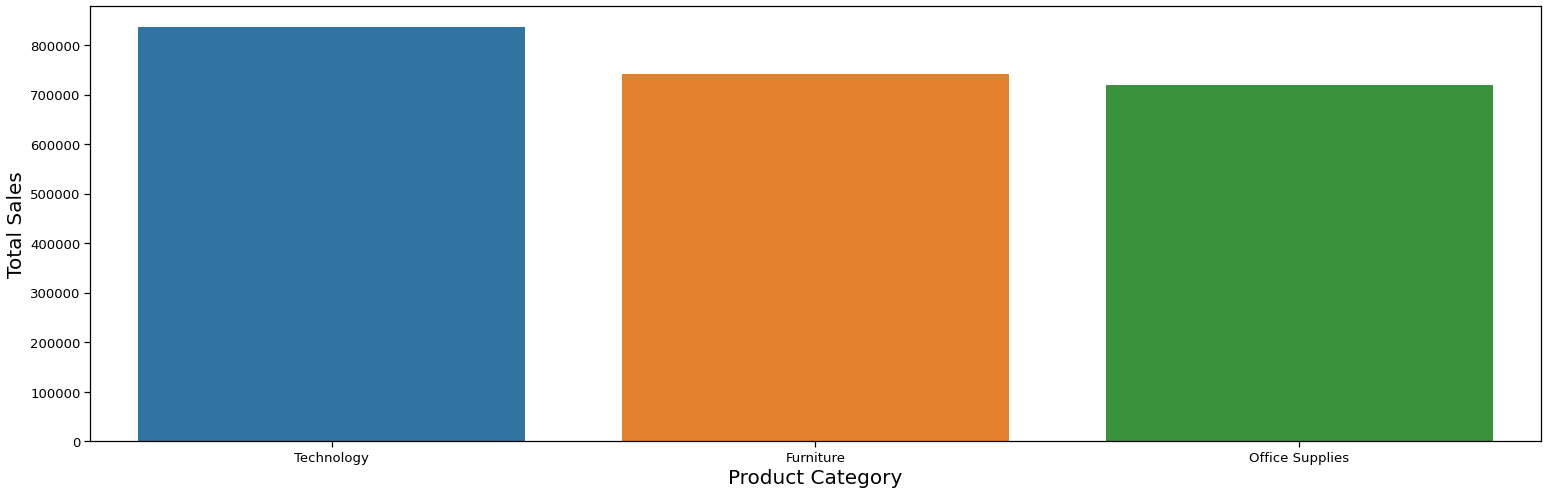

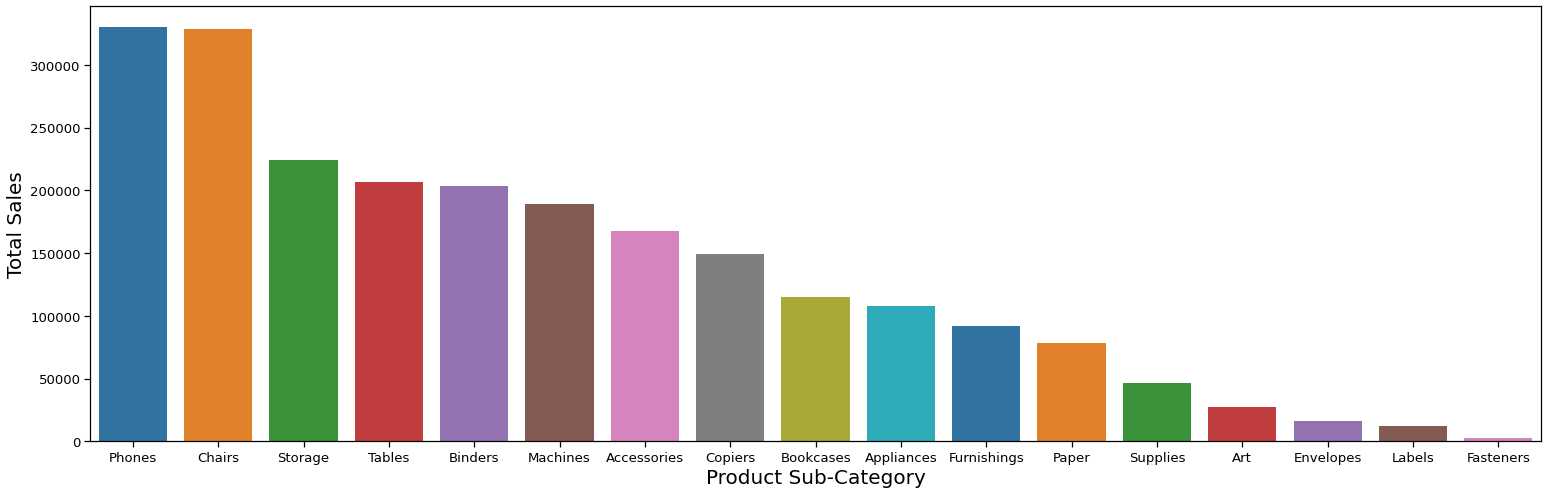

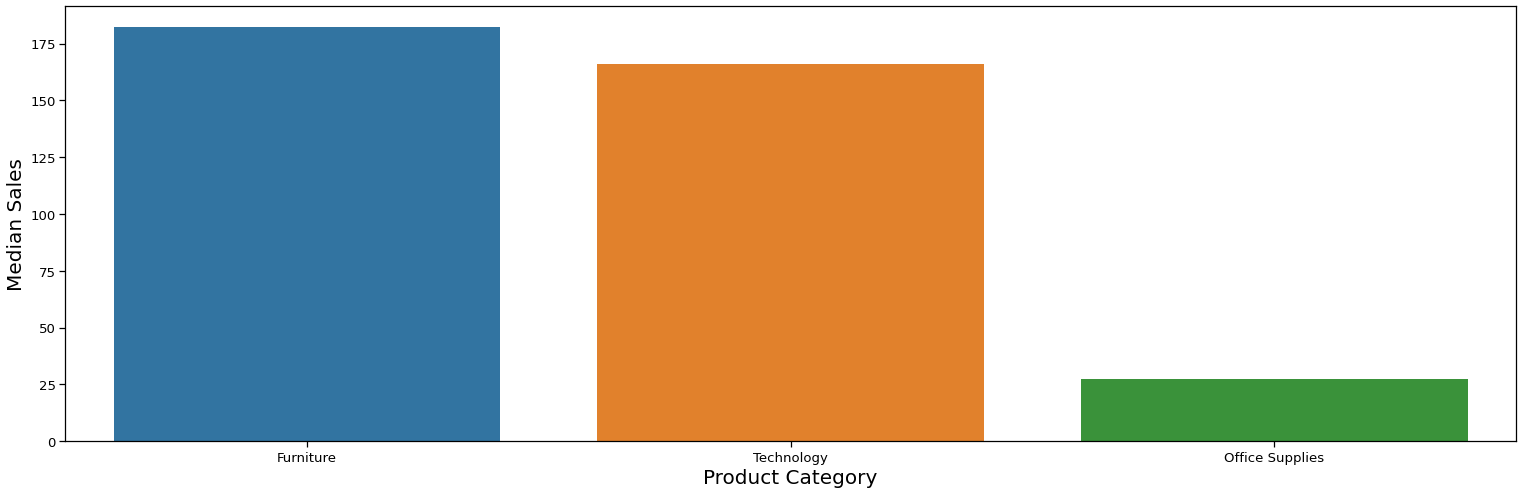

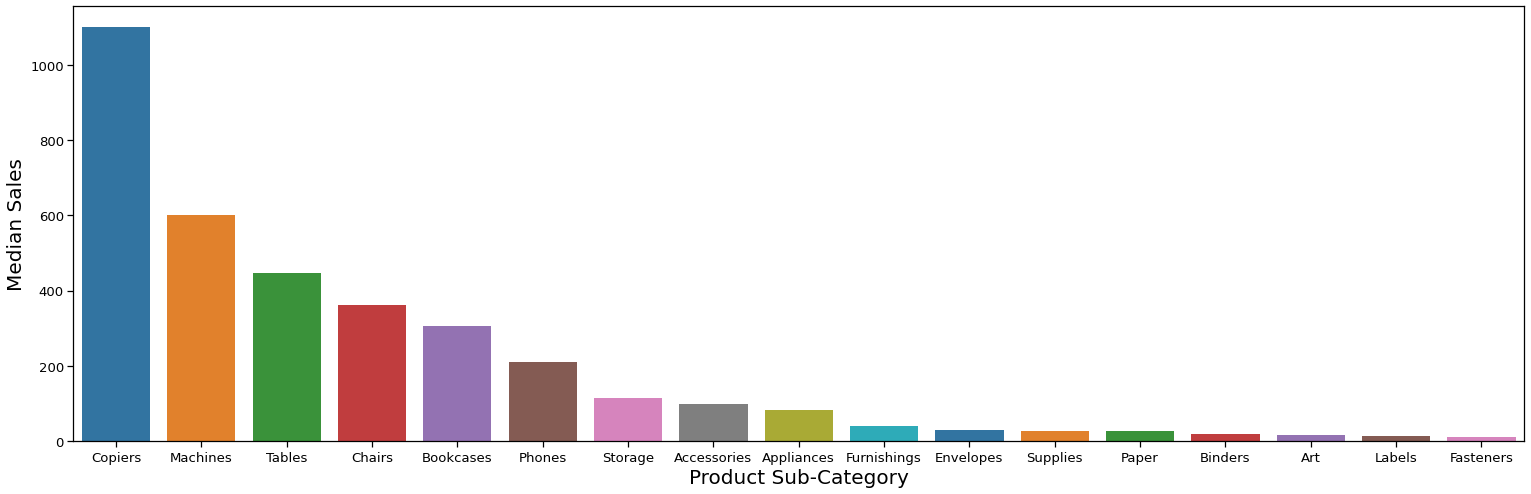

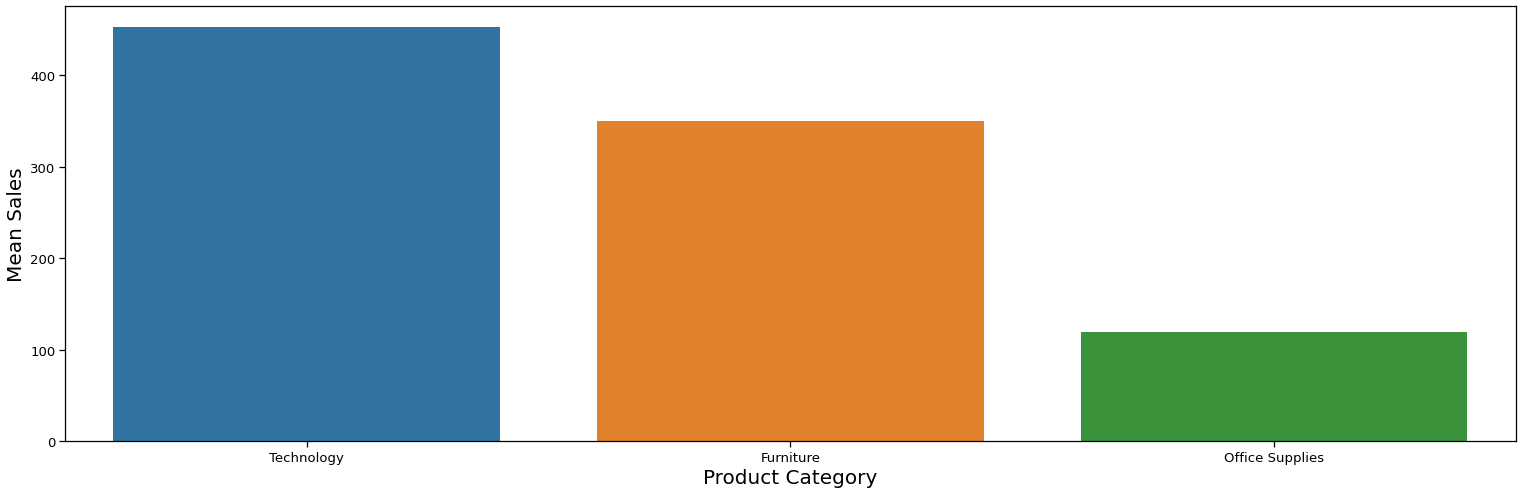

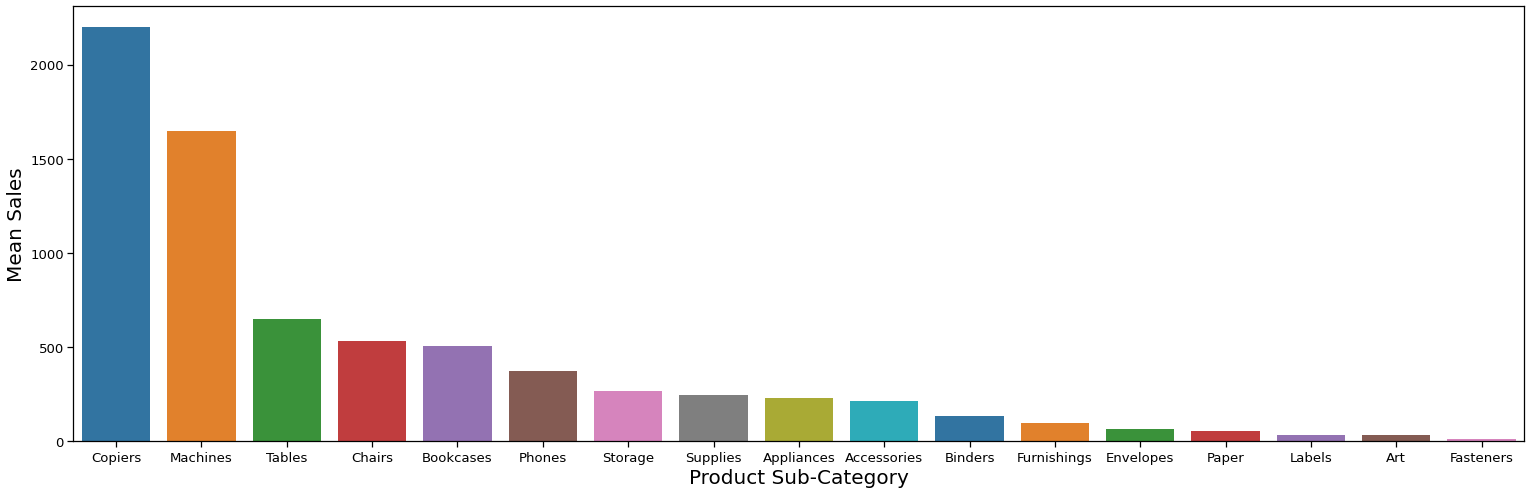

In [10]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Sales"+"</b></h2><hr>"
    display(HTML(text))    
    for col in product_based_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Sales'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Sales'].median().reset_index()
        else:
            temp=df.groupby(col)['Sales'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Sales']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Sales with respect to Product</b> <b style='color:red'>{col}(Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Sales with respect to Product</b> <b style='color:red'>{col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Sales',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Sales',size=20)
        plt.xlabel('Product '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='sales-service'>Sales with respect to</b> <b style='color:red'> Service : Shipment Mode</b><hr>

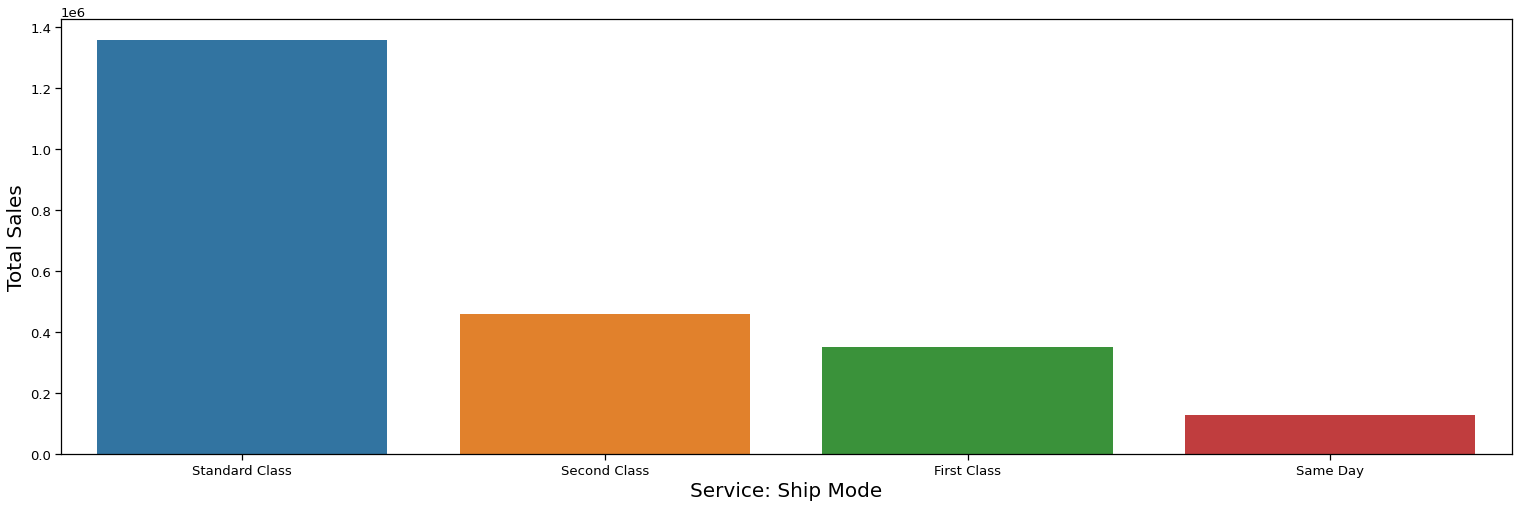

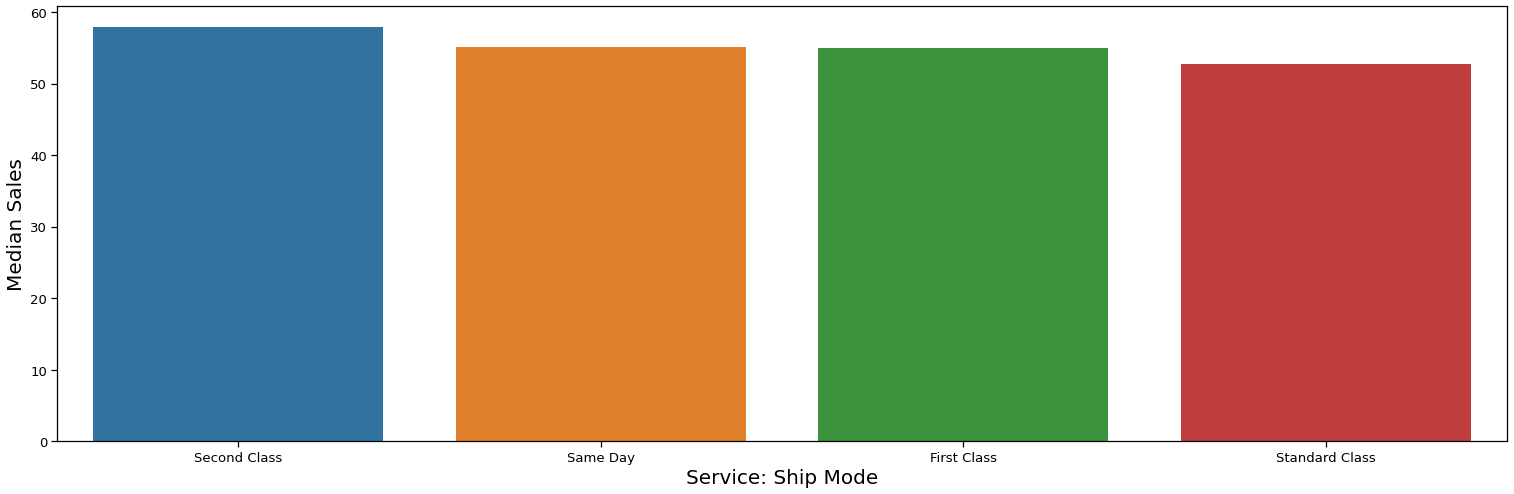

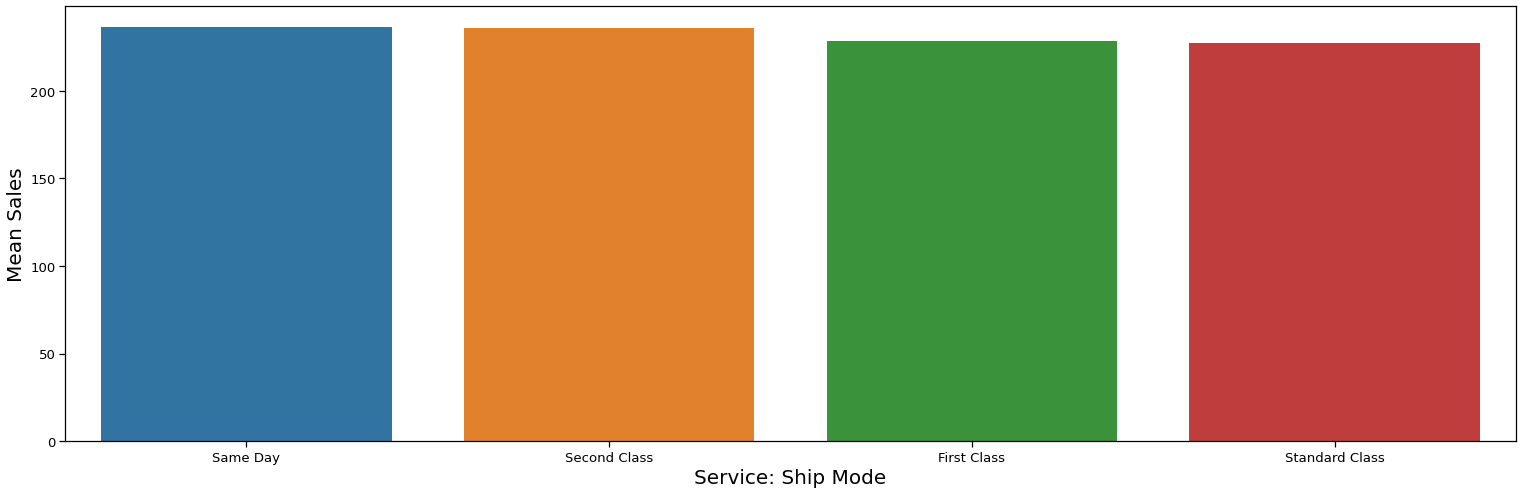

In [11]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Sales"+"</b></h2><hr>"
    display(HTML(text))    
    for col in service_based_col:
        if criterion == 'Total':
            temp=df.groupby(col)['Sales'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Sales'].median().reset_index()
        else:
            temp=df.groupby(col)['Sales'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Sales']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)[:35]
            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Sales',palette='tab10');
        text="<center><h3><b>" + f"{criterion} Sales with respect to </b> <b style='color:red'> Service: {col}"+ "</b></h3></center>"
        display(HTML(text))

        plt.ylabel(f'{criterion} Sales',size=20)
        plt.xlabel('Service: '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='sales-segment'>Sales with respect to</b> <b style='color:red'> Customer Segment</b><hr>

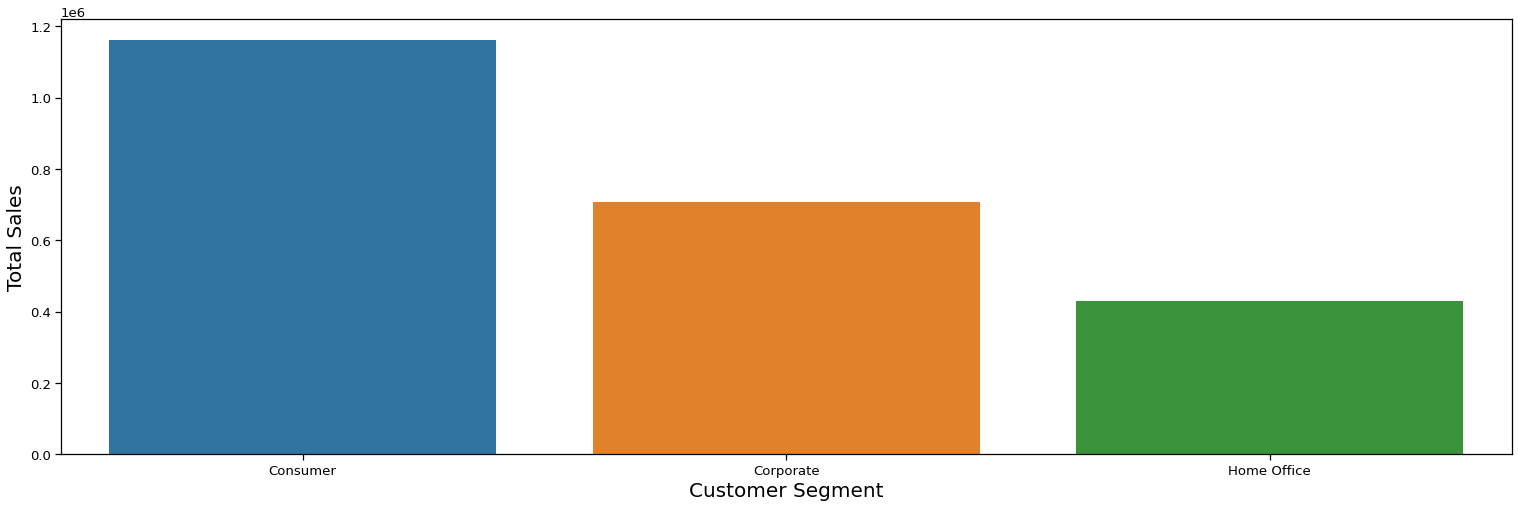

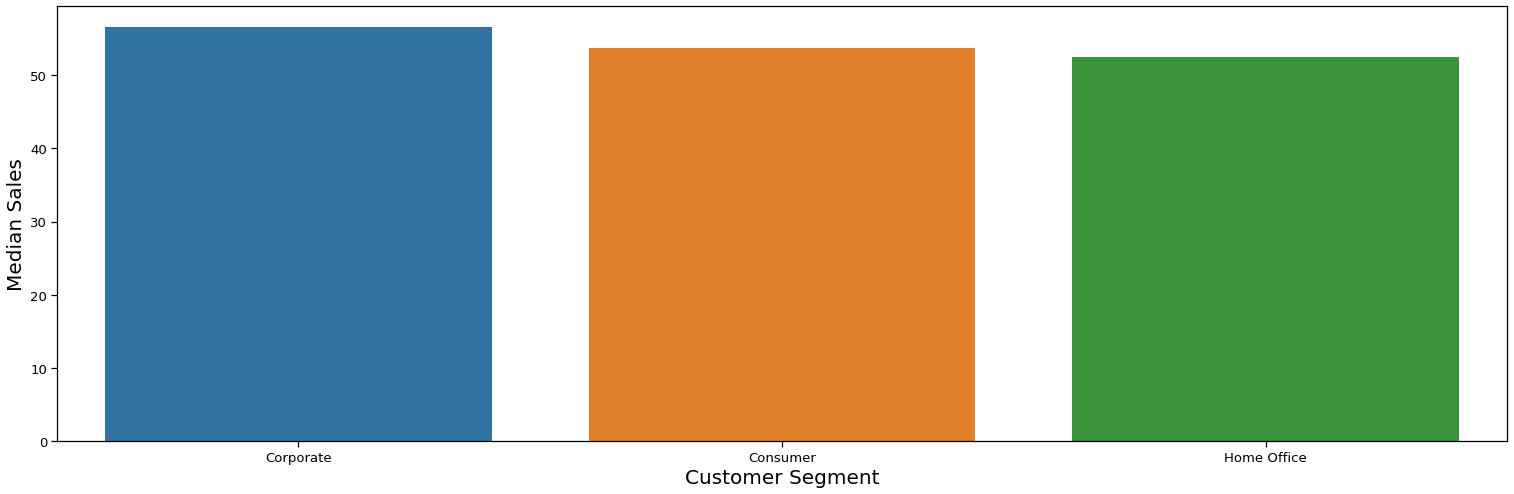

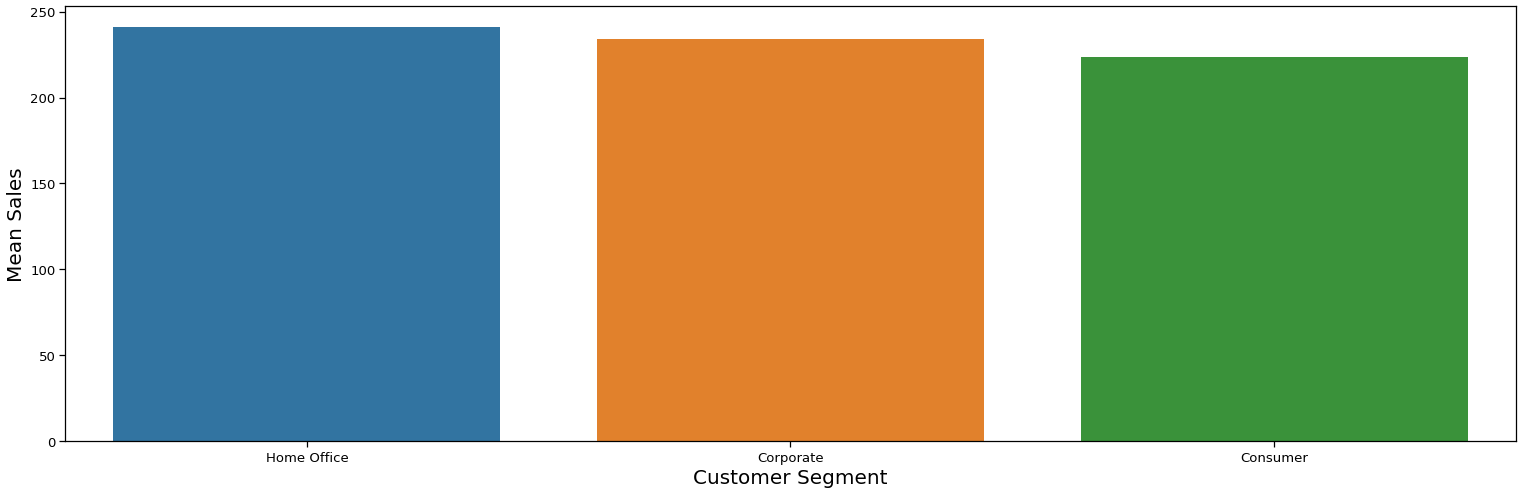

In [12]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Sales"+"</b></h2><hr>"
    display(HTML(text))    
    for col in customer_segment_col:
        if criterion == 'Total':
            temp=df.groupby(col)['Sales'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Sales'].median().reset_index()
        else:
            temp=df.groupby(col)['Sales'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Sales']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)[:35]
            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Sales',palette='tab10');
        text="<center><h3 ><b>" + f"{criterion} Sales with respect to </b> <b style='color:red'>Customer {col}"+ "</b></h3></center>"
        display(HTML(text))

        plt.ylabel(f'{criterion} Sales',size=20)
        plt.xlabel('Customer '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='profit-geo'>Profit with respect to</b> <b style='color:red'> Geographical features</b><hr>



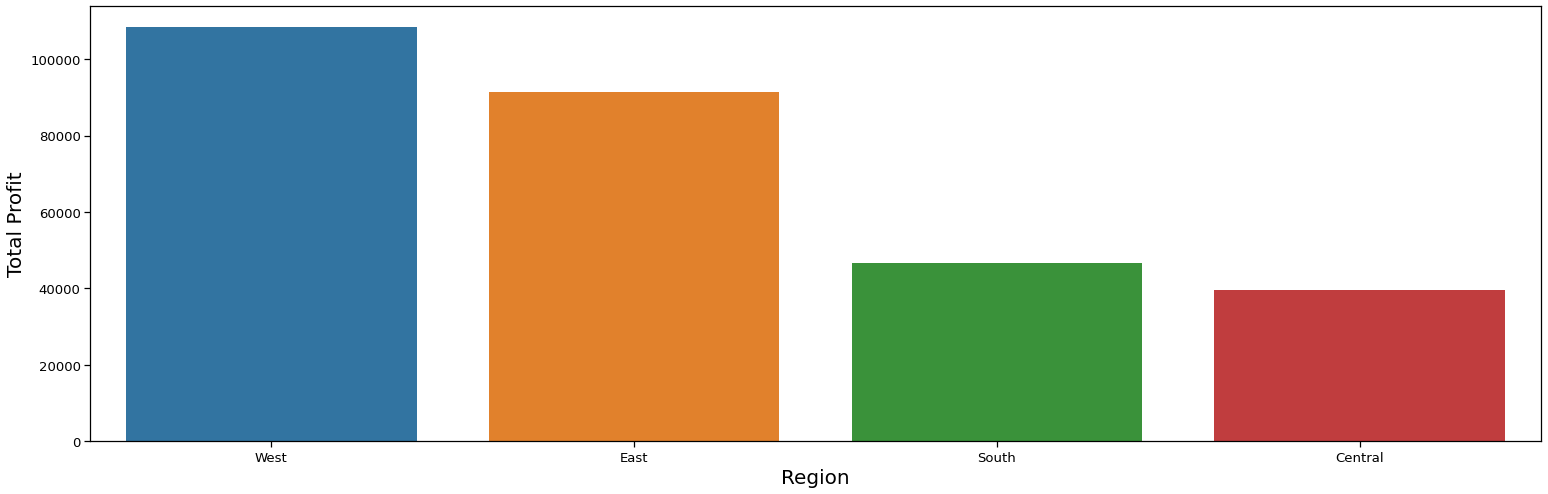

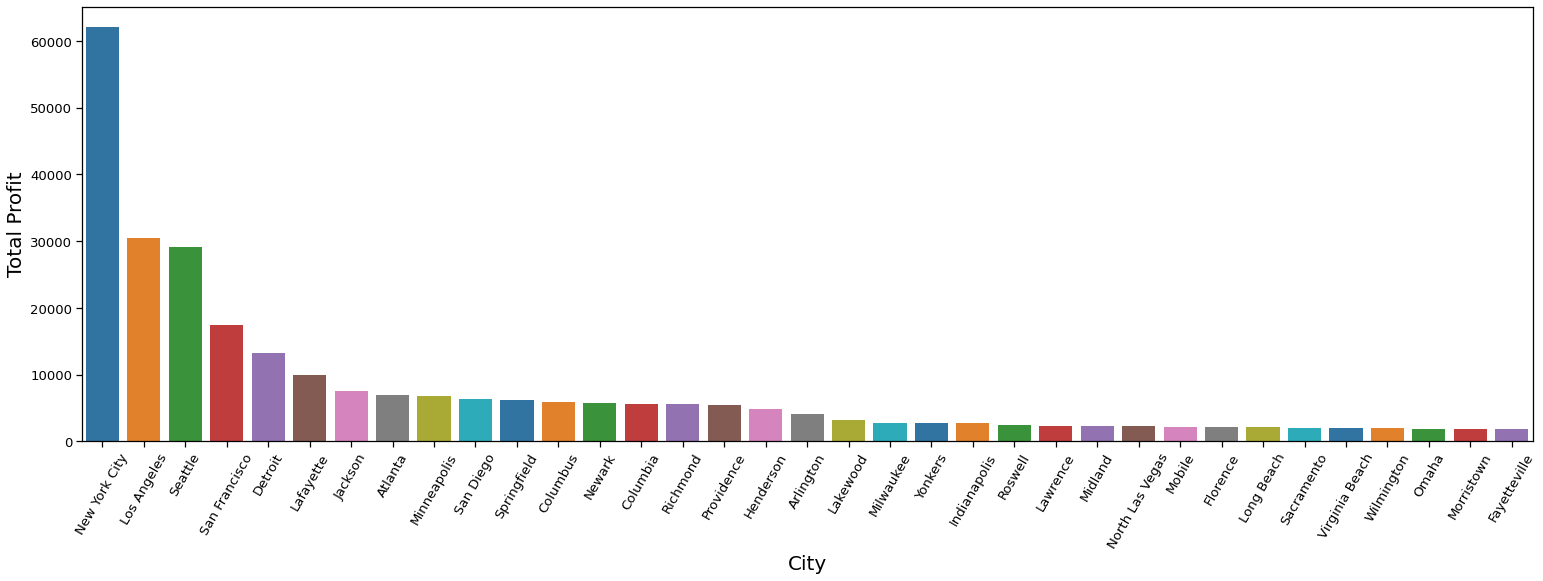

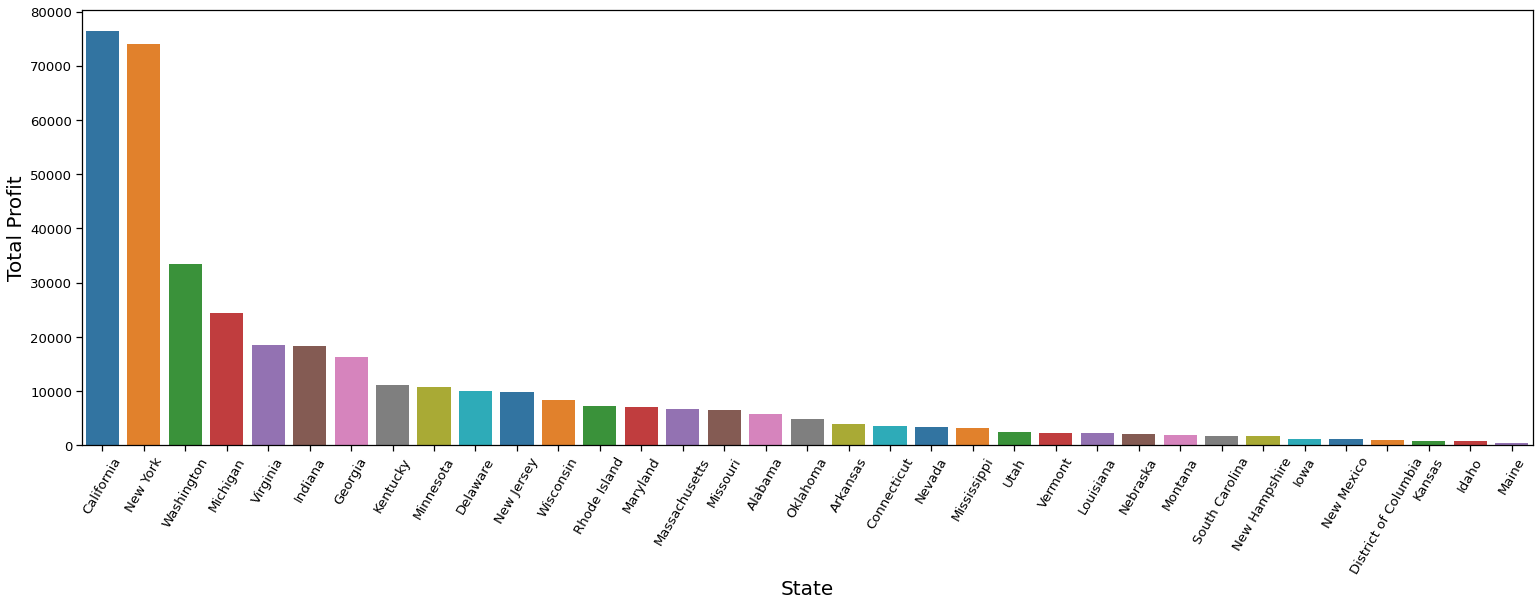

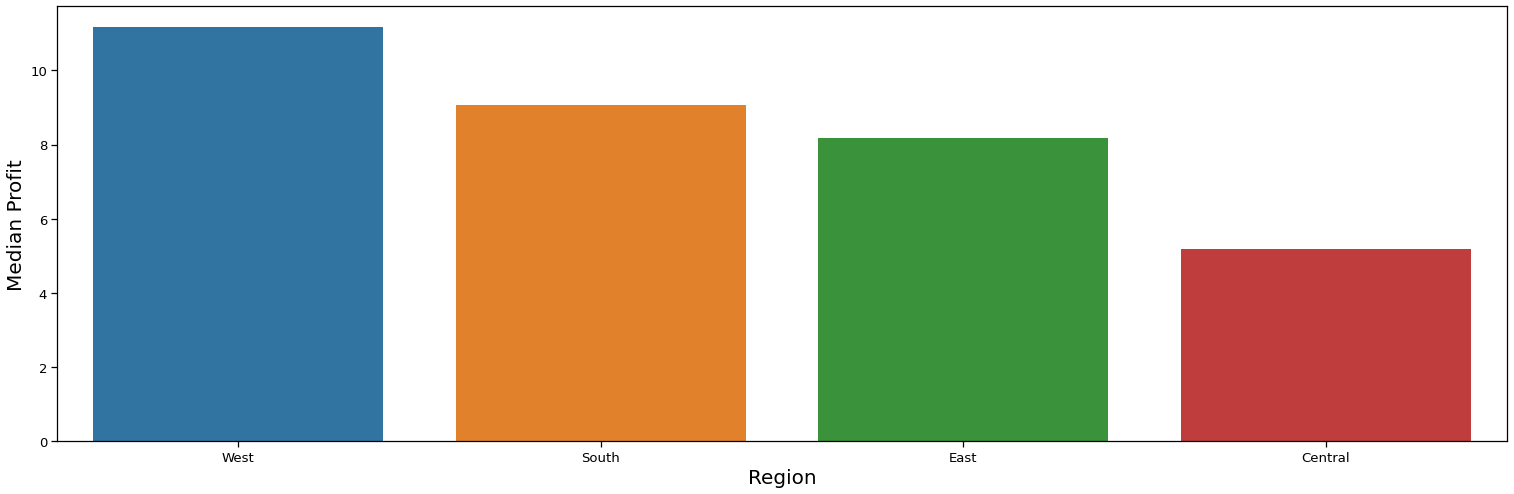

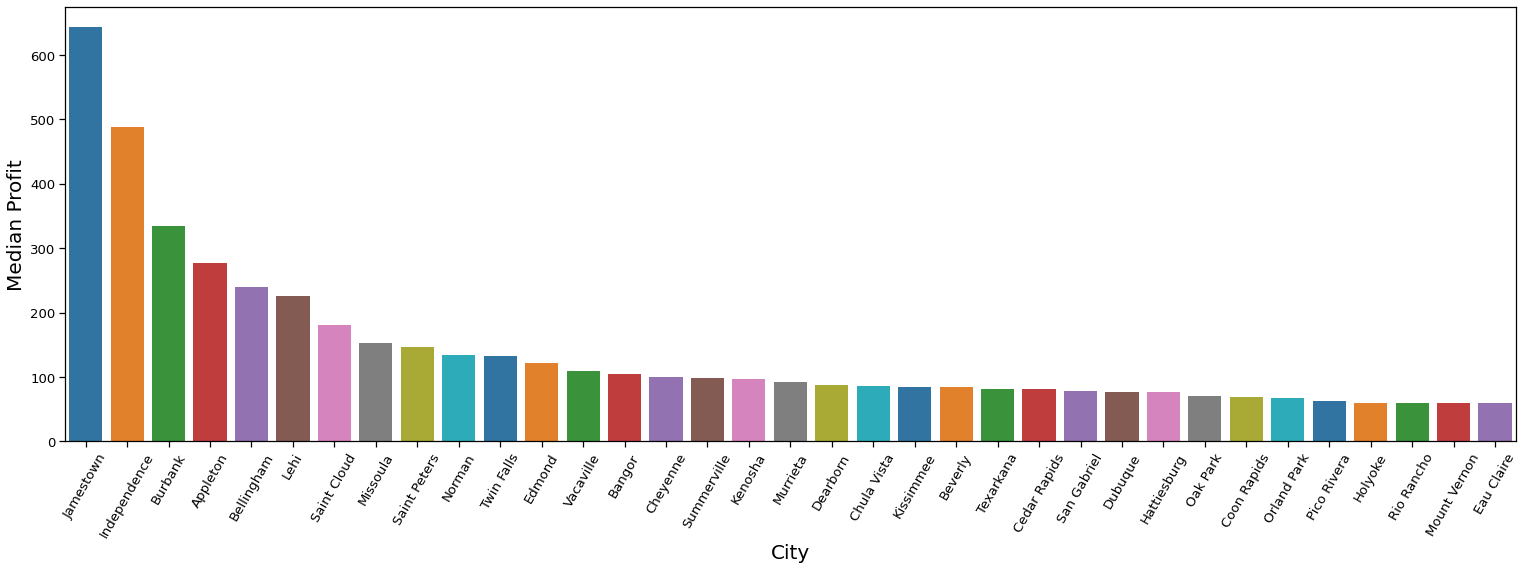

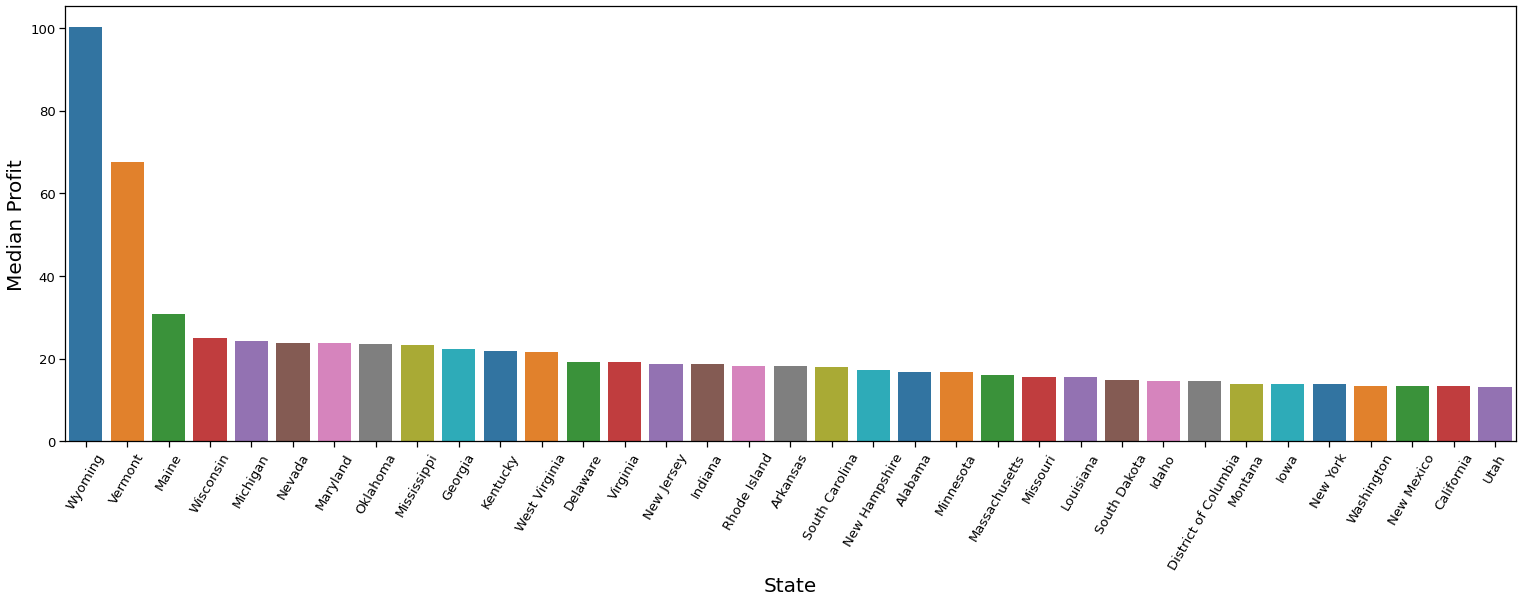

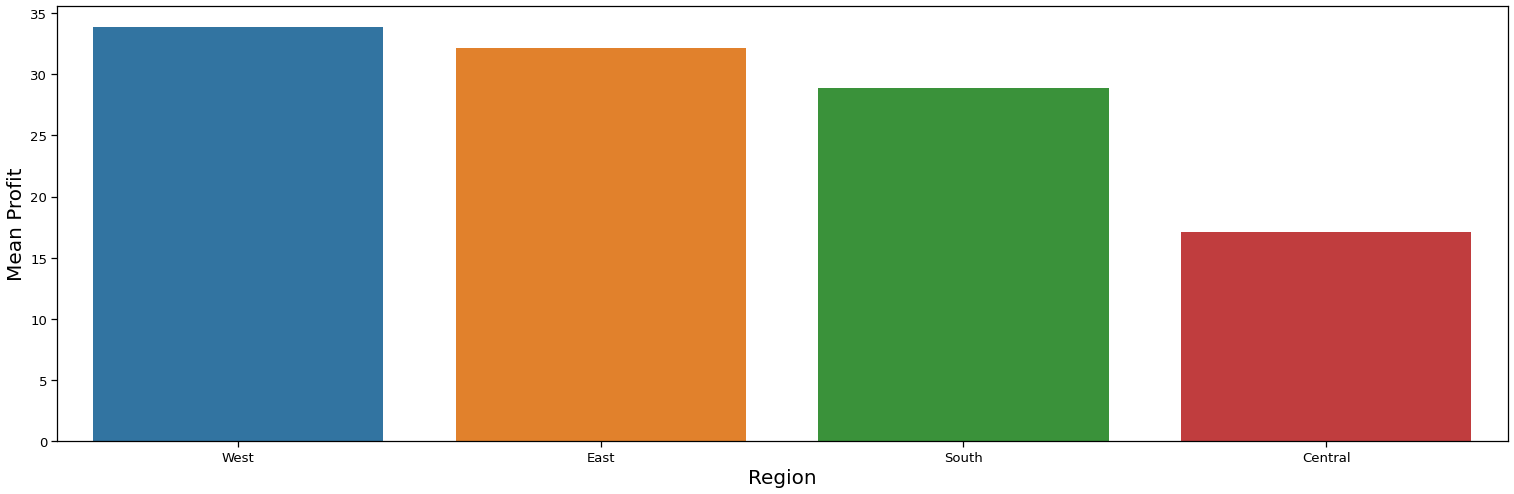

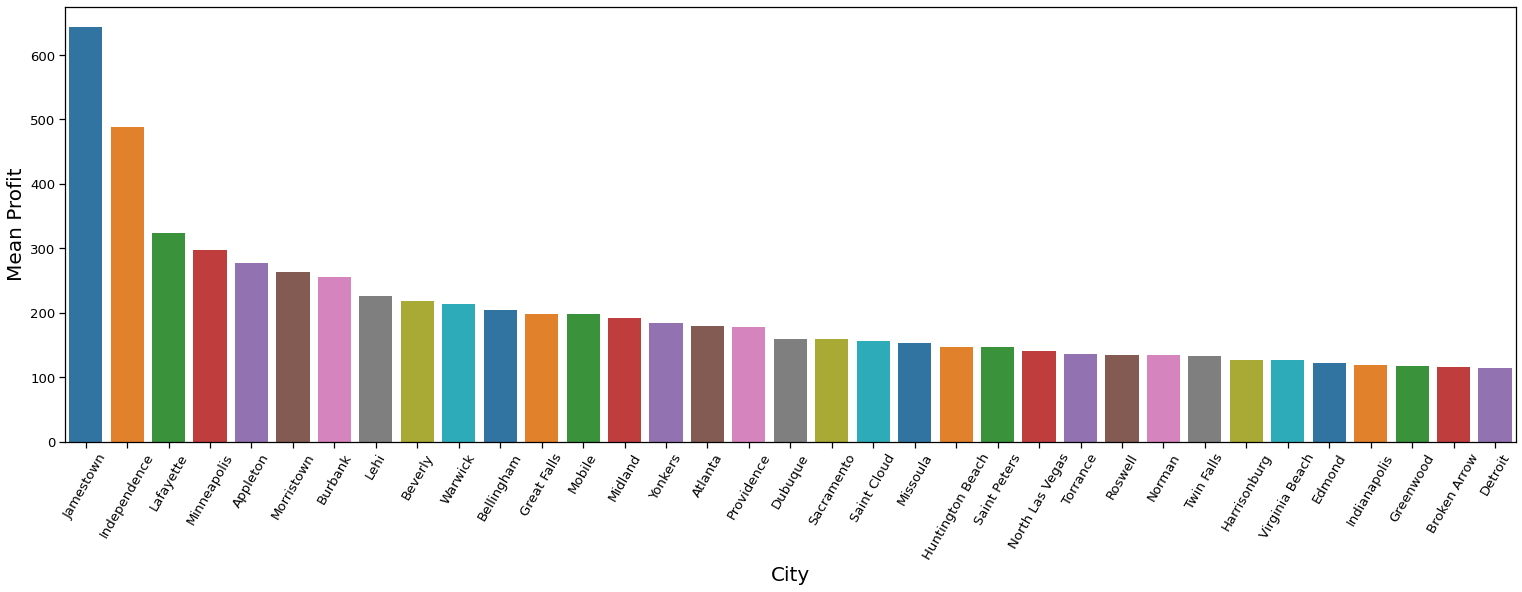

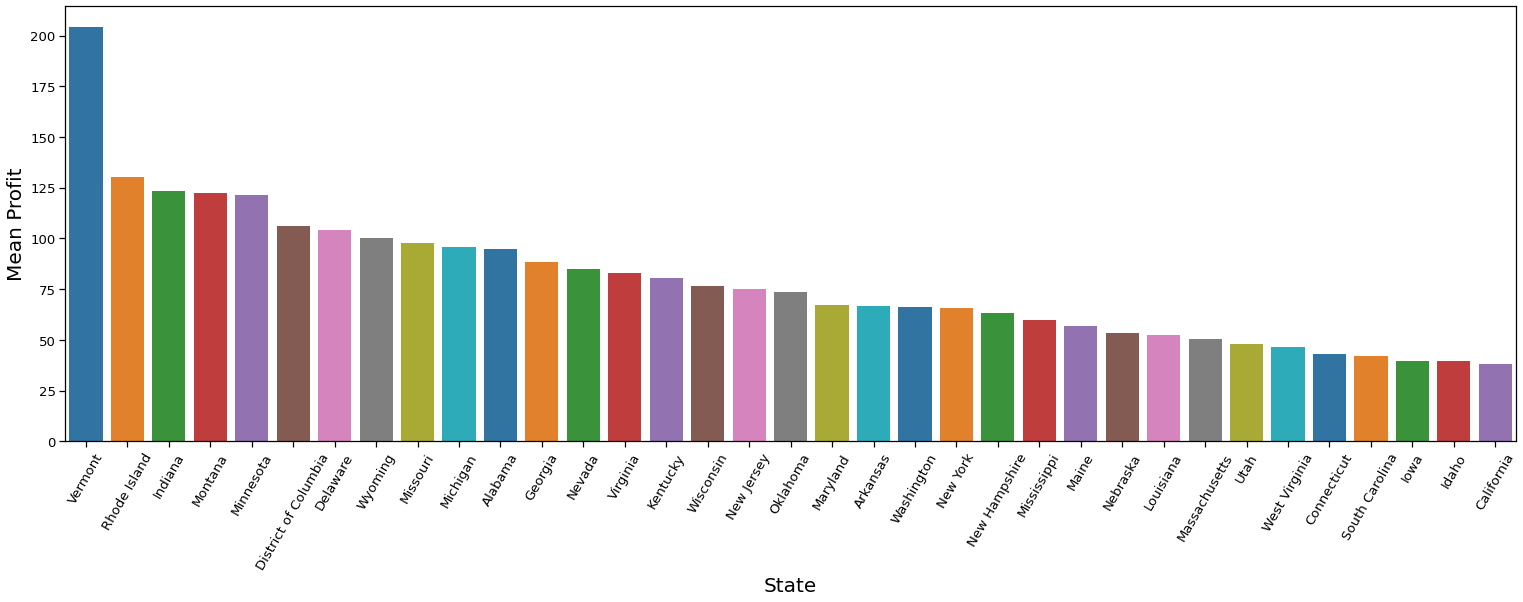

In [13]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Profit"+"</b></h2><hr>"
    display(HTML(text))    
    for col in geographic_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Profit'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Profit'].median().reset_index()
        else:
            temp=df.groupby(col)['Profit'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Profit']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Profit with respect to </b> <b style='color:red'>{col}(Top 35)"+ "</b></h3></center>"
            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Profit with respect to </b> <b style='color:red'>{col}"+ "</b></h3></center>"


        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Profit',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Profit',size=20)
        plt.xlabel(col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='profit-pro'>Profit with respect to</b> <b style='color:red'> Product based features</b><hr>

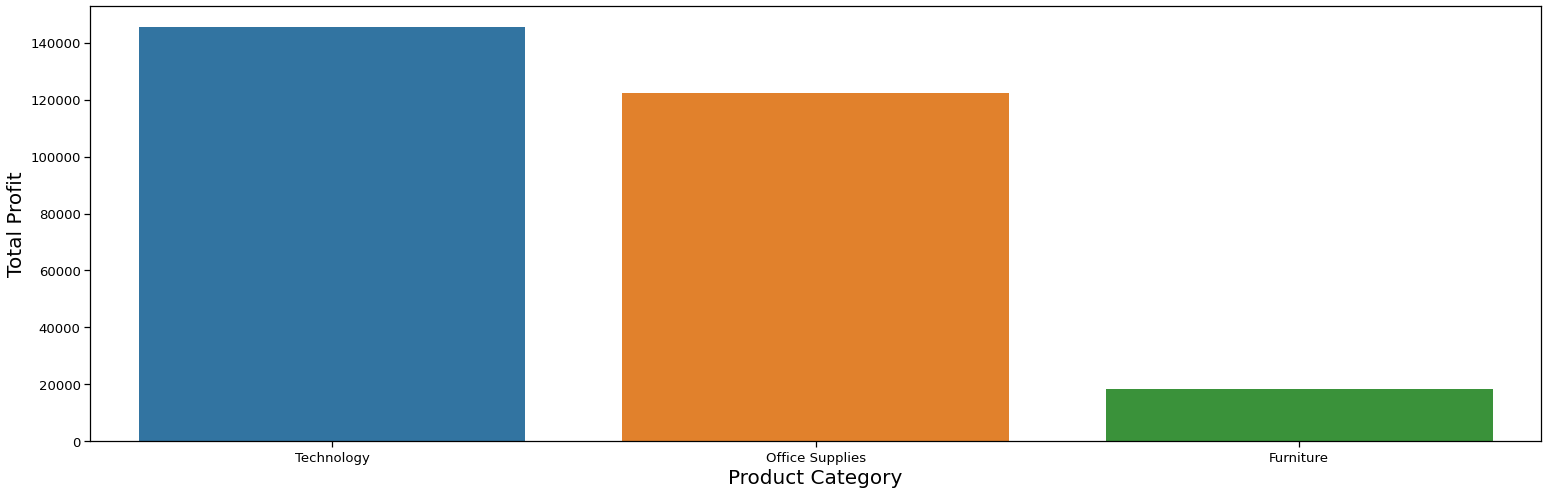

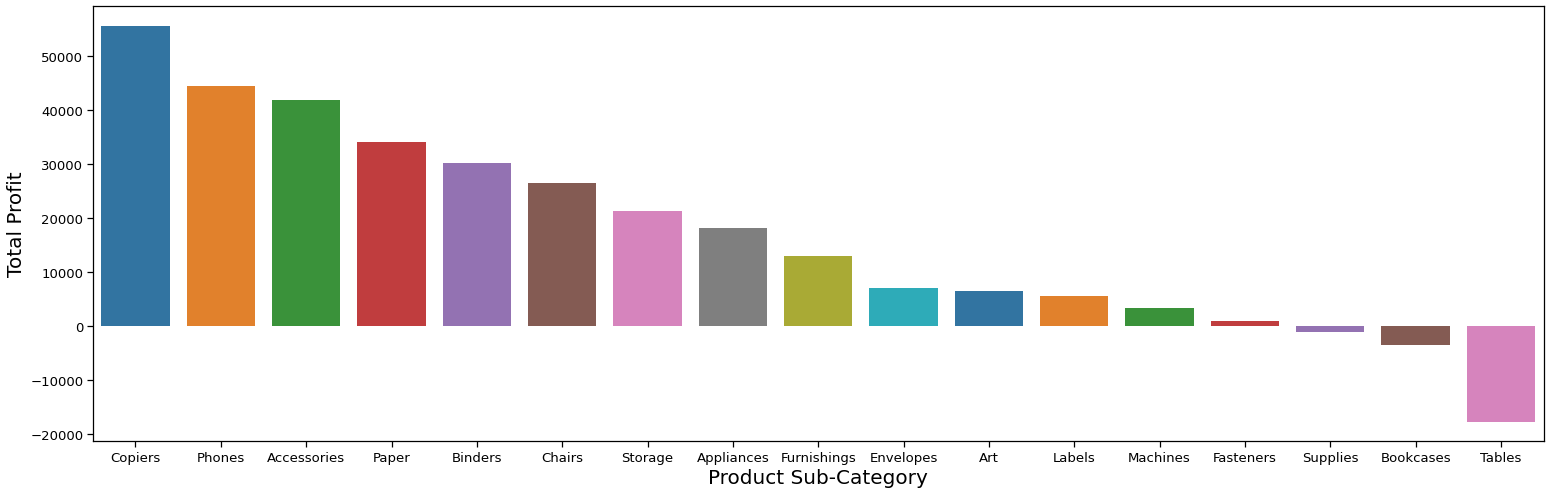

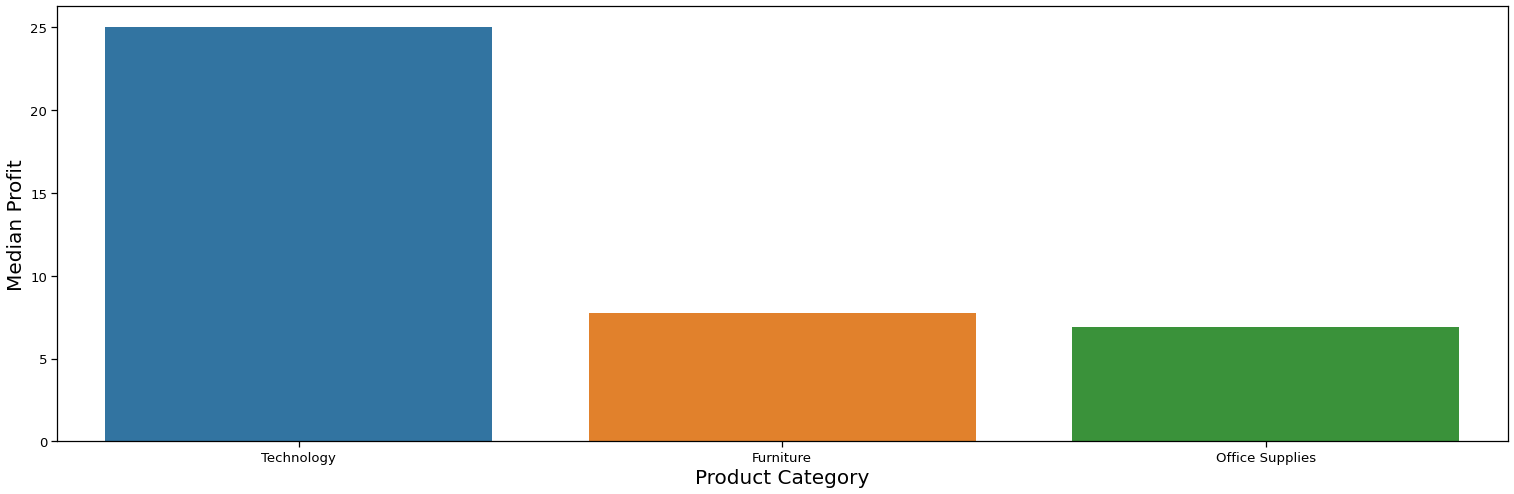

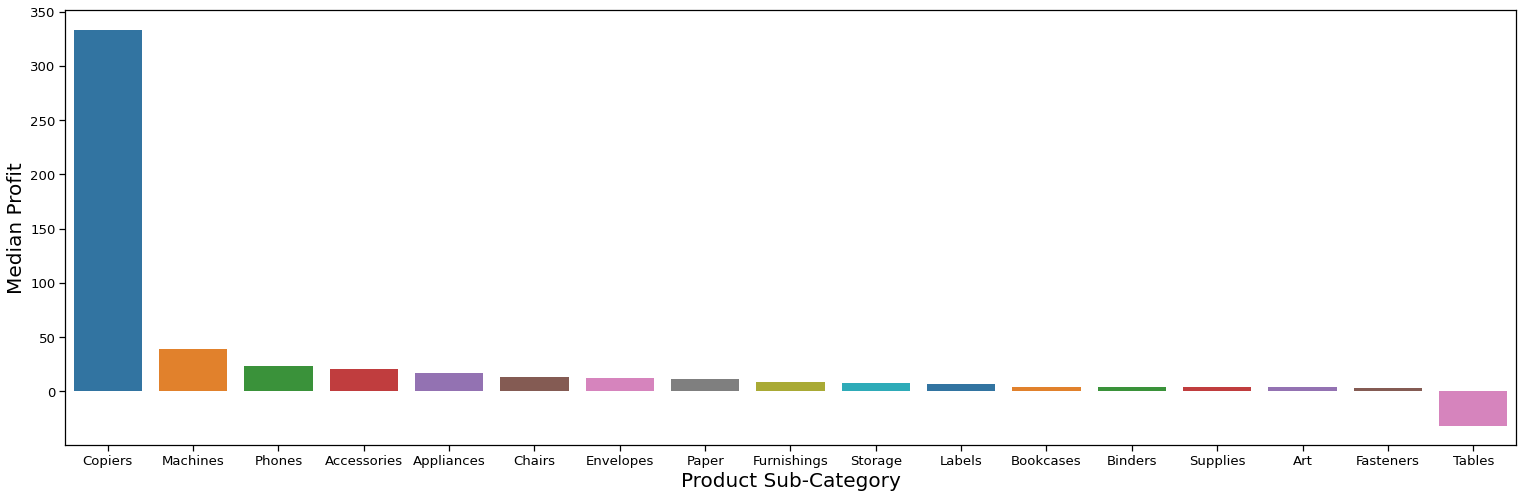

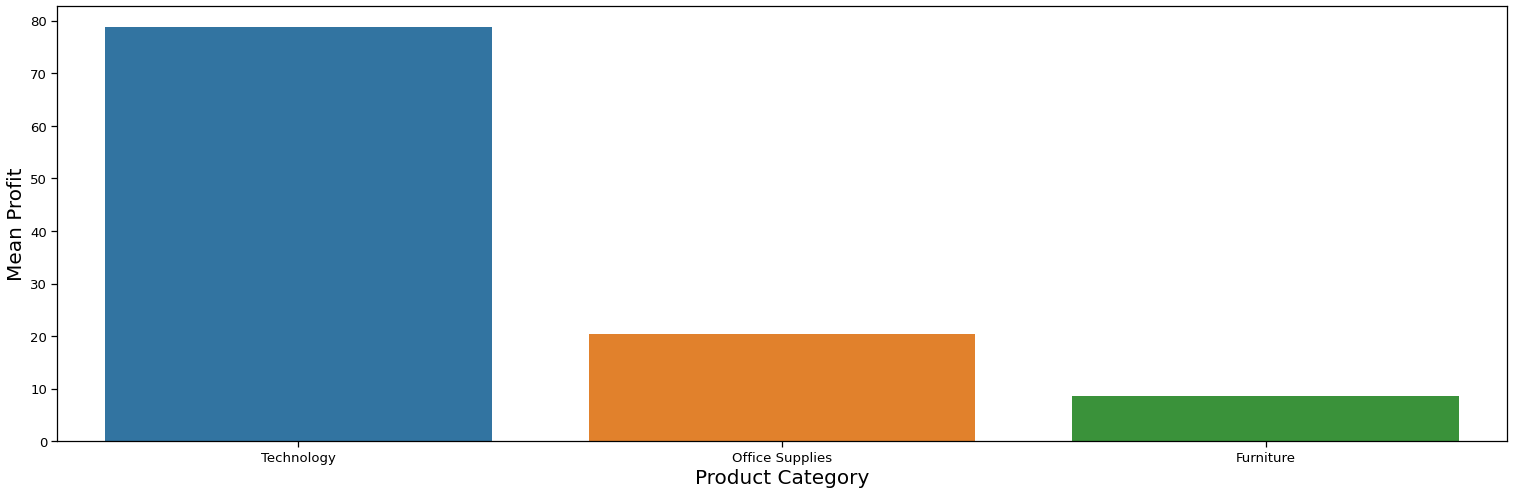

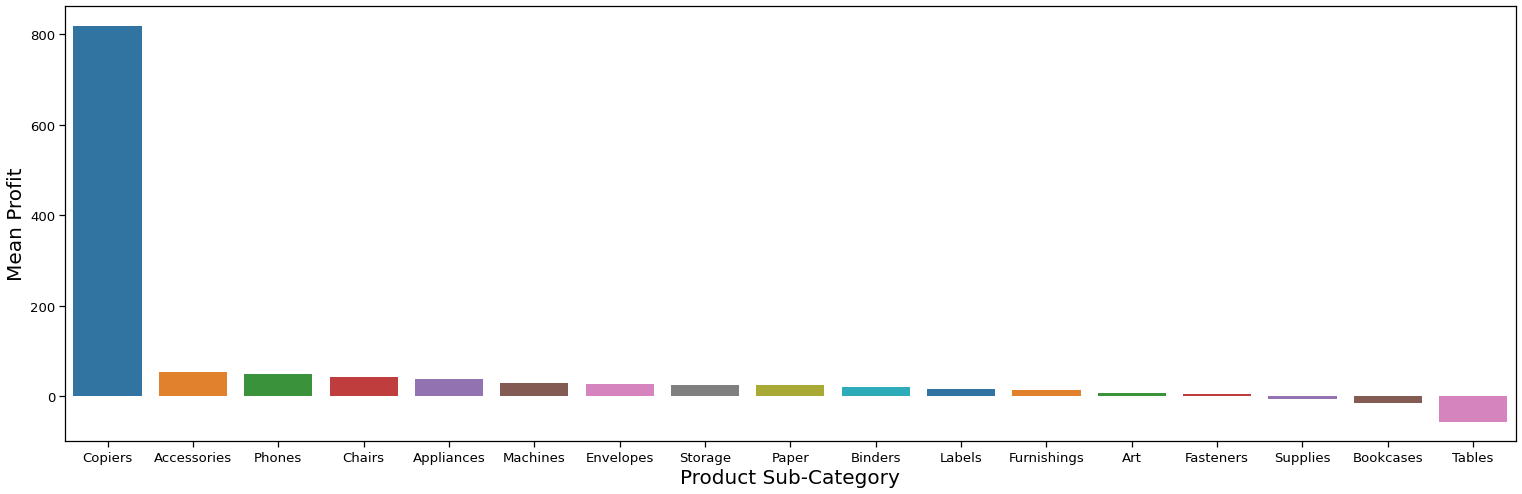

In [14]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Profit"+"</b></h2><hr>"
    display(HTML(text))    
    for col in product_based_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Profit'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Profit'].median().reset_index()
        else:
            temp=df.groupby(col)['Profit'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Profit']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)[:35]
            text="<center><h3><b>" + f"{criterion} Profit with respect to Product</b><b style='color:red'> {col}(Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)
            text="<center><h3><b>" + f"{criterion} Profit with respect to Product</b><b style='color:red'> {col}"+ "</b></h3></center>"


        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Profit',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Profit',size=20)
        plt.xlabel('Product '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='profit-service'>Profit with respect to</b> <b style='color:red'> Service based feature</b><hr>

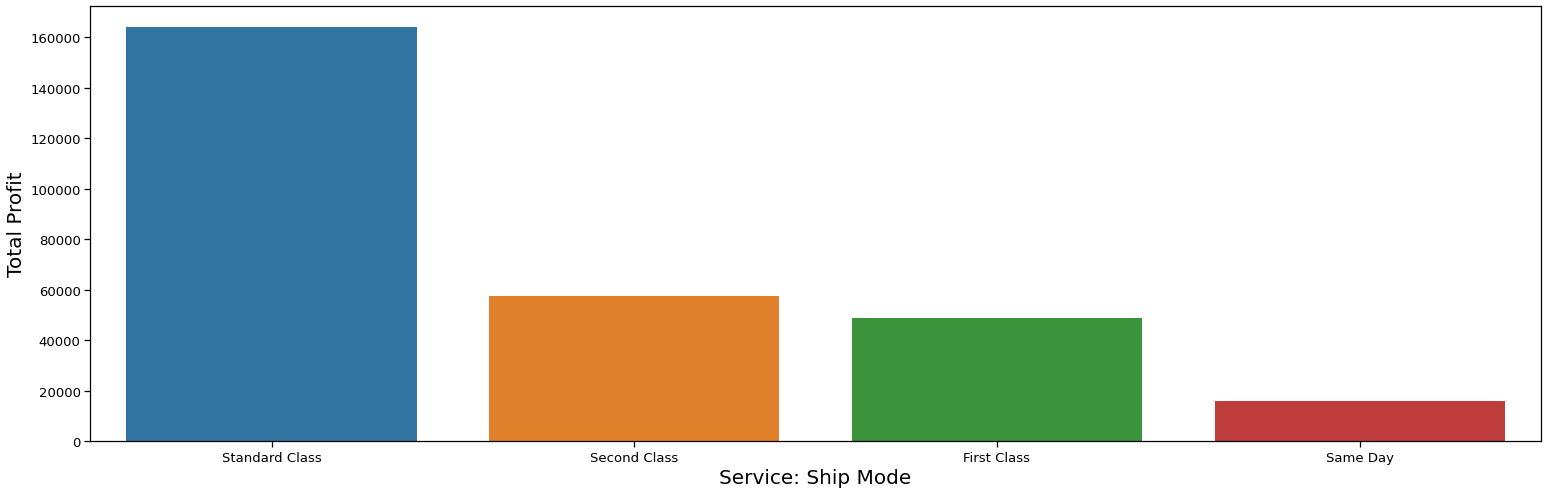

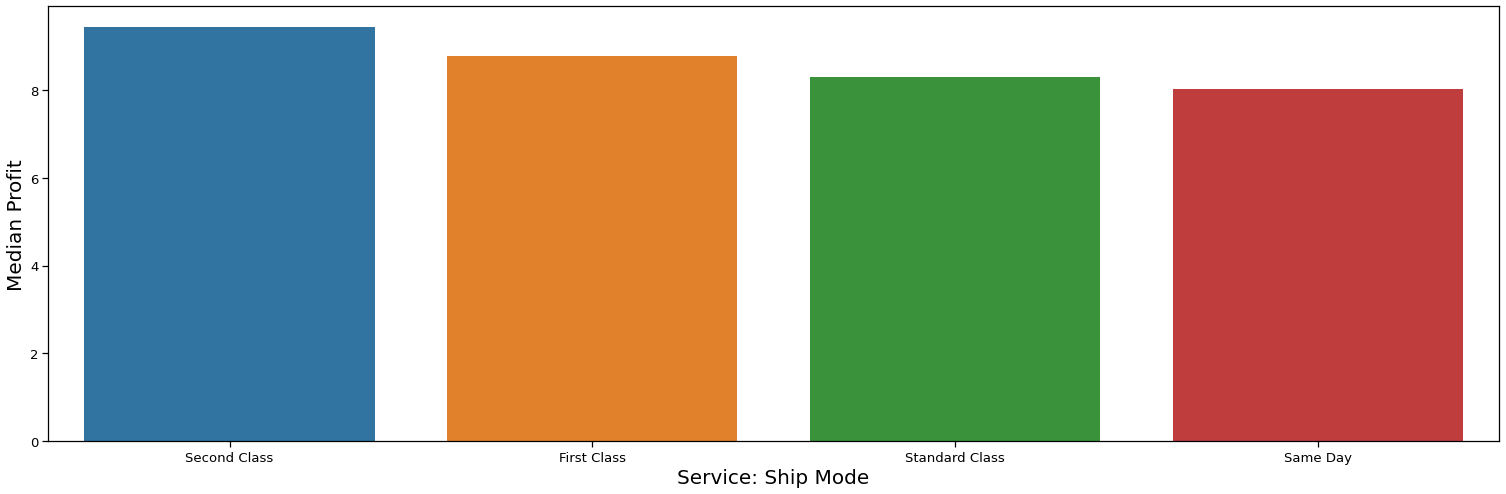

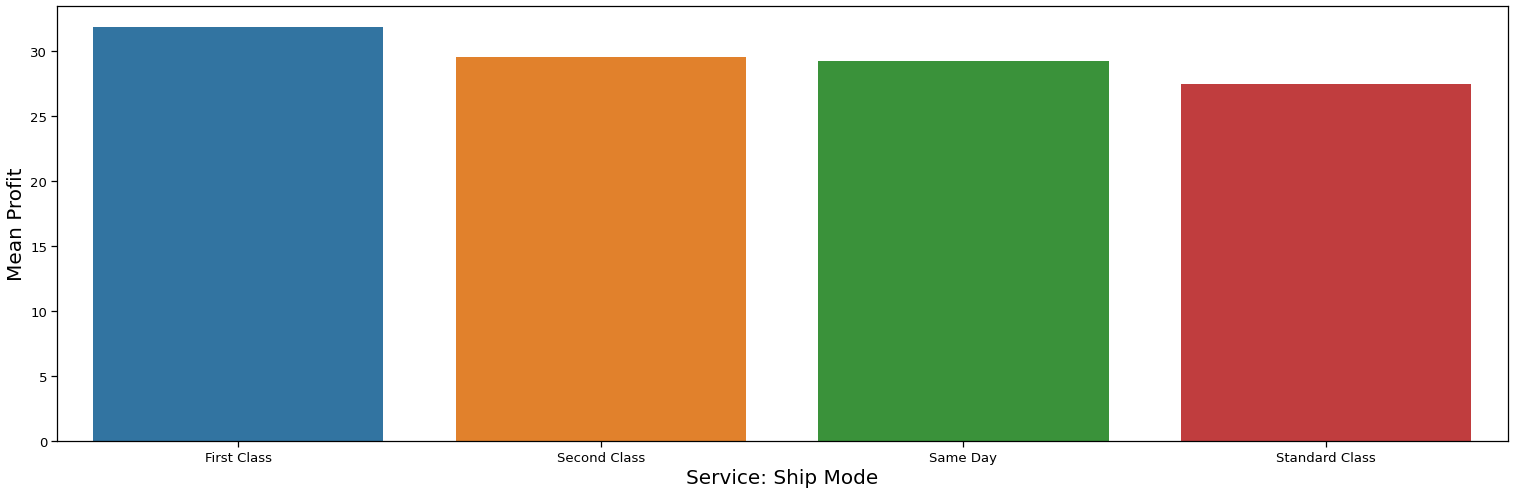

In [15]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Profit"+"</b></h2><hr>"
    display(HTML(text))    
    for col in service_based_col:
        if criterion == 'Total':
            temp=df.groupby(col)['Profit'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Profit'].median().reset_index()
        else:
            temp=df.groupby(col)['Profit'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Profit']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)[:35]
            angle=60
            text="<center><h3 ><b>" + f"{criterion} Profit with respect to </b> <b style='color:red'>Service: {col}(Top 35)"+ "</b></h3></center>"

        else:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Profit with respect to </b> <b style='color:red'>Service: {col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Profit',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Profit',size=20)
        plt.xlabel('Service: '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='profit-segment'>Profit with respect to</b> <b style='color:red'> Customer Segment</b><hr>

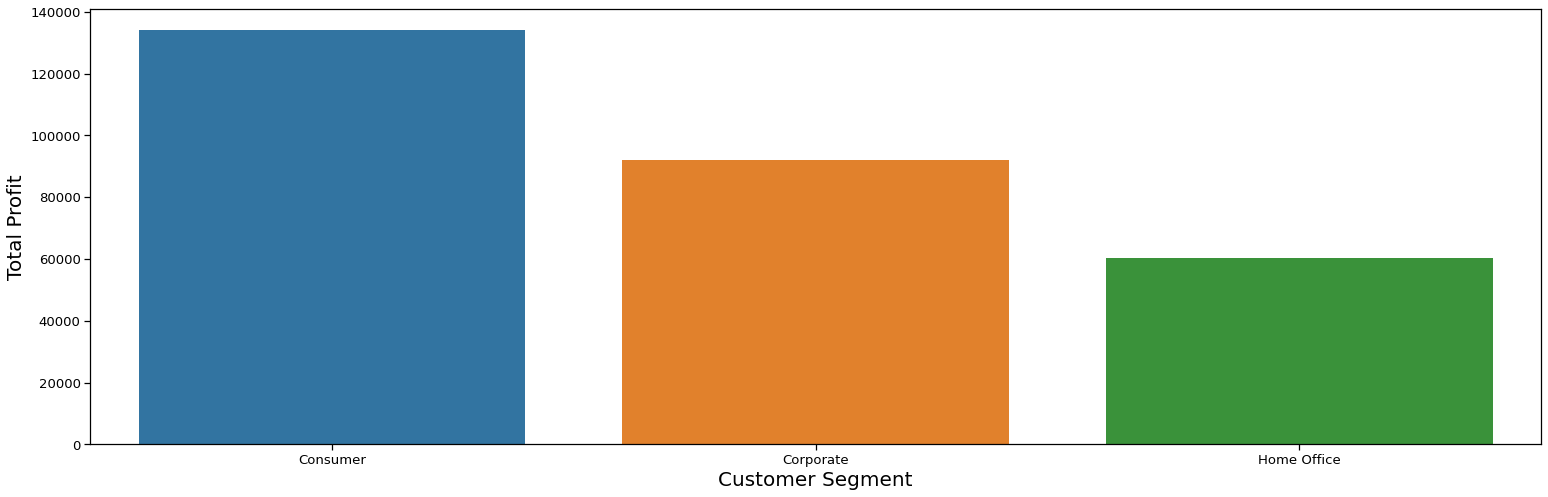

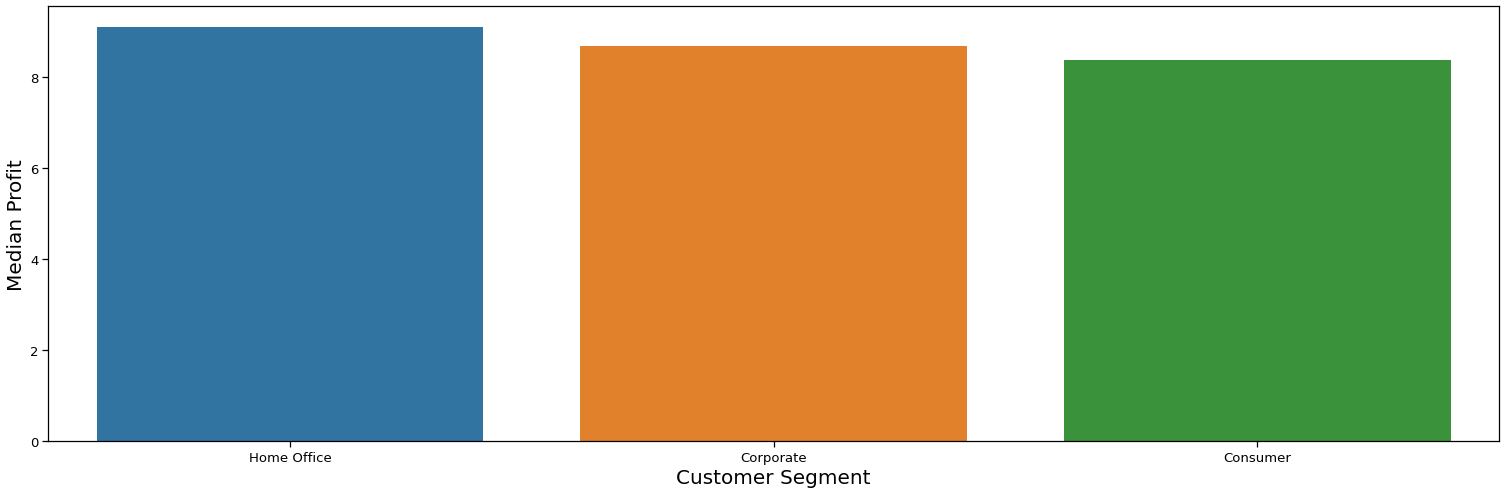

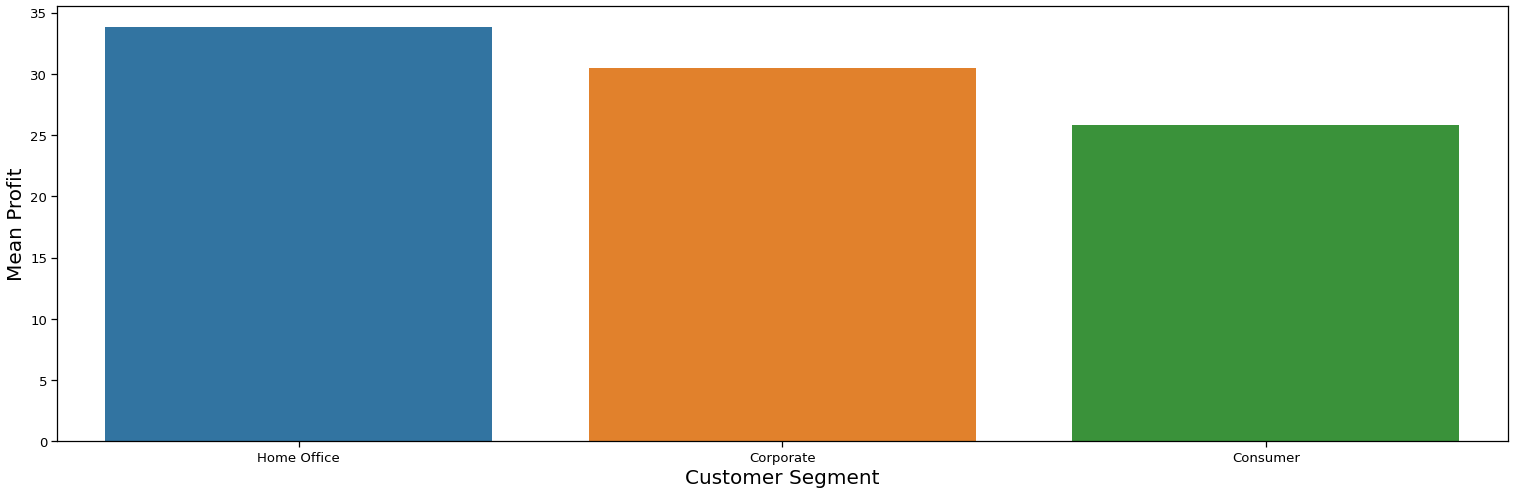

In [16]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Profits"+"</b></h2><hr>"
    display(HTML(text))    
    for col in customer_segment_col:
        if criterion == 'Total':
            temp=df.groupby(col)['Profit'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Profit'].median().reset_index()
        else:
            temp=df.groupby(col)['Profit'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Profit']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Profit with respect to Customer</b> <b style='color:red'> {col}(Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Profit',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Profit with respect to Customer</b> <b style='color:red'> {col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Profit',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Profit',size=20)
        plt.xlabel('Customer '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='quan-geo'>Number of Products sold with respect to</b> <b style='color:red'> Geographical features</b><hr>

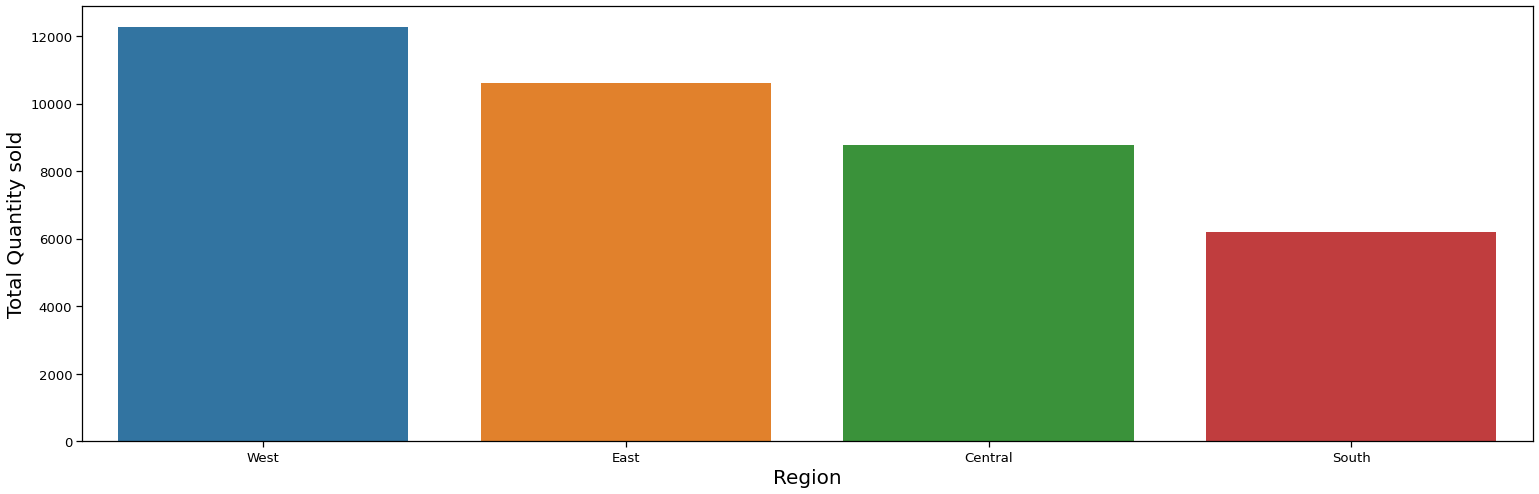

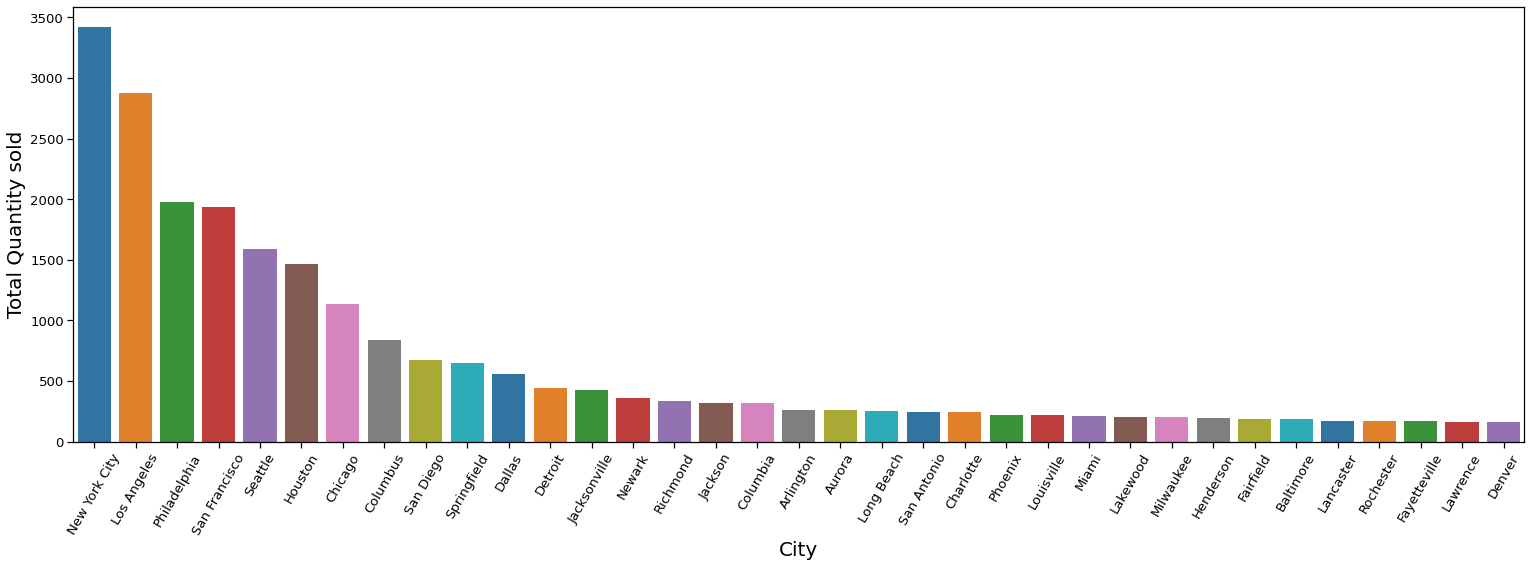

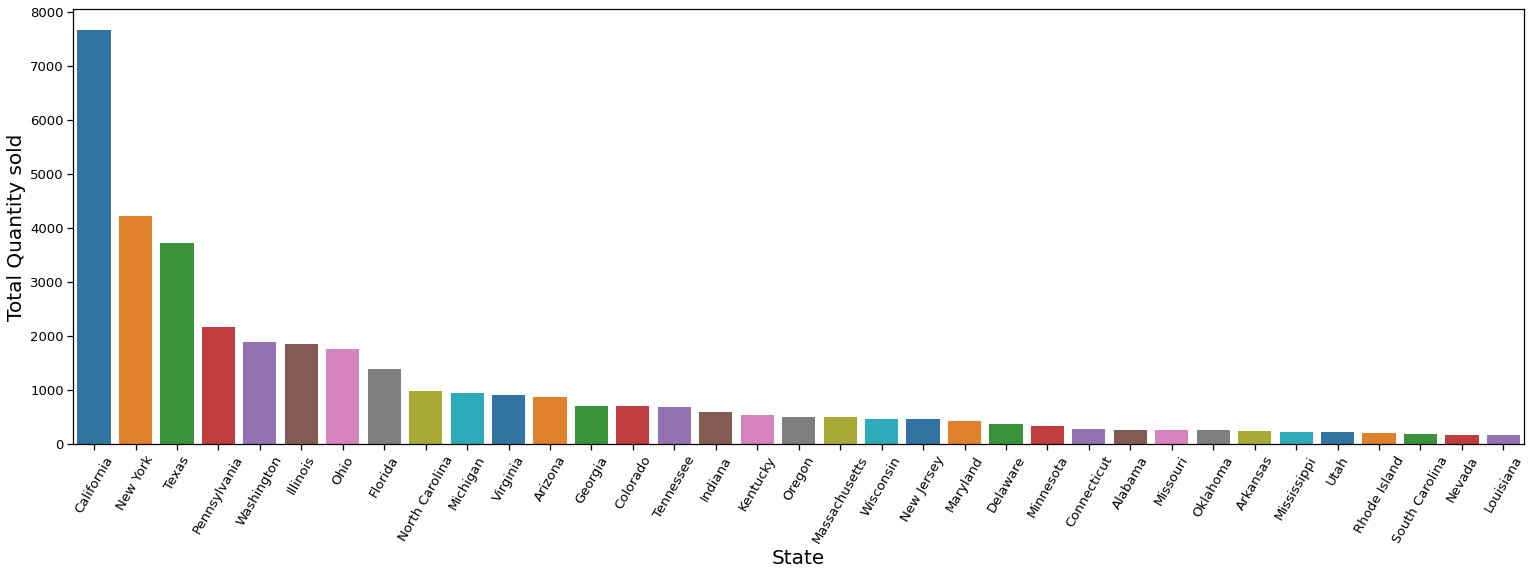

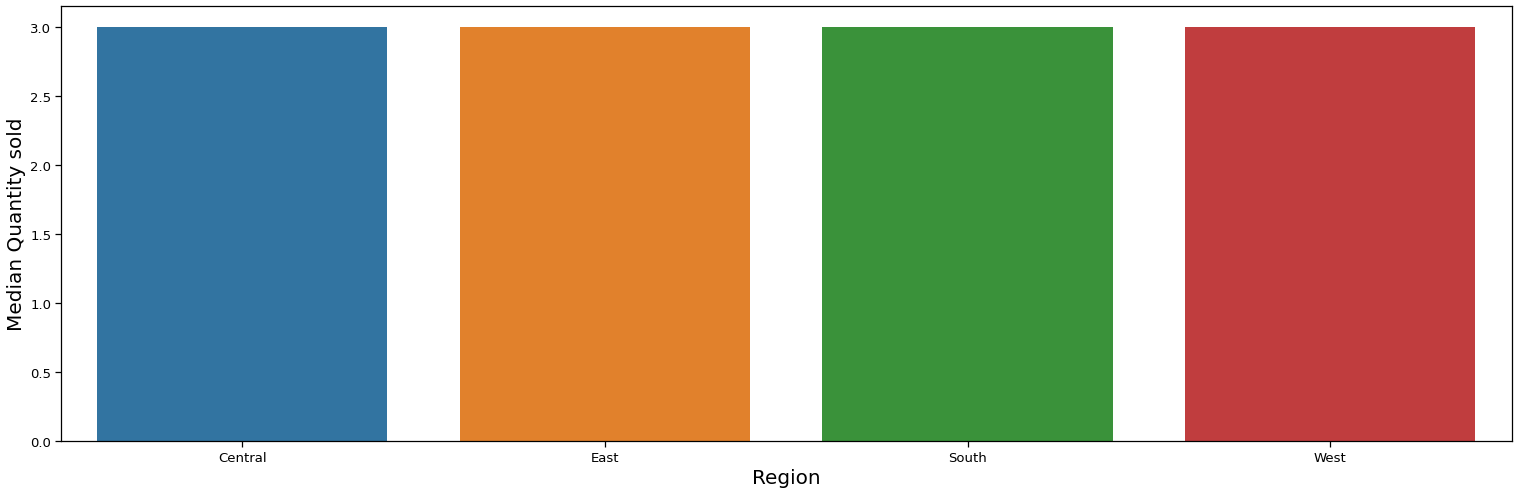

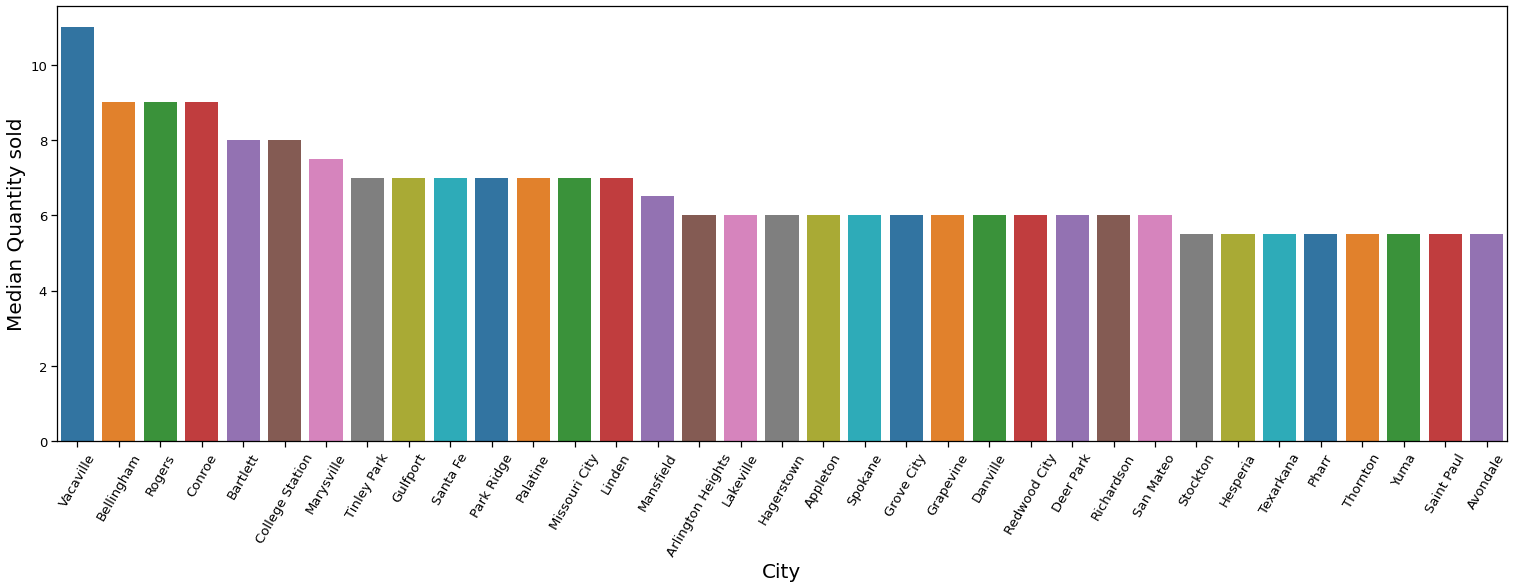

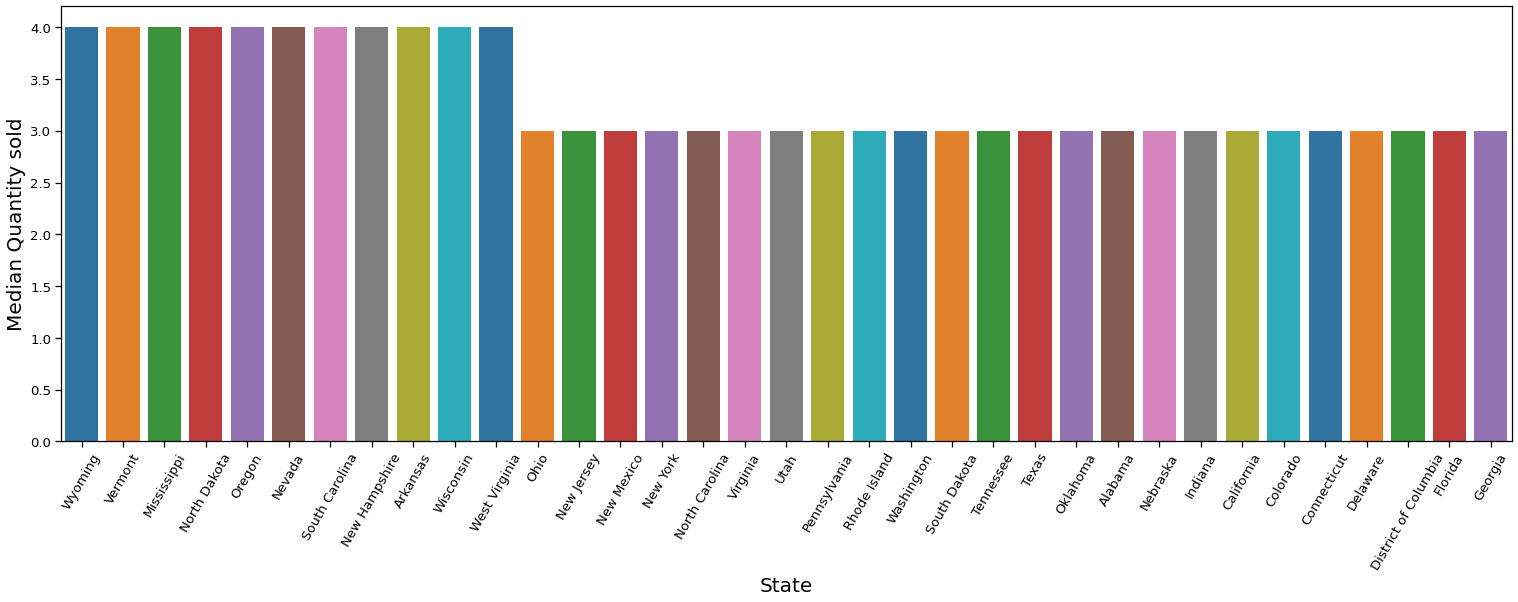

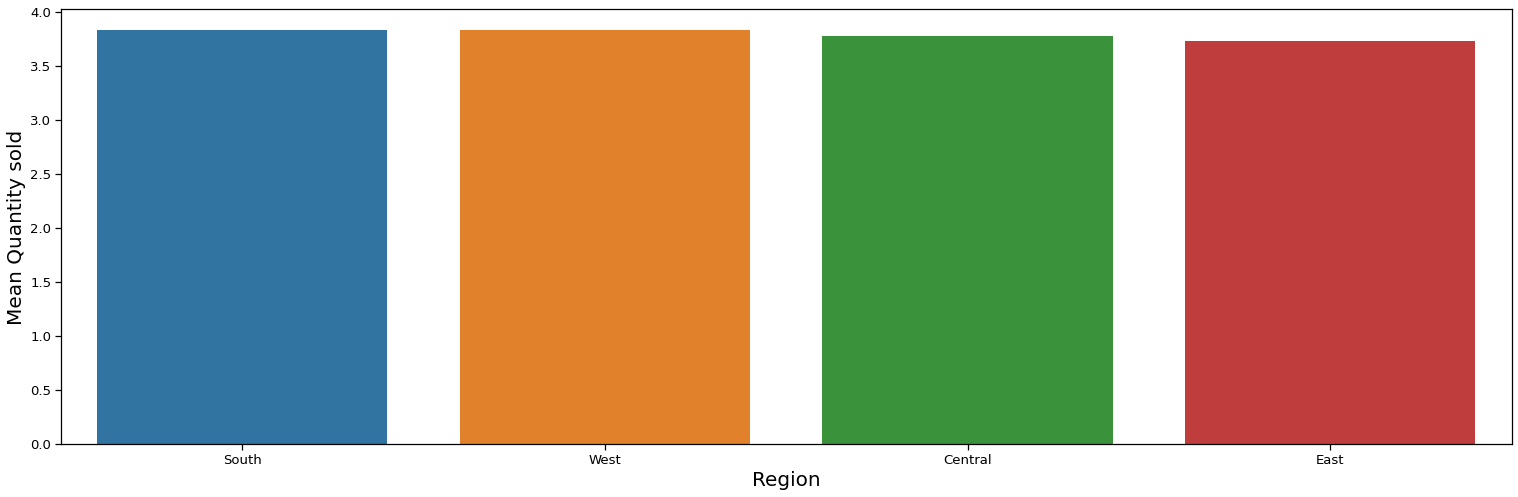

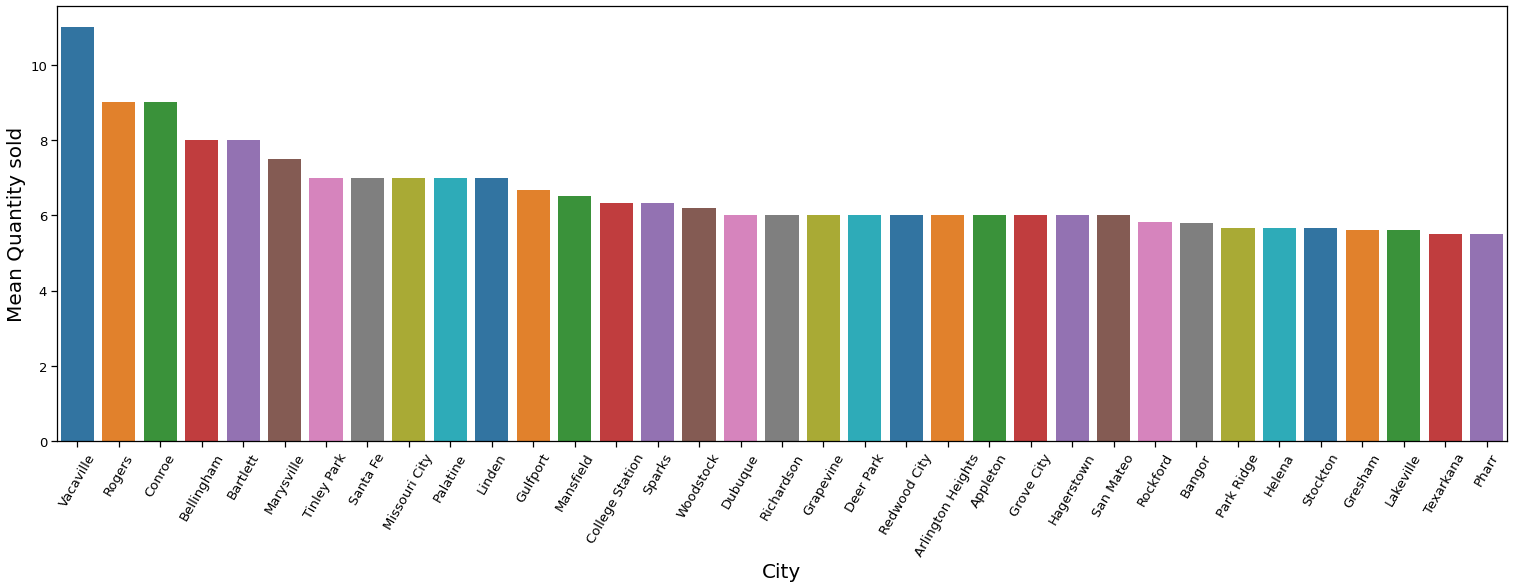

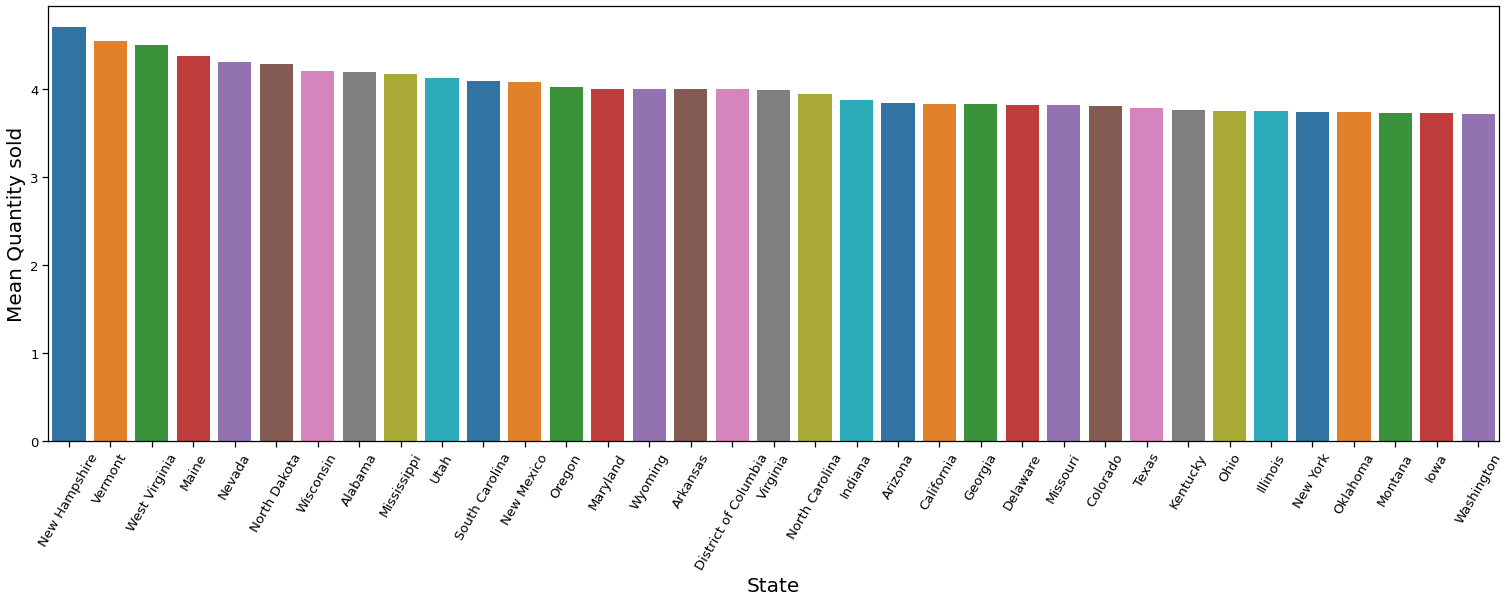

In [17]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Quantity sold"+"</b></h2><hr>"
    display(HTML(text))    
    for col in geographic_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Quantity'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Quantity'].median().reset_index()
        else:
            temp=df.groupby(col)['Quantity'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Quantity']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Quantity sold with respect to</b> <b style='color:red'> {col}(Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Quantity sold with respect to</b> <b style='color:red'> {col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Quantity',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Quantity sold',size=20)
        plt.xlabel(col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='quan-pro'>Number of Products sold with respect to</b> <b style='color:red'> Product based features</b><hr>

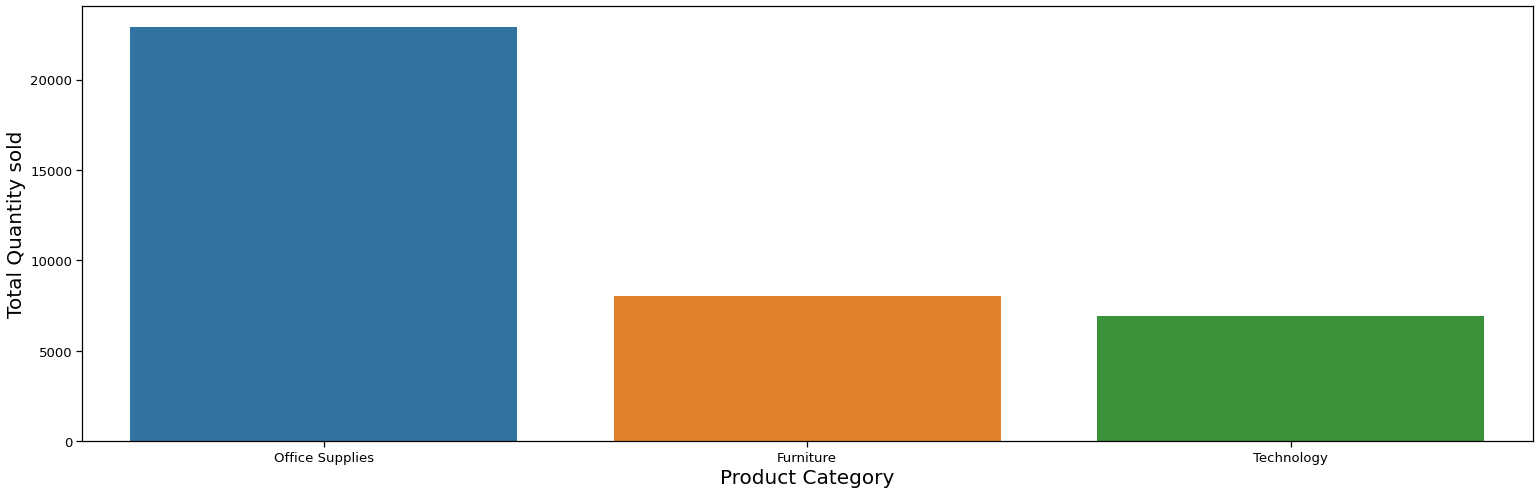

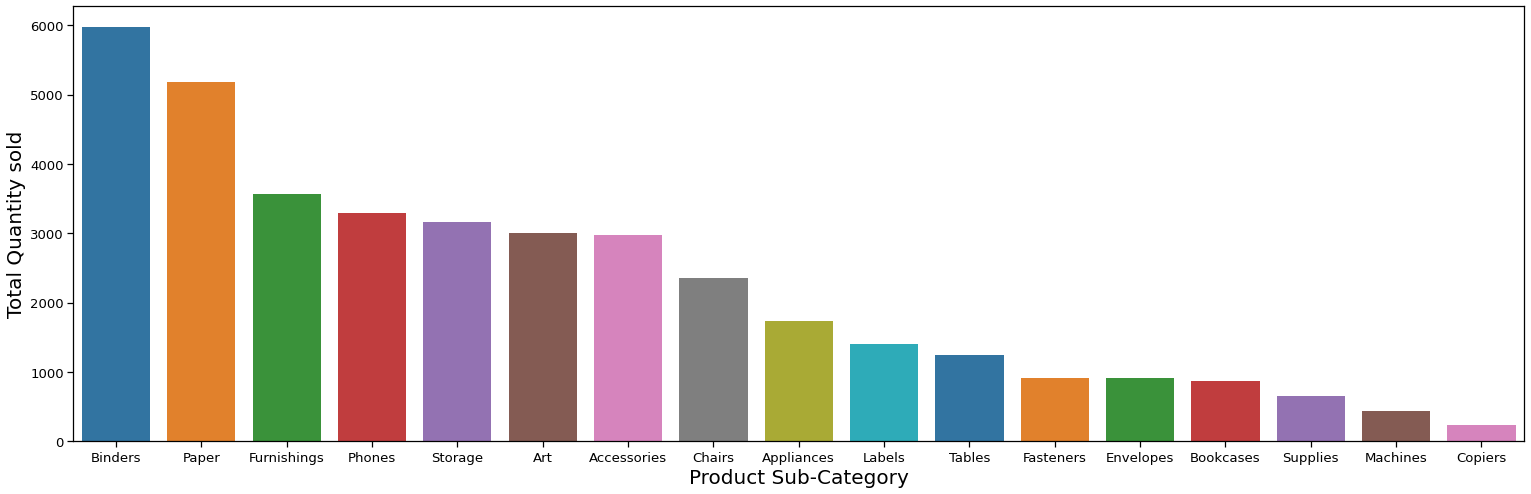

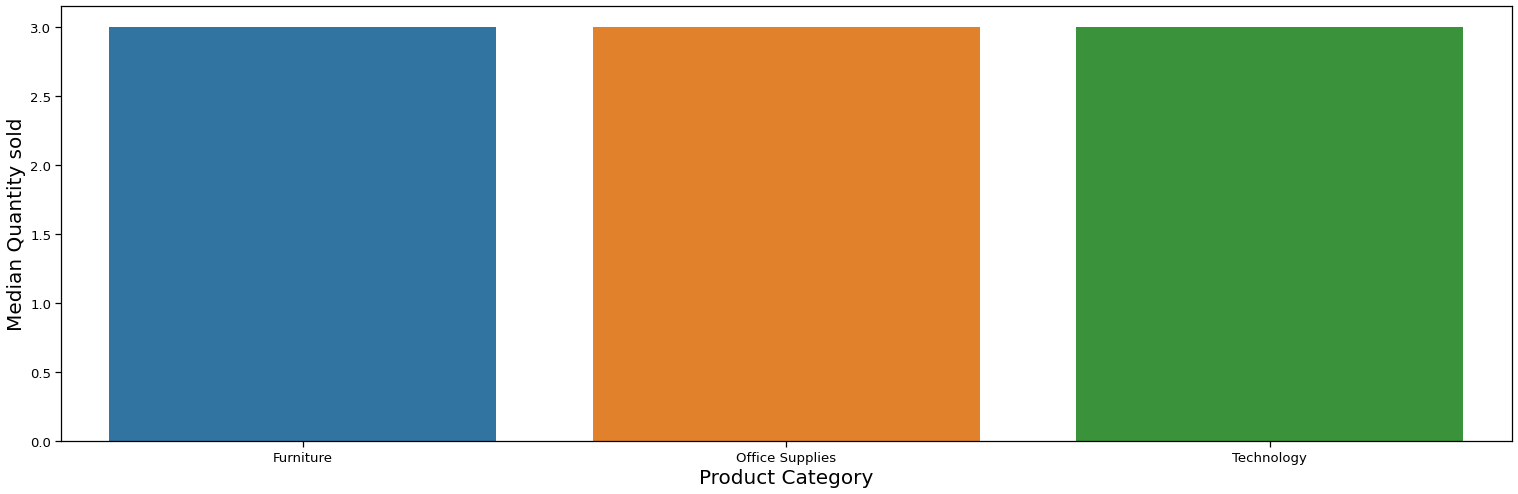

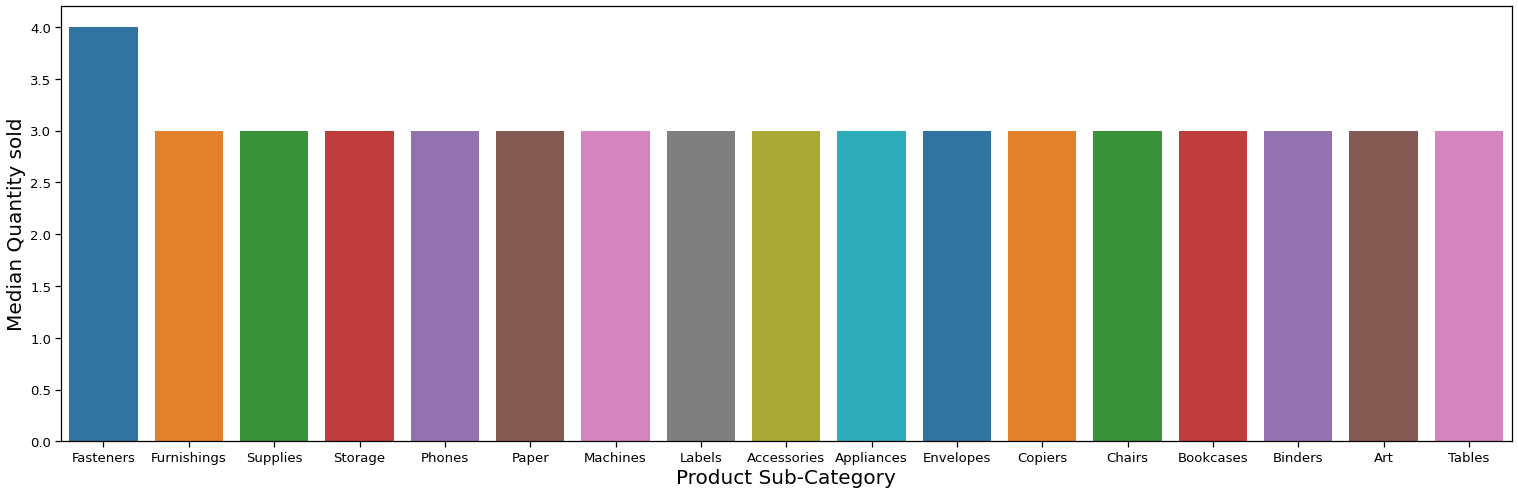

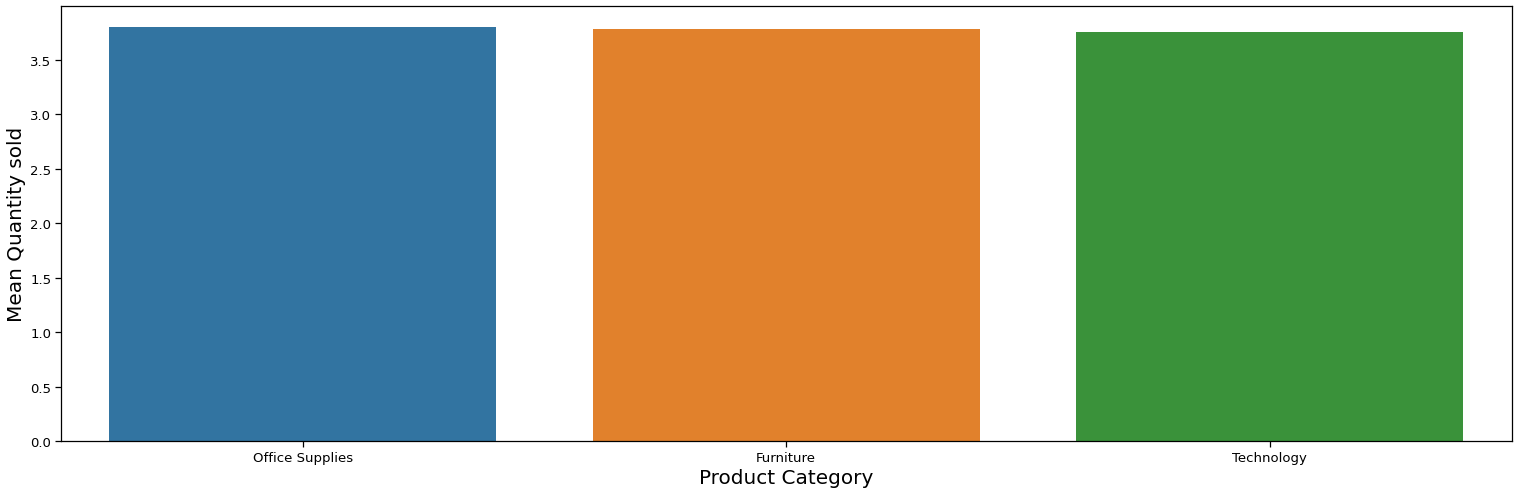

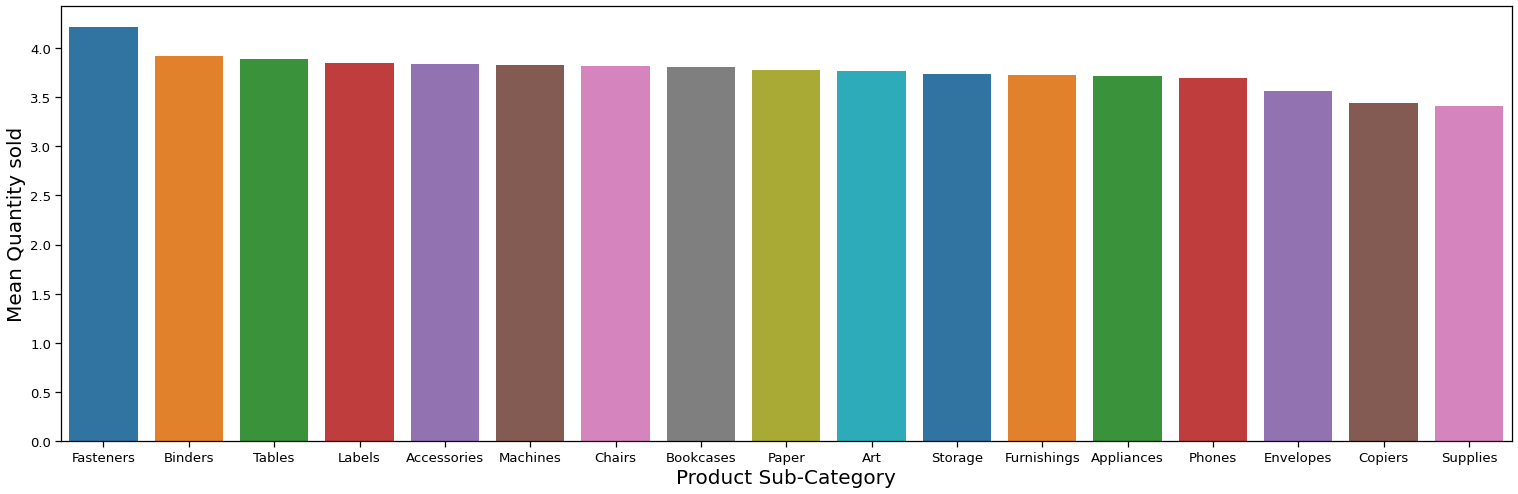

In [18]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Quantity sold"+"</b></h2><hr>"
    display(HTML(text))    
    for col in product_based_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Quantity'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Quantity'].median().reset_index()
        else:
            temp=df.groupby(col)['Quantity'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Quantity']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Quantity sold with respect to Product</b> <b style='color:red'>{col}(Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Quantity sold with respect to Product</b> <b style='color:red'>{col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Quantity',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Quantity sold',size=20)
        plt.xlabel('Product '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='quan-service'>Number of Products sold with respect to</b> <b style='color:red'> Service feature</b><hr>

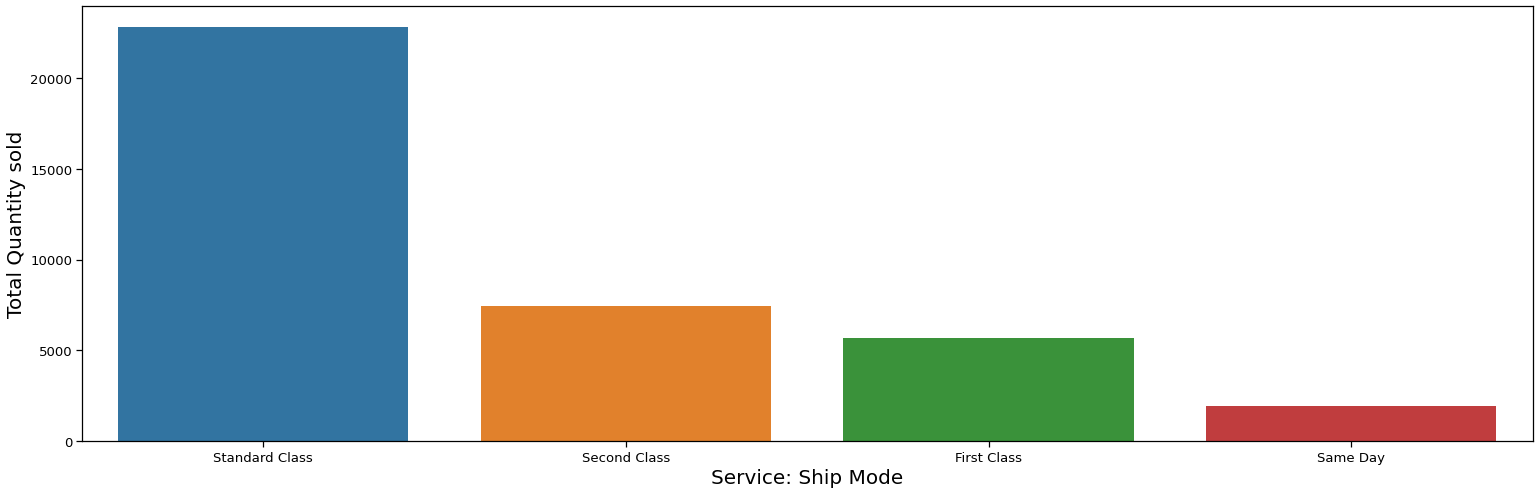

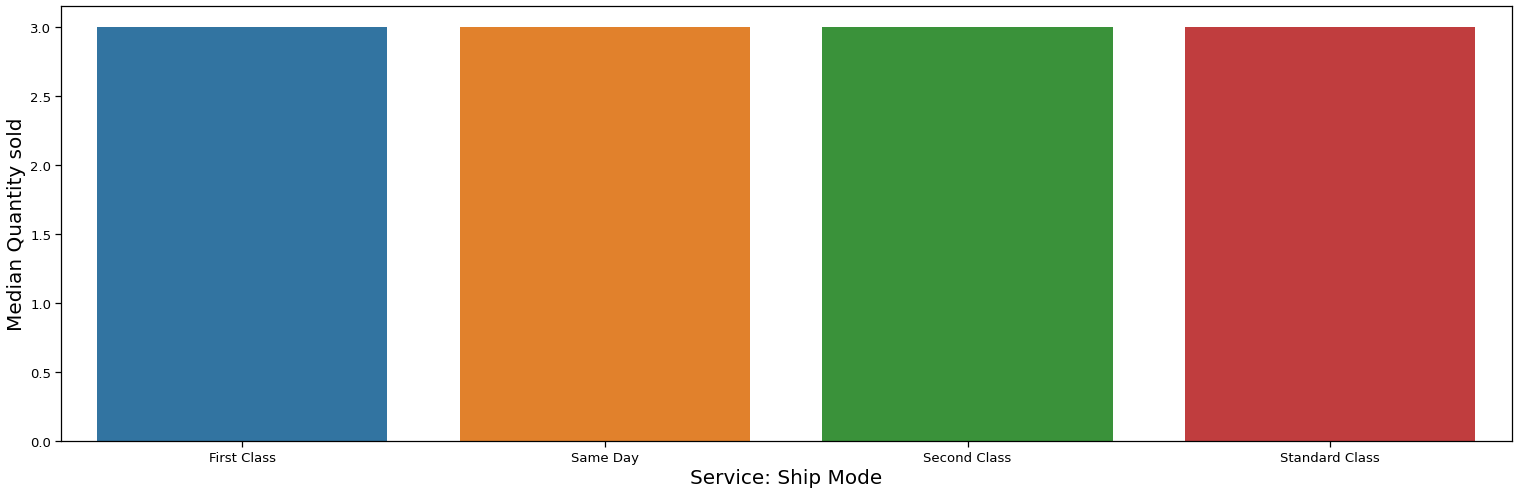

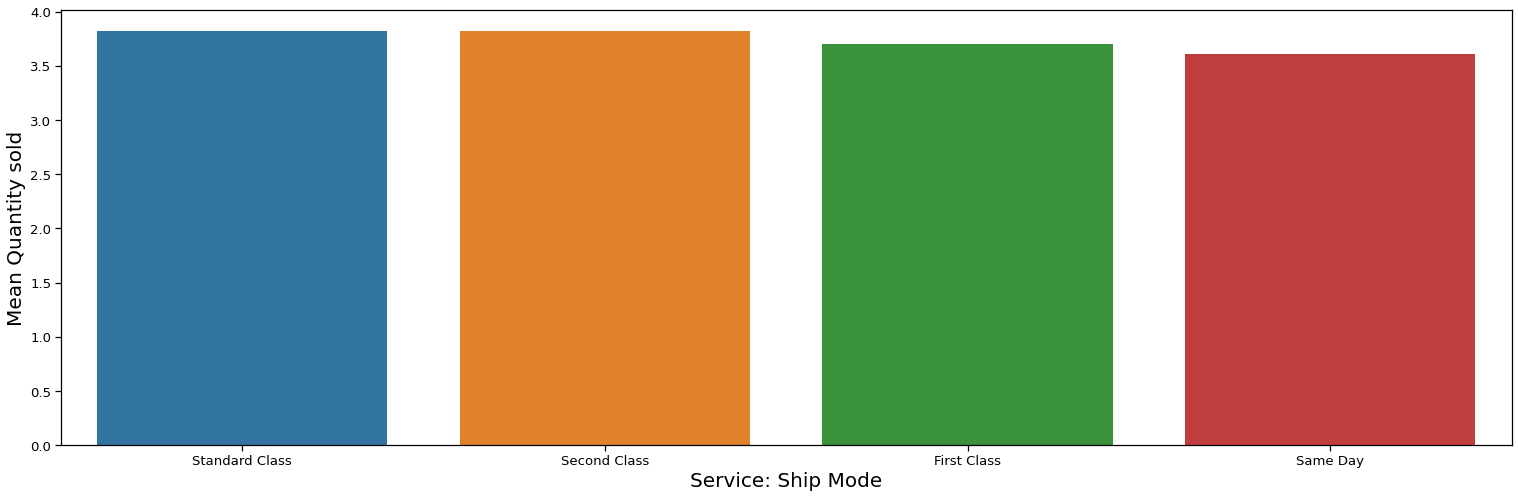

In [19]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Quantity sold"+"</b></h2><hr>"
    display(HTML(text))    
    for col in service_based_col:
        if criterion == 'Total':
            temp=df.groupby(col)['Quantity'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Quantity'].median().reset_index()
        else:
            temp=df.groupby(col)['Quantity'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Quantity']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)[:35]
            text="<center><h3 b>" + f"{criterion} Quantity sold with respect to Service:</b> <b style='color:red'> {col}(Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)
            text="<center><h3 b>" + f"{criterion} Quantity sold with respect to Service:</b> <b style='color:red'> {col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Quantity',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Quantity sold',size=20)
        plt.xlabel('Service: '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='quan-segment'>Number of Products sold with respect to</b> <b style='color:red'> Customer Segment</b><hr>

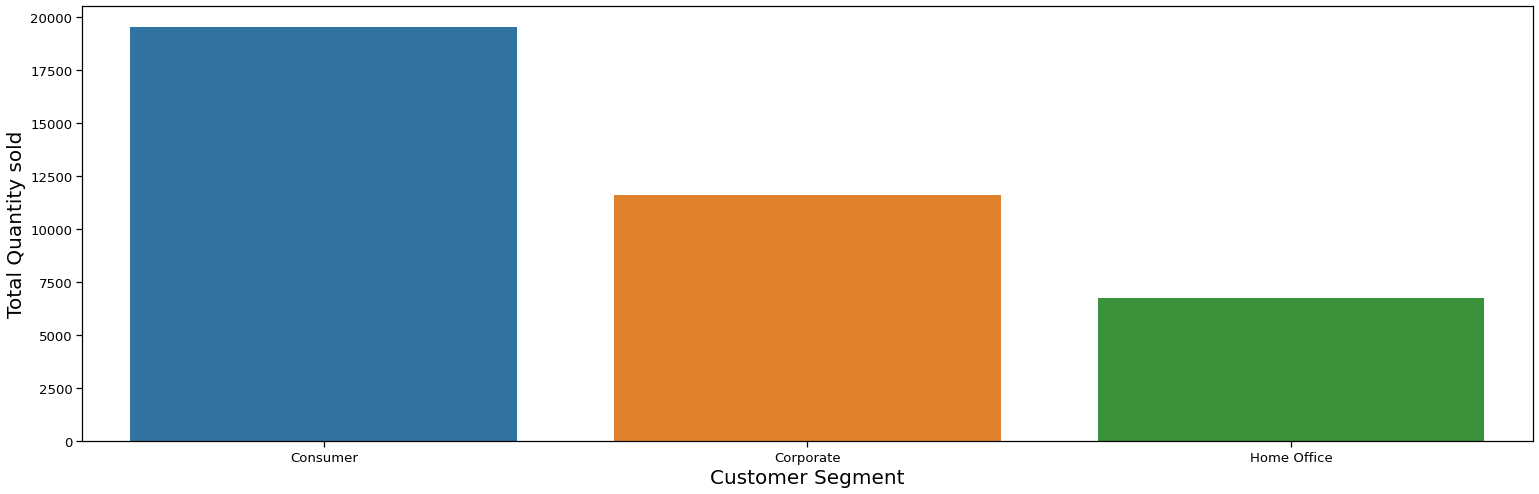

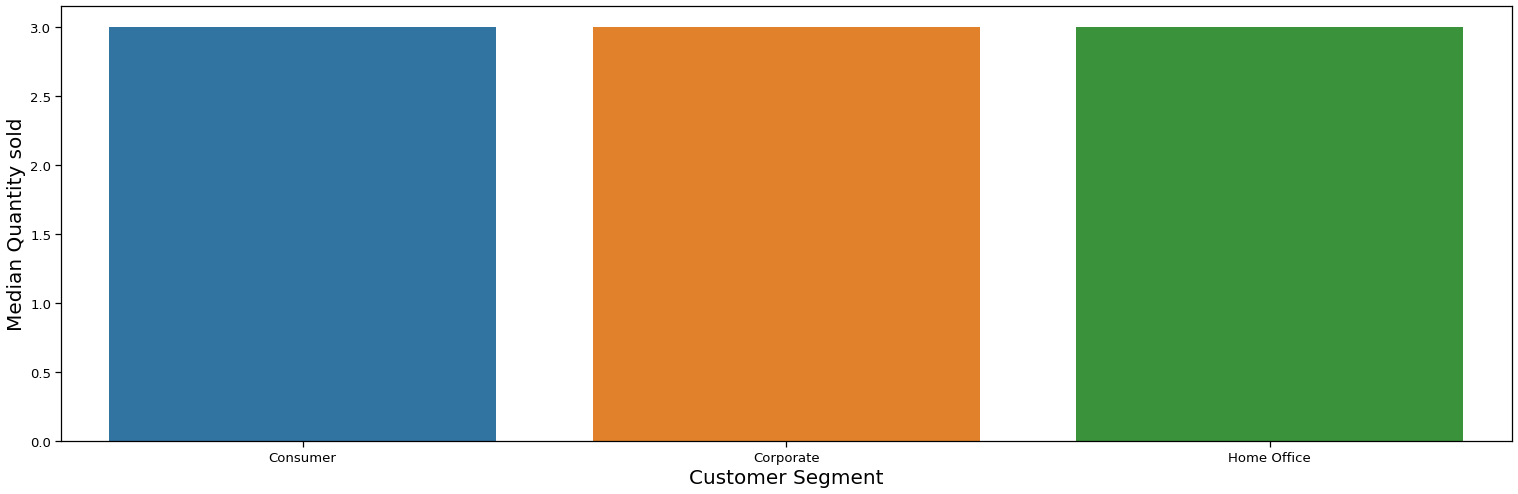

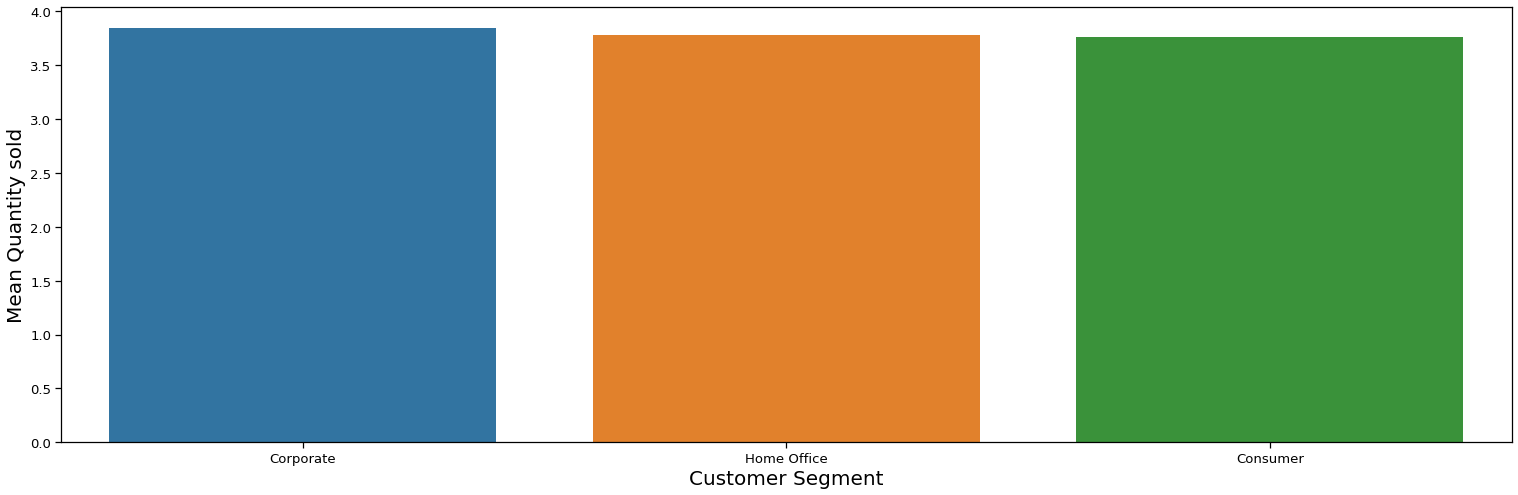

In [20]:
for criterion in ['Total','Median','Mean']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Quantity sold"+"</b></h2><hr>"
    display(HTML(text))    
    for col in customer_segment_col:
        if criterion == 'Total':
            temp=df.groupby(col)['Quantity'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Quantity'].median().reset_index()
        else:
            temp=df.groupby(col)['Quantity'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Quantity']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)[:35]
            text="<center><h3><b>" + f"{criterion} Quantity sold with respect to </b> <b  style='color:red'> Customer {col}"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Quantity',ascending=False)
            text="<center><h3><b>" + f"{criterion} Quantity sold with respect to </b> <b  style='color:red'> Customer {col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Quantity',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Quantity sold',size=20)
        plt.xlabel('Customer '+col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

# <b id='t-s'>Time Series Analysis of </b> <b style='color:red'>Sales, Profit, Quantity sold</b><hr>


<h2 style='color:red'><b> line plot:<b></h2>
<h2>A line chart or line plot or line graph or curve chart is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.
 </h2>


In [21]:
df['Order Date']=pd.to_datetime(df['Order Date'])

df.sort_values('Order Date',inplace=True)

ts_df=df.groupby(['Order Date'])[['Sales','Profit','Quantity']].mean()

ts_df.head()

Sales      Profit  Quantity
Order Date                                  
2014-01-03   16.448000    5.551200  2.000000
2014-01-04   96.020000  -21.996700  2.666667
2014-01-05   19.536000    4.884000  3.000000
2014-01-06  489.677778  150.894711  3.333333
2014-01-07   43.579000  -35.981050  5.000000

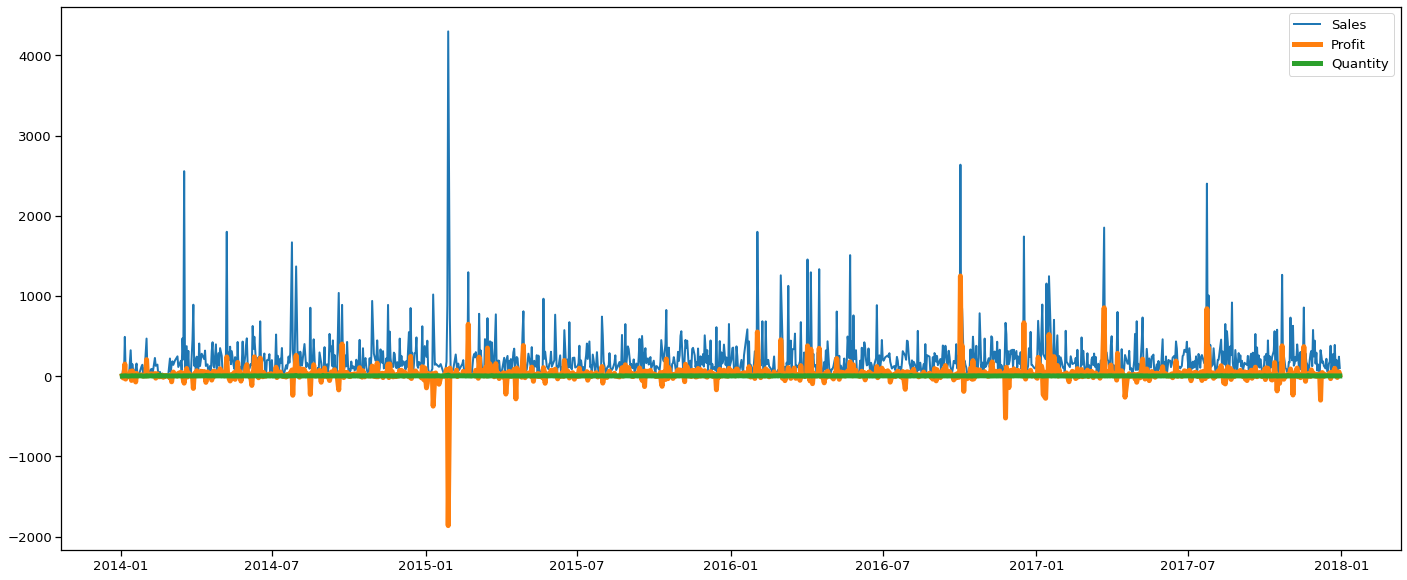

In [22]:
plt.figure(figsize=(24,10))
plt.plot(ts_df.index,'Sales',data=ts_df,lw=2,label='Sales')
plt.plot(ts_df.index,'Profit',data=ts_df,lw=5,label='Profit')
plt.plot(ts_df.index,'Quantity',data=ts_df,lw=5,label='Quantity')
text="<center><h3 ><b style='color:red'>" + f'Average Sales , Profit and Quantity sold </b> <b> over Time Period(2014-2018)'+ "</b></h3><hr></center>"
display(HTML(text))
plt.legend();

# <b id='p-vs-s' style='color:red'>Sales </b> <b>vs</b><b style='color:red'> Profit</b><hr>


<h2 style='color:red'><b> scatter plot:<b></h2>
<h2>A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.
 </h2>


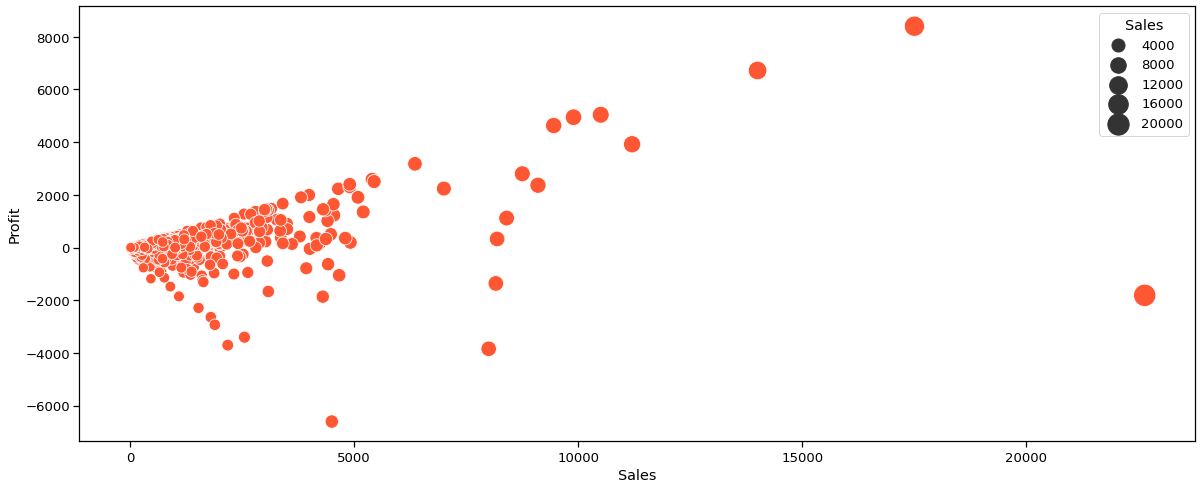

In [23]:
plt.figure(figsize=(20,8))
text="<center><h3><b style='color:red'>Sales </b> <b>vs</b><b style='color:red'> Profit</b>" + f'<b> for Time Period(2014-2018)'+ "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df,x='Sales',y='Profit',size='Sales',sizes=(100,500),marker='o',color='#FF5733');

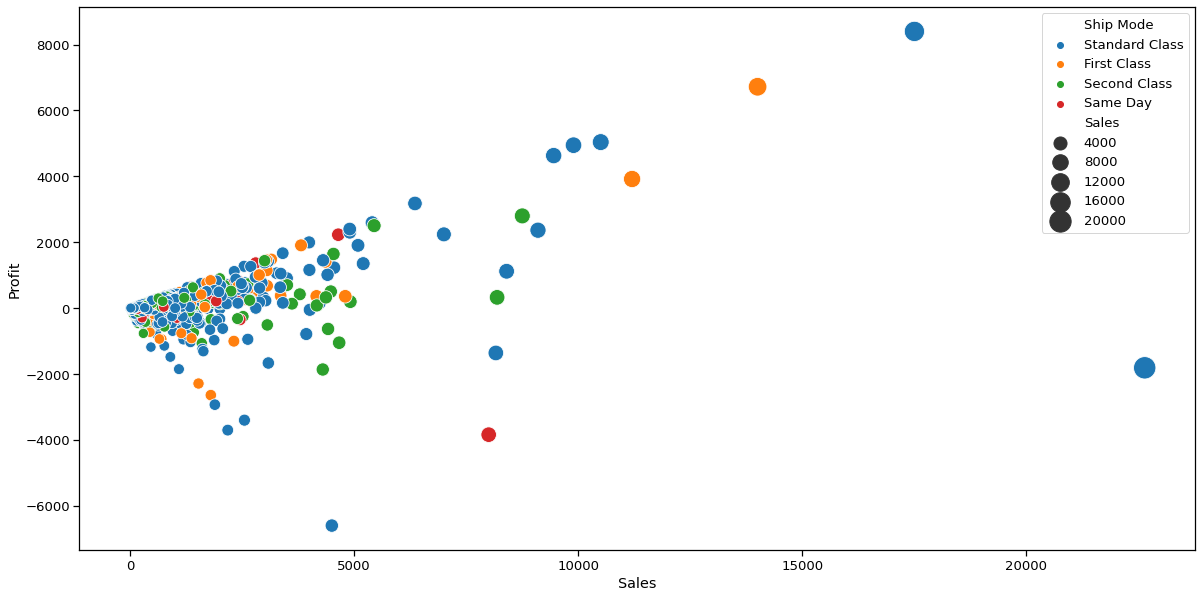

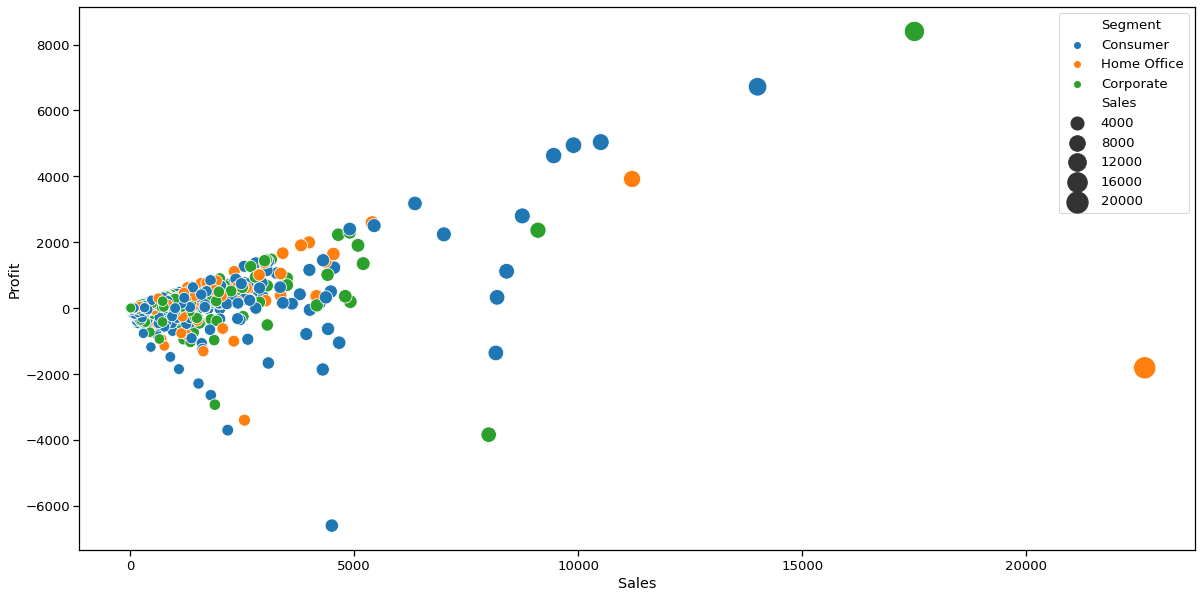

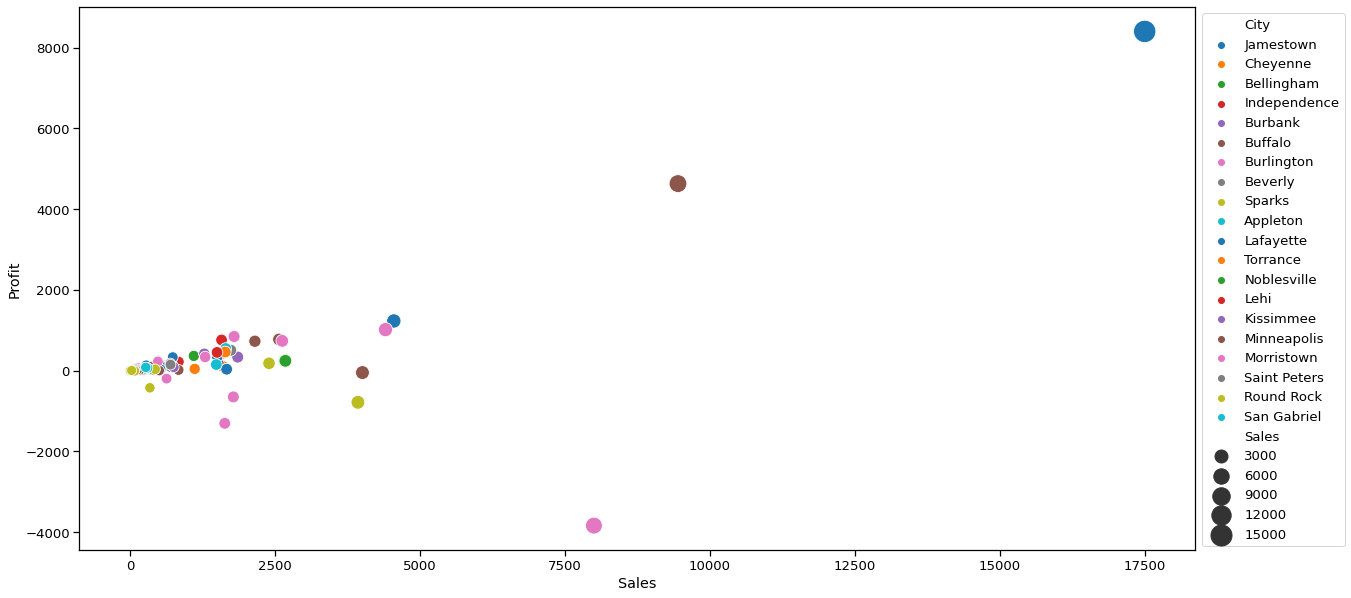

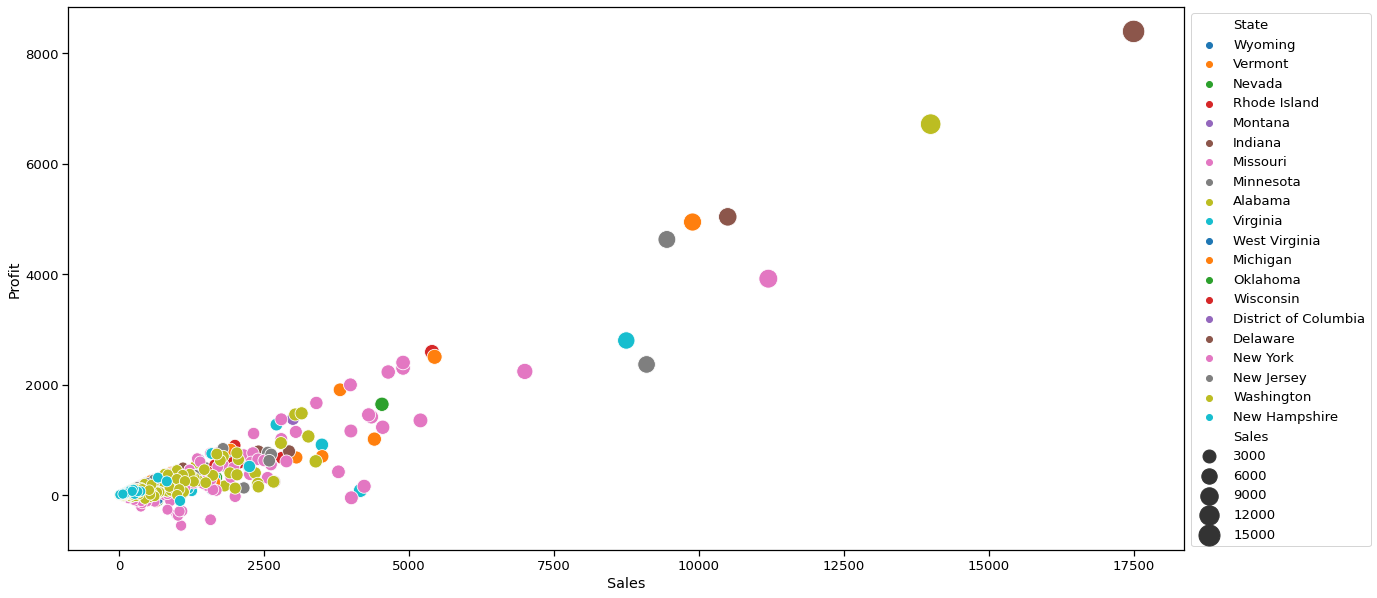

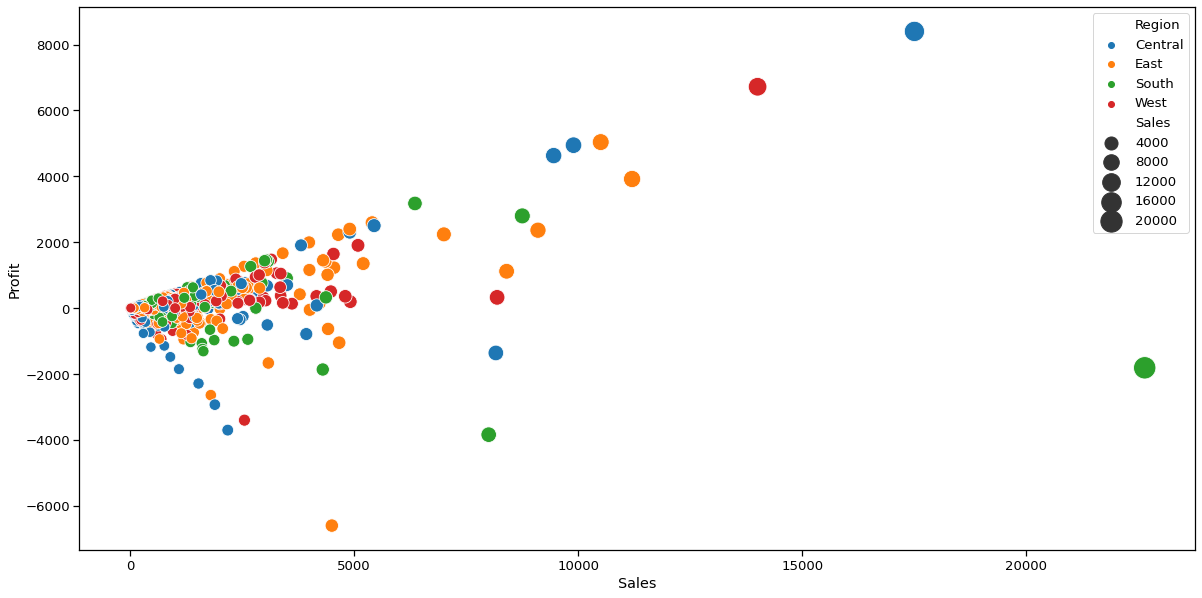

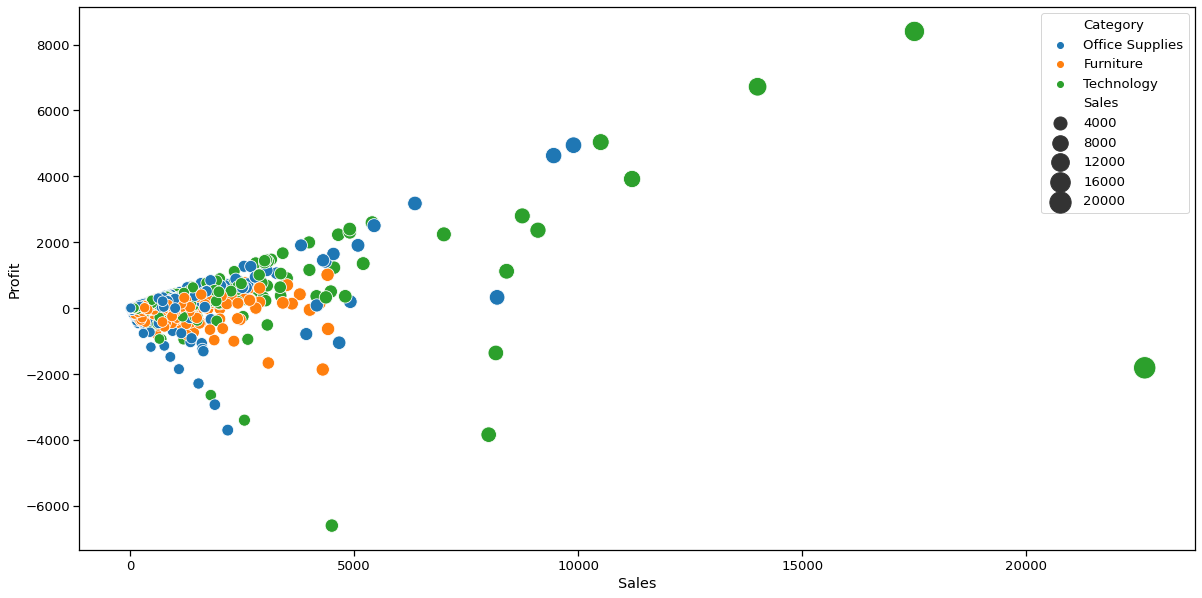

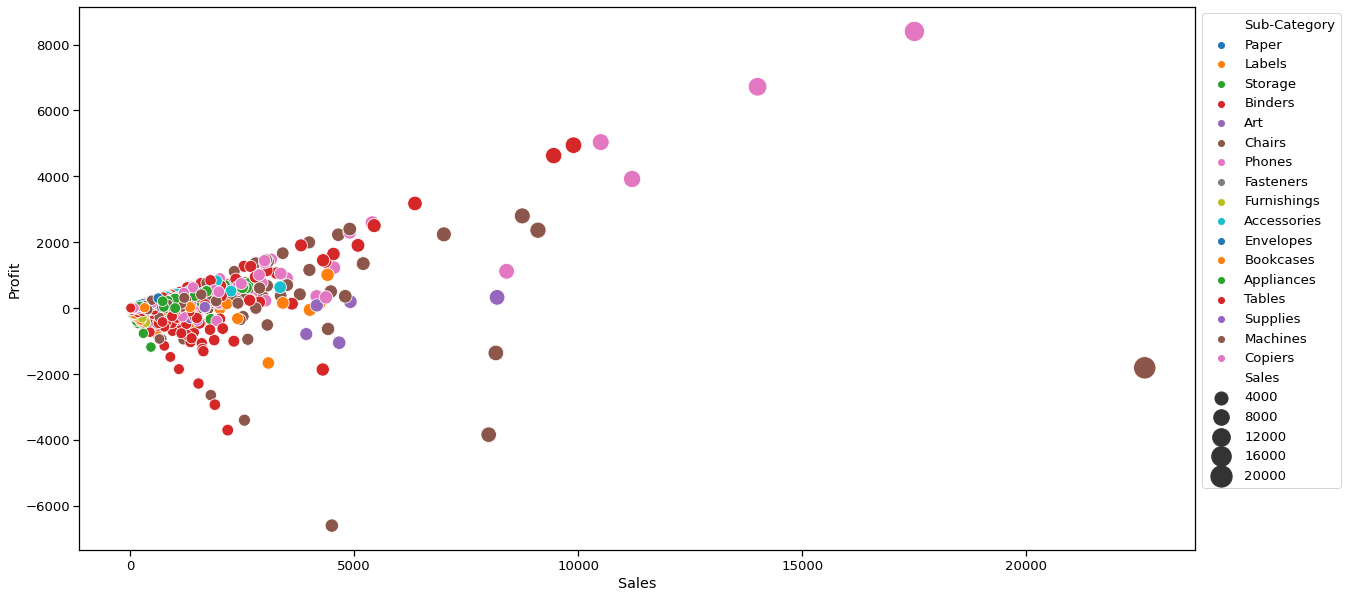

In [24]:
features_to_compare=['Ship Mode','Segment','City','State','Region','Category','Sub-Category']
for col in features_to_compare:
    plt.figure(figsize=(20,10))
    temp=df
    if len(df[col].unique()) >20:
        temp=df.groupby(col)[['Sales','Profit']].mean().reset_index()
        temp=temp.sort_values('Sales',ascending=False)[:20]
        cols=temp[col].unique()
        temp=pd.DataFrame()
        for i in cols:
            x=df.loc[df[col]==i]
            temp=pd.concat([temp,x],axis=0)
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Sales </b> <b>vs</b><b style='color:red'> Profit</b> Across <b style='color:red'>{col} (Top 20)"+ "</b></h3><hr></center>"
    else:
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Sales </b> <b>vs</b><b style='color:red'> Profit</b> Across <b style='color:red'>{col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    
    sns.scatterplot(data=temp,x='Sales',y='Profit',size='Sales',hue=col,sizes=(100,500),palette='tab10',color='navy');
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.show()

# <b id='p-vs-s-f' style='color:red'>Sales </b> <b>,</b><b style='color:red'> Profit</b><b> Propertions Across various Features<hr>


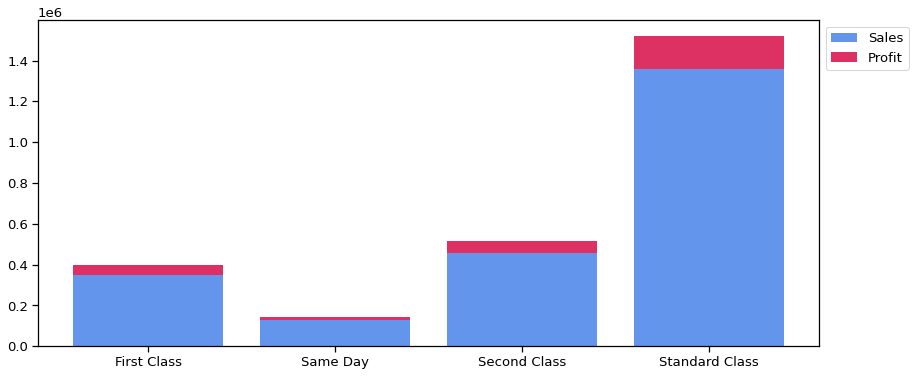

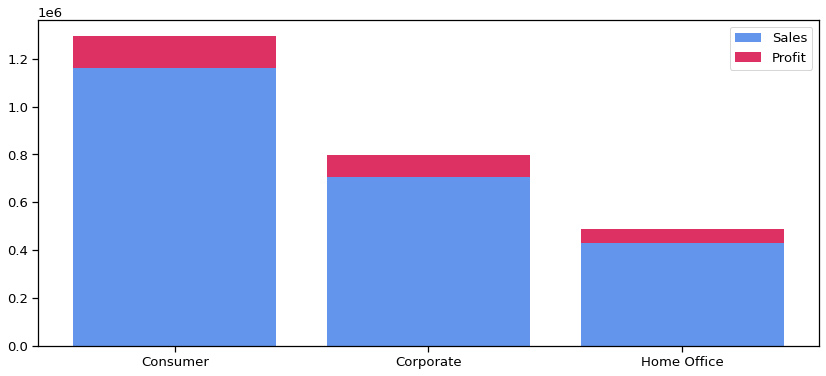

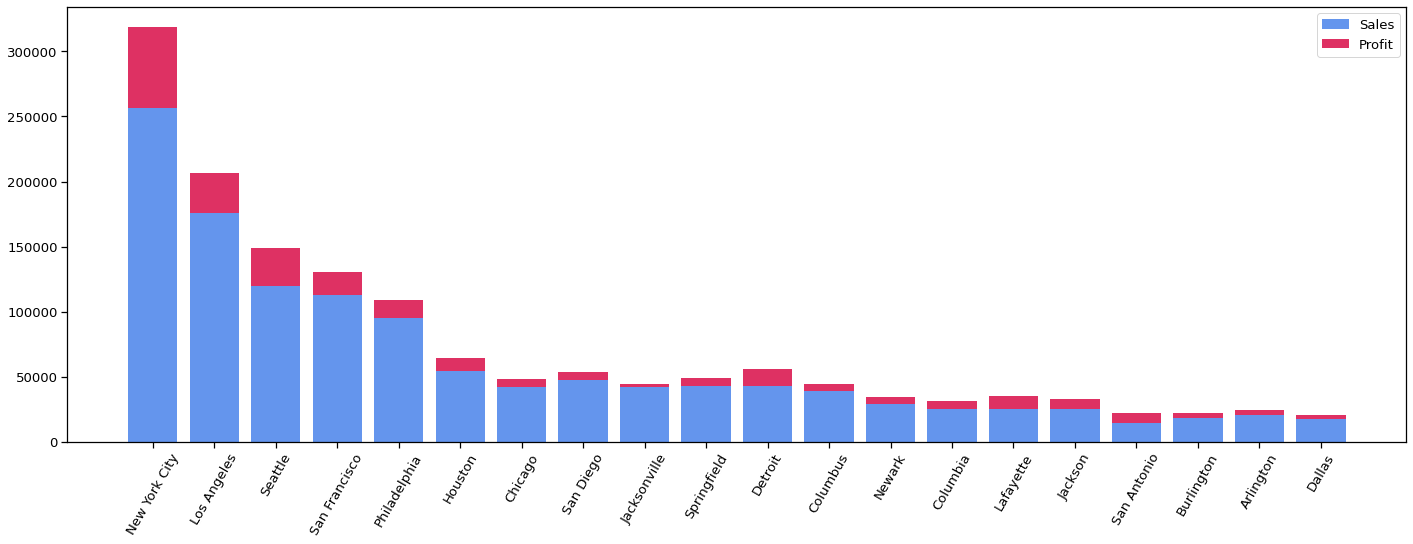

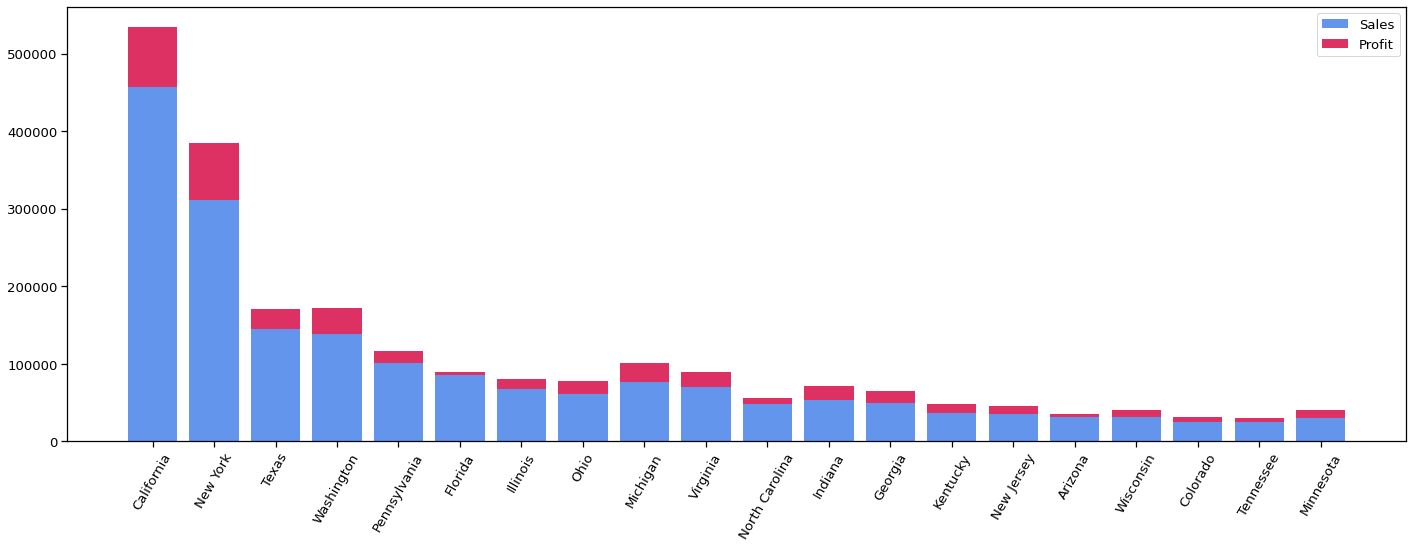

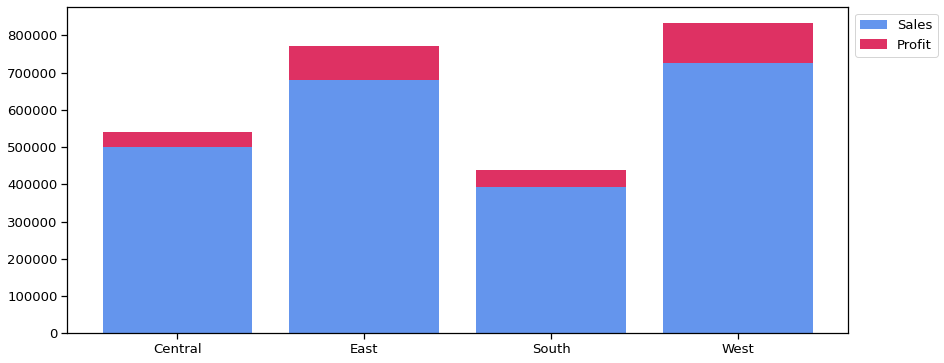

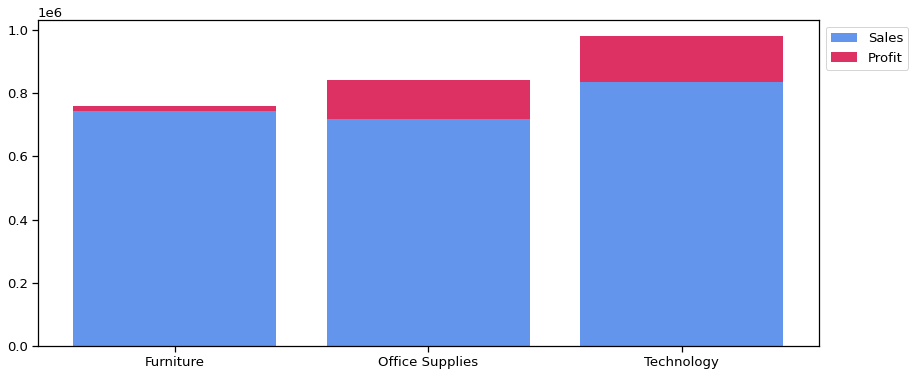

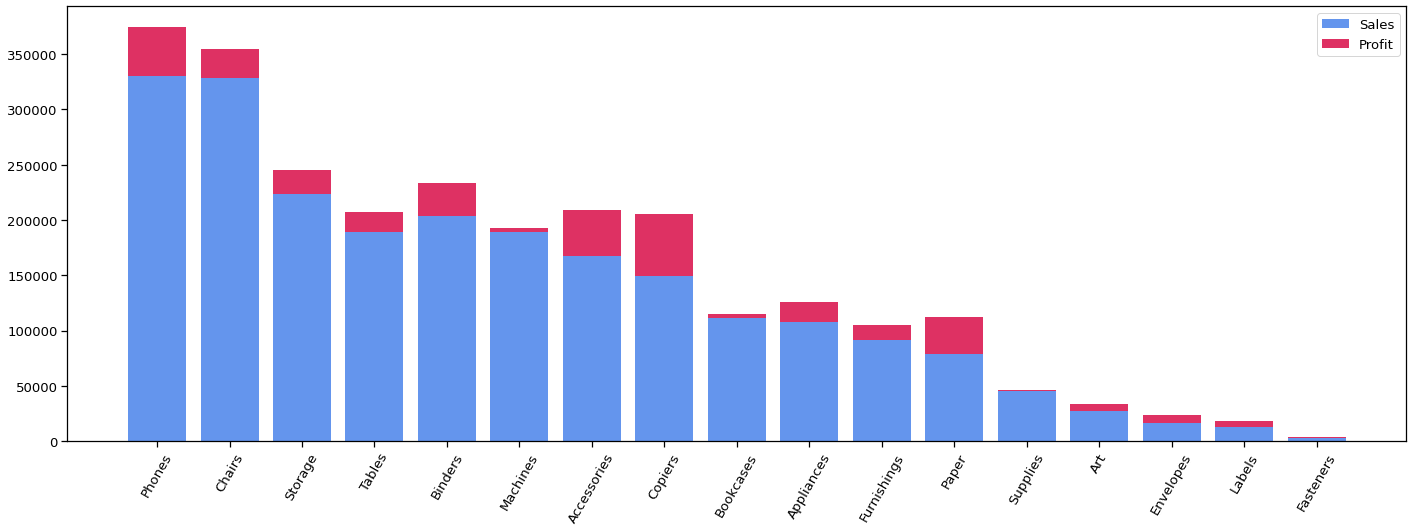

In [25]:
features_to_compare=['Ship Mode','Segment','City','State','Region','Category','Sub-Category']
for col in features_to_compare:
    temp=df.groupby(col)[['Sales','Profit']].sum().reset_index()
    if len(df[col].unique()) >15:
        temp=temp.sort_values('Sales',ascending=False)[:20]
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Sales </b> <b>,</b><b style='color:red'> Profit</b> across </b> <b style='color:red'>{col} (Top 20)"+ "</b></h3><hr></center>"
        plt.figure(figsize=(24,8))
        plt.xticks(rotation=60)
    else:
        text="<h3><b style='color:black'>" + f"<b style='color:red'>Sales </b> <b>,</b><b style='color:red'> Profit</b> across </b> <b style='color:red'>{col}"+ "</b></h3><hr>"
        plt.figure(figsize=(14,6))
    display(HTML(text))
    plt.bar(data=temp,x=col,height='Sales',color='#6495ED')
    plt.bar(data=temp,x=col,height='Profit',bottom='Sales',color='#DE3163');
    plt.legend(['Sales','Profit'],bbox_to_anchor=(1.0,1.0))

    plt.show()

# <b id='sales-d' style='color:red'>Sales </b> <b> Distribution Across various Features<hr>



<h2 style='color:red'><b> violin plot:<b></h2>
<h2>A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.
 </h2>


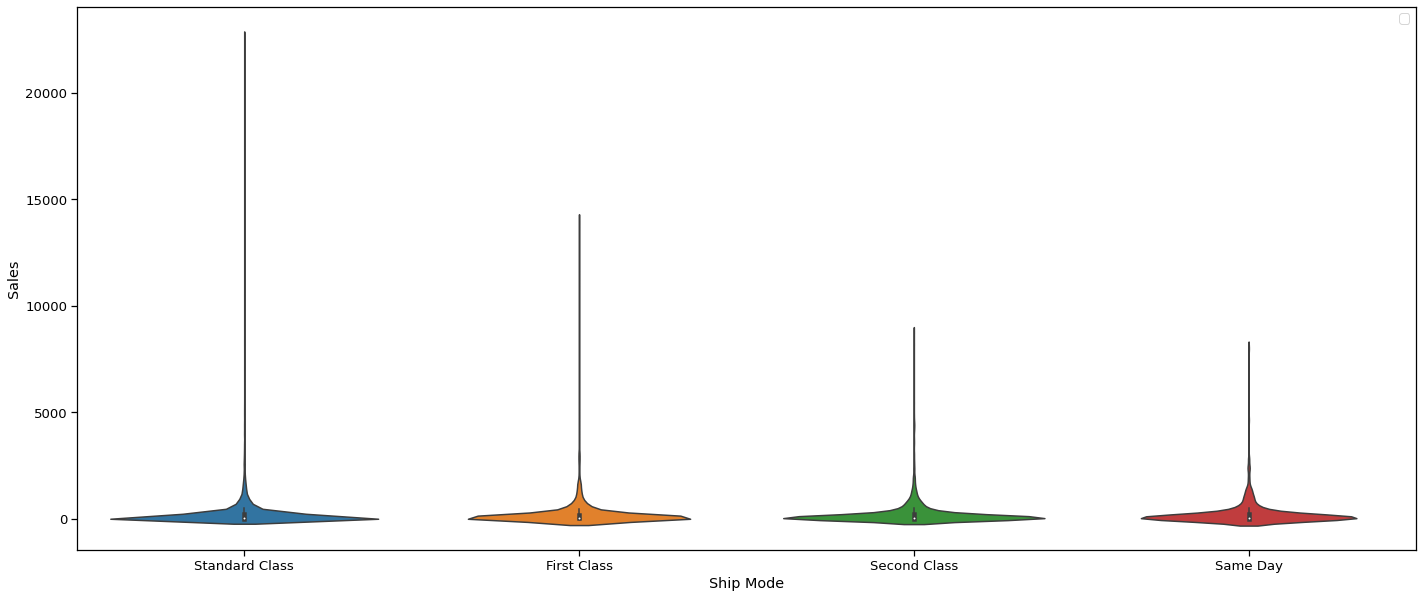

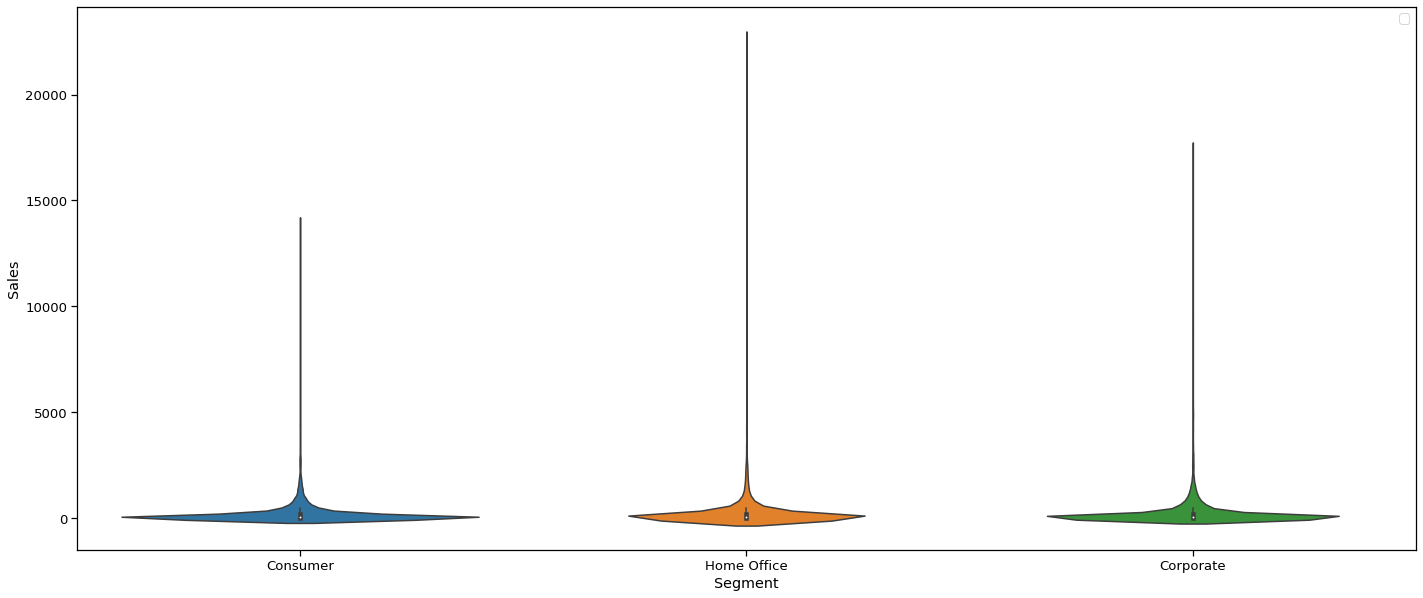

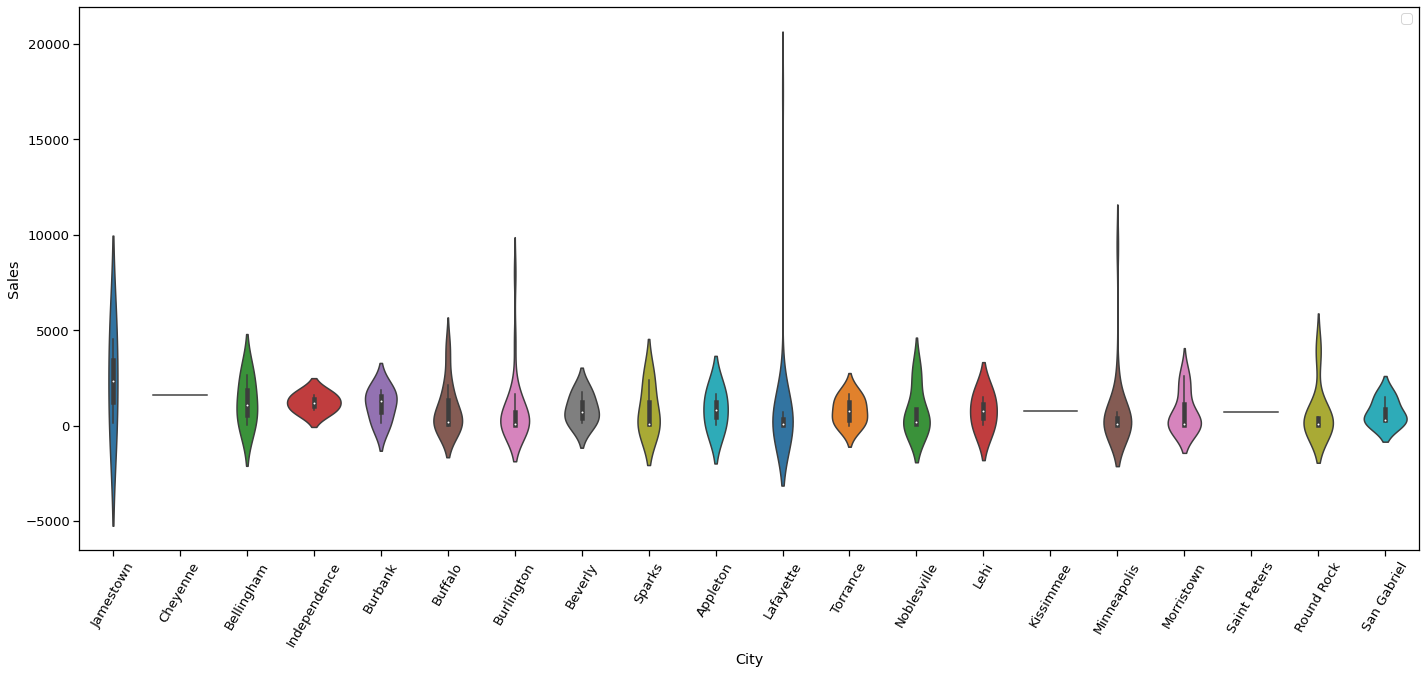

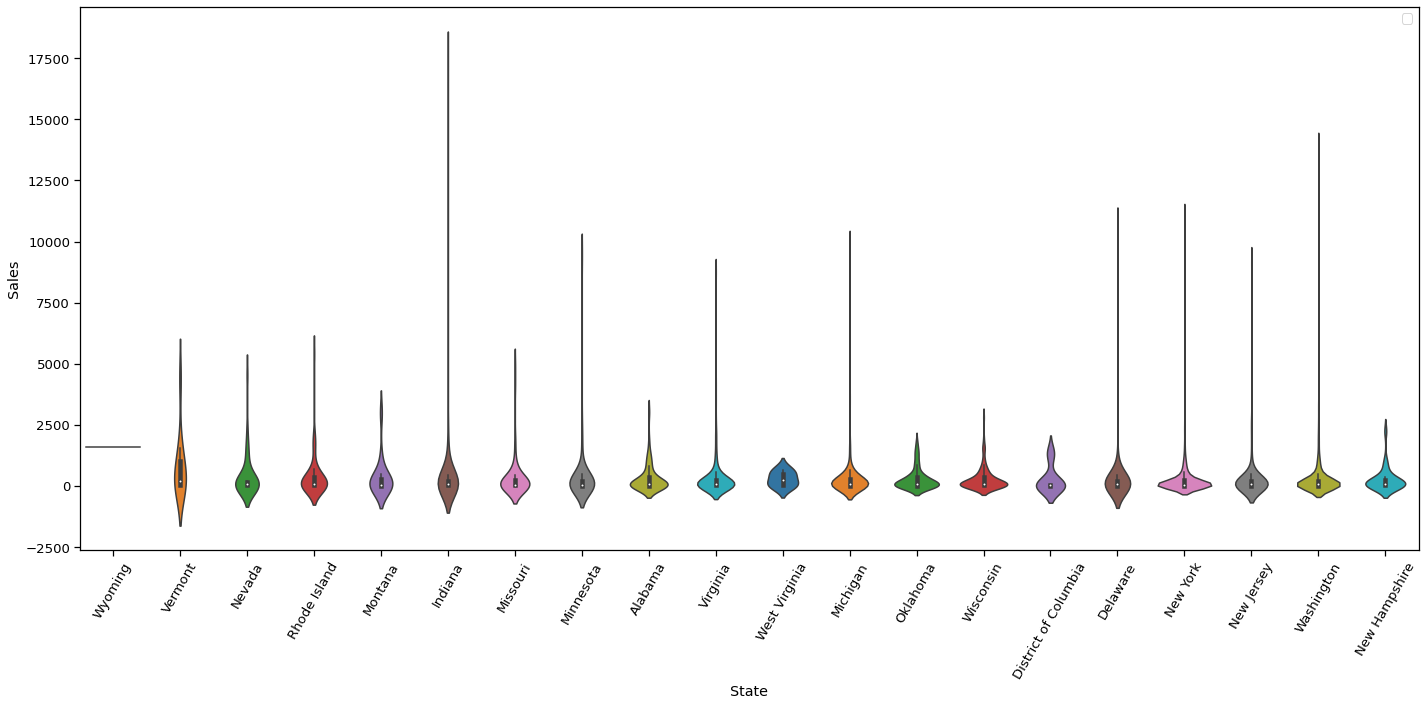

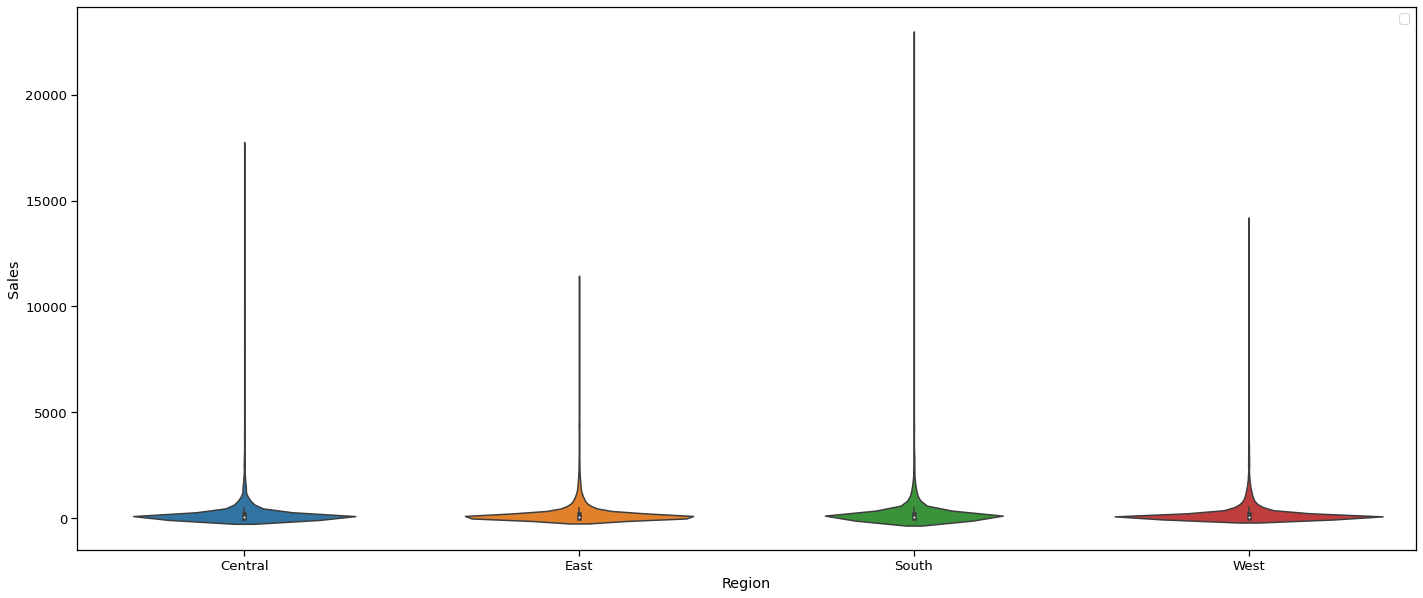

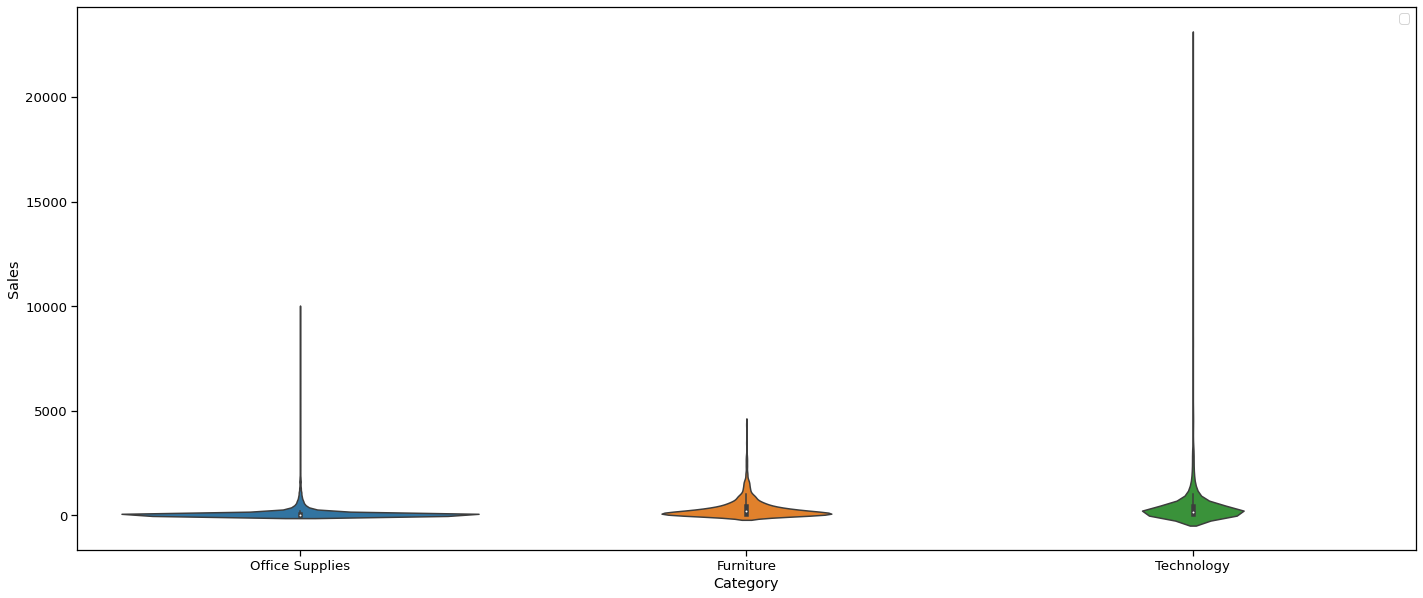

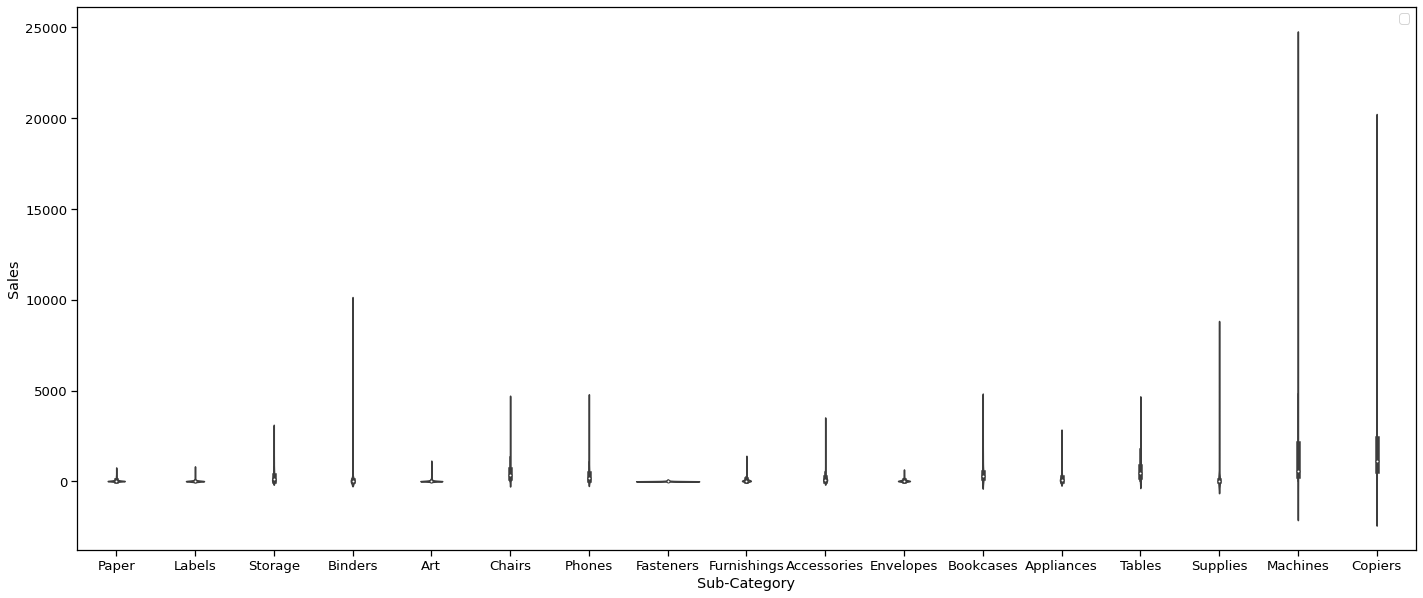

In [26]:
features_to_compare=['Ship Mode','Segment','City','State','Region','Category','Sub-Category']
for col in features_to_compare:
    plt.figure(figsize=(24,10))
    temp=df
    if len(df[col].unique()) >20:
        temp=df.groupby(col)[['Sales','Profit']].mean().reset_index()
        temp=temp.sort_values('Sales',ascending=False)[:20]
        cols=temp[col].unique()
        temp=pd.DataFrame()
        for i in cols:
            x=df.loc[df[col]==i]
            temp=pd.concat([temp,x],axis=0)
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Sales </b> <b>Distribution</b> Across <b style='color:red'>{col} (Top 20)"+ "</b></h3><hr></center>"
        plt.xticks(rotation=60)
    else:
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Sales </b> <b>Distribution</b> Across <b style='color:red'>{col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    
    sns.violinplot(data=temp,x=col,y='Sales',palette='tab10');
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.show()

# <b id='profit-d' style='color:red'>Profit </b> <b> Distribution Across various Features<hr>


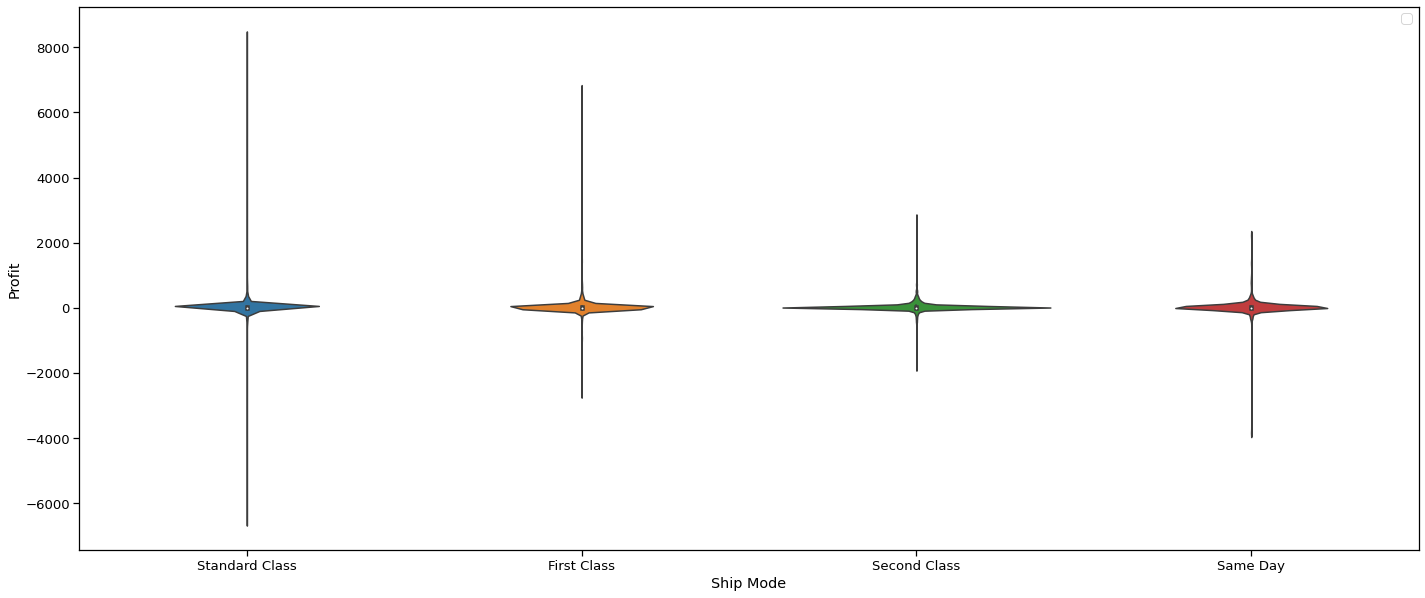

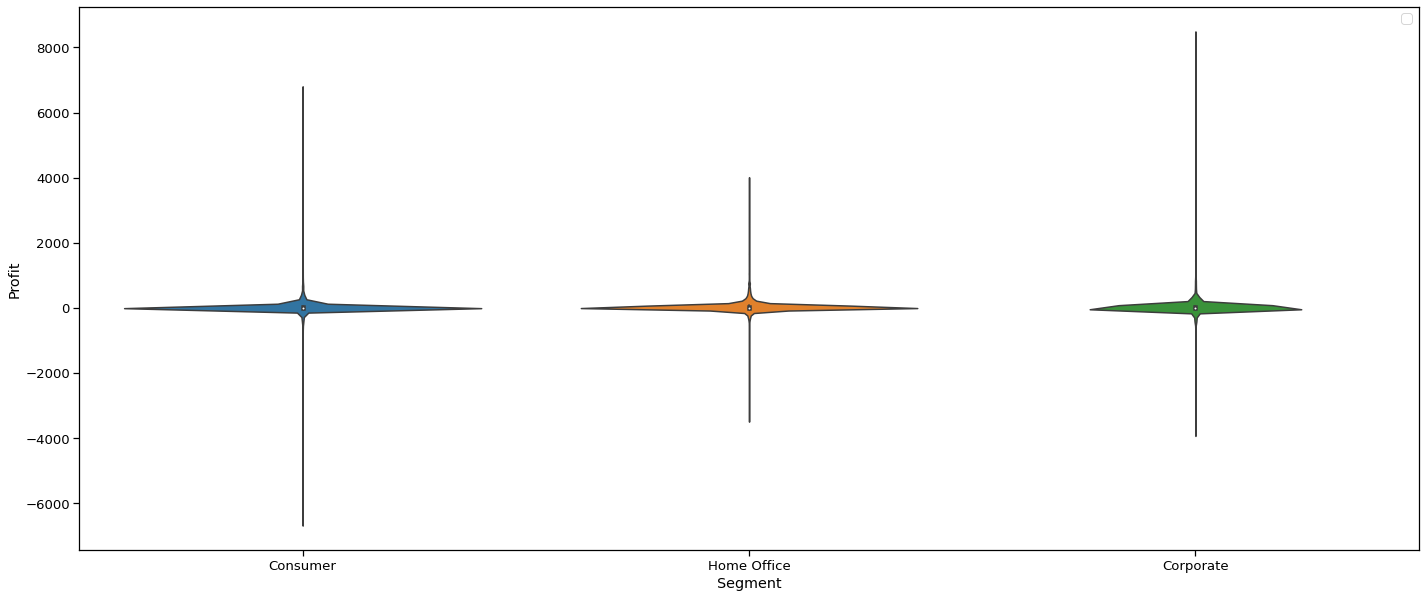

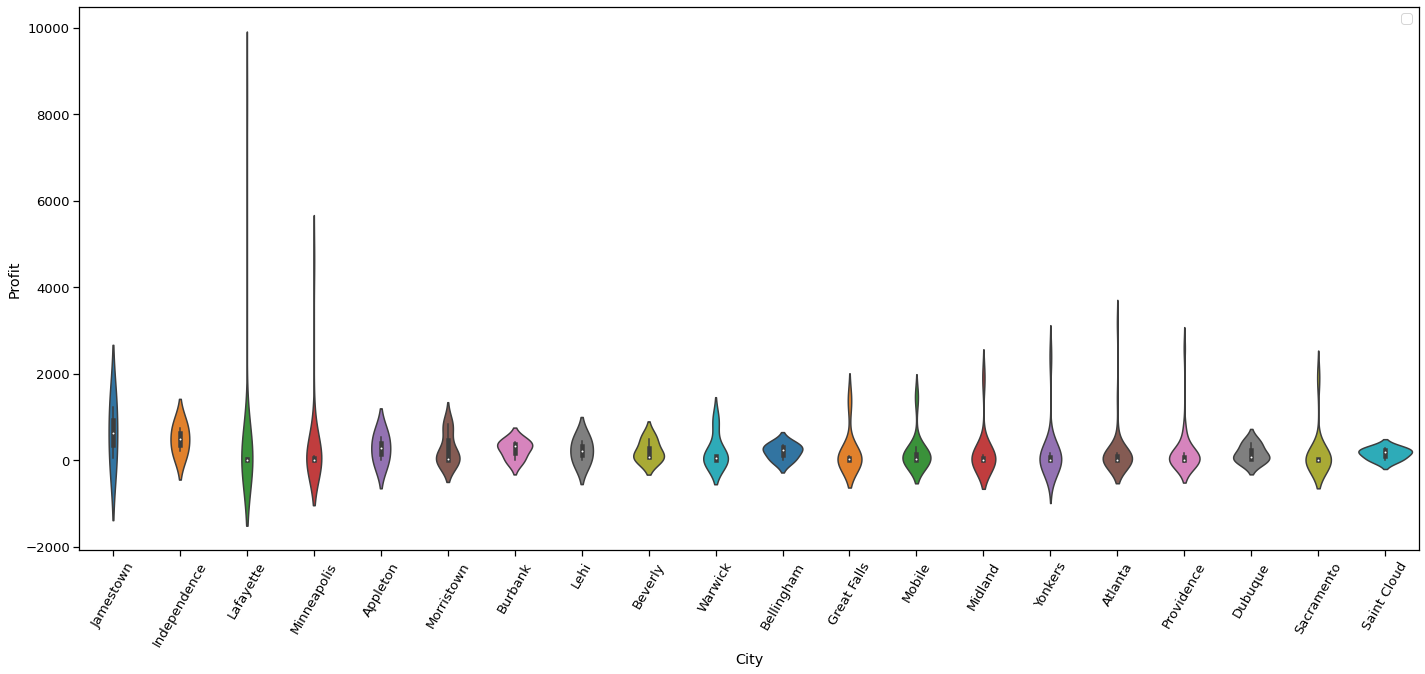

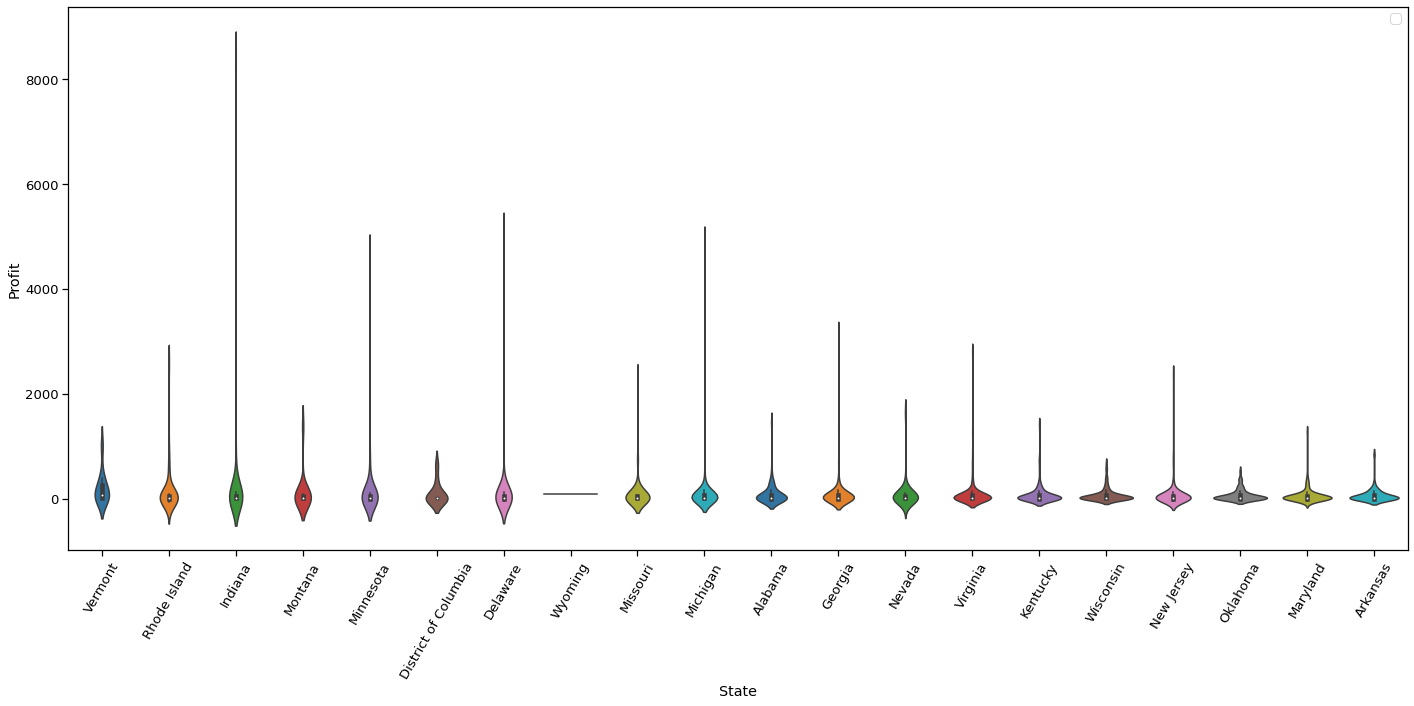

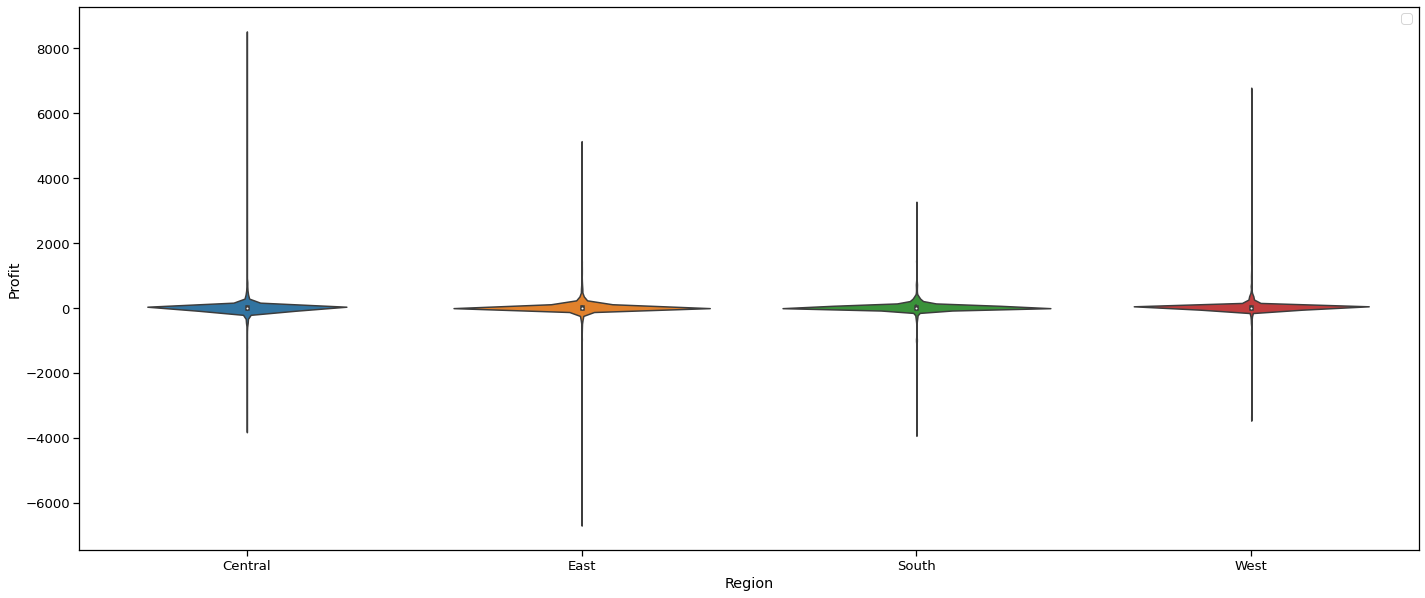

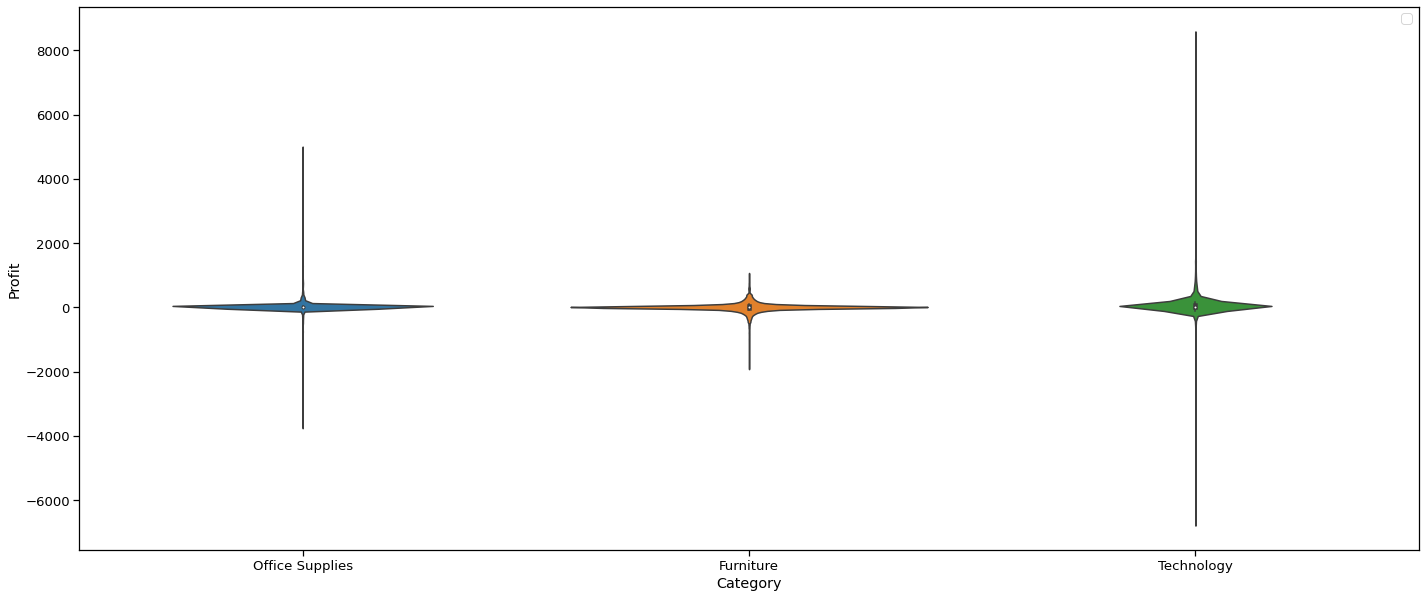

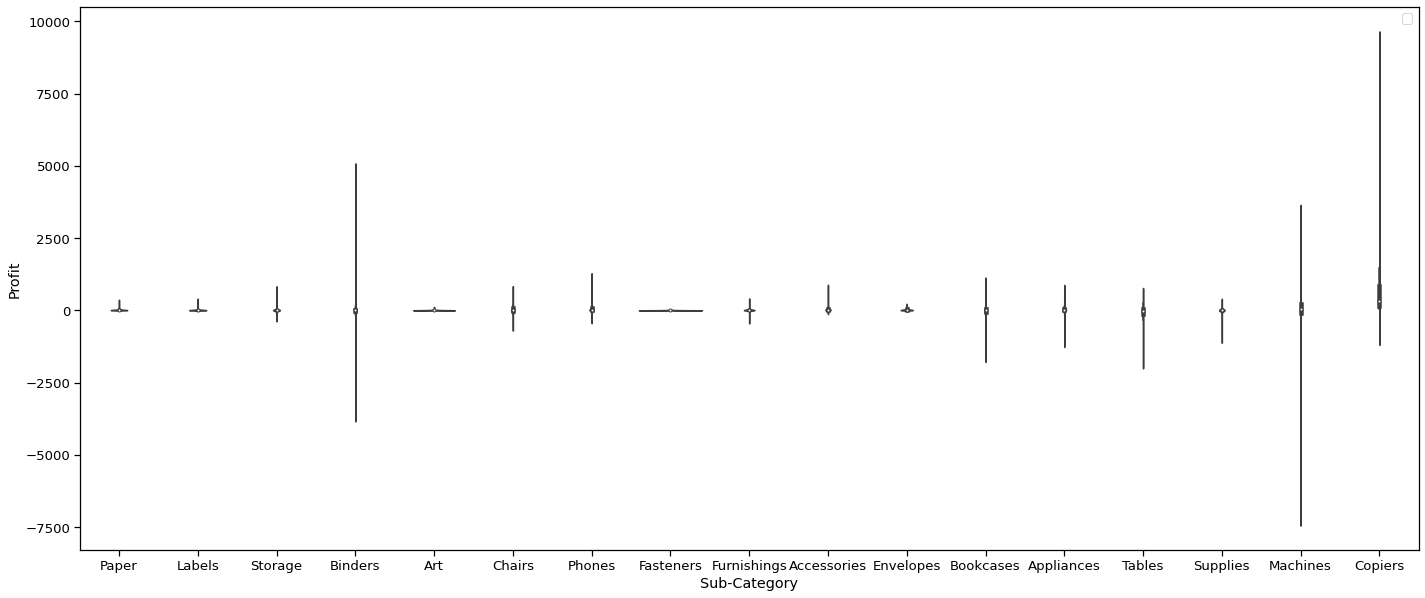

In [27]:
features_to_compare=['Ship Mode','Segment','City','State','Region','Category','Sub-Category']
for col in features_to_compare:
    plt.figure(figsize=(24,10))
    temp=df
    if len(df[col].unique()) >20:
        temp=df.groupby(col)[['Sales','Profit']].mean().reset_index()
        temp=temp.sort_values('Profit',ascending=False)[:20]
        cols=temp[col].unique()
        temp=pd.DataFrame()
        for i in cols:
            x=df.loc[df[col]==i]
            temp=pd.concat([temp,x],axis=0)
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Profit </b> <b>Distribution</b> Across <b style='color:red'>{col} (Top 20)"+ "</b></h3><hr></center>"
        plt.xticks(rotation=60)
    else:
        text="<center><h3><b style='color:black'>" + f"<b style='color:red'>Profit </b> <b>Distribution</b> Across <b style='color:red'>{col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    
    sns.violinplot(data=temp,x=col,y='Profit',palette='tab10');
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.show()

<!-- <h2 style='color:red'><b> Kdeplot:<b></h2> -->
<h2 style='text-align:center;color:#FF3355;font-weight:bold'> Do share your feedback in the comments section,I hope you found it to be helpful.🙌</h2>

<p style="background-color:#FF3355;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid red;">Thank You !!!😄<hr></p>